# load libraries

In [2]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          3.2                         
year           2016                        
month          10                          
day            31                          
svn rev        71607                       
language       R                           
version.string R version 3.3.2 (2016-10-31)
nickname       Sincere Pumpkin Patch       

In [3]:
library(iPredictRE)

Loading required package: ggplot2
Loading required package: reshape2
Loading required package: pls

Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings

Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:reshape2’:

    dcast, melt



In [4]:
options(java.mem = 64*1024)
library(REFSfs)

Loading required package: foreach
Loading required package: iterators
Loading required package: codetools
Warning message:
“replacing previous import ‘reshape2::melt’ by ‘data.table::melt’ when loading ‘REFSfs’”Warning message:
“replacing previous import ‘reshape2::dcast’ by ‘data.table::dcast’ when loading ‘REFSfs’”

In [5]:
library(GNSRE)

Loading required package: tools
Loading required package: TunePareto


In [6]:
setwd("/gnshealthcare/shared/nli/models/M4/")

In [7]:
library(repr)#, lib.loc='/gnshealthcare/software/R/3.1.1/lib/R/library')
library(IRdisplay)
options(repr.plot.width=5, repr.plot.height=5)
library(xtable)
options(xtable.floating = FALSE)
options(xtable.timestamp = "")


Attaching package: ‘xtable’

The following object is masked from ‘package:IRdisplay’:

    display



In [8]:
library(data.table)
library(bit64)
options(datatable.integer64="character")

Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: ‘bit’

The following object is masked from ‘package:data.table’:

    setattr

The following object is masked from ‘package:base’:

    xor

Attaching package bit64
package:bit64 (c) 2011-2012 Jens Oehlschlaegel
creators: integer64 seq :
coercion: as.integer64 as.vector as.logical as.integer as.double as.character as.bin
logical operator: ! & | xor != == < <= >= >
arithmetic operator: + - * / %/% %% ^
math: sign abs sqrt log log2 log10
math: floor ceiling trunc round
querying: is.integer64 is.vector [is.atomic} [length] format print str
values: is.na is.nan is.finite is.infinite
aggregation: any all min max range sum prod
cumulation: diff cummin

In [40]:
library(ggplot2)
library(scales)
#library(reshape2)
library(plyr)
#library(dplyr)
#library(tidyverse)
#library(caret)
#library(ROCR)
library(psych)

In [10]:
library(caret)

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:pls’:

    R2



In [11]:
library(ROCR)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [12]:
library(precrec)

# Read data

In [13]:
rm(list=ls())

In [14]:
ls()

character(0)

## Rx eligible

In [32]:
dt <- fread('V3_DF2.csv',
            colClasses='character',
            header=T, sep=',',na.strings="",
            #drop=c('personId'),
            #select=c('INDIV_ENTERPRISE_ID')
            )
dim(dt)

[1] 2538857    1171

In [33]:
dim(dt[RxElig2016=='1'])

[1] 814359   1171

In [34]:
dt2 = copy(dt[RxElig2016=='1'])
dim(dt2)

[1] 814359   1171

In [38]:
str(dt2$RxElig2016)

 chr [1:814359] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" ...


In [41]:
fwrite(dt2, file="V3_DF2_RxElig2016.csv", quote = F, na = '')

## high cost 2016

In [76]:
dt <- fread('V3_DF2.csv',
            colClasses='character',
            header=T, sep=',',na.strings="",
            )
dim(dt)

[1] 2538857    1171

In [77]:
dim(dt[high_medcost2016=='1'])

[1] 150103   1171

In [78]:
fwrite(dt[high_medcost2016=='1'], file="V3_DF2_highmedcost2016.csv", quote = F, na = '')

In [ ]:
#no need for sampling. only 150k

## fill NA

dt_old <- fread("../M3/V3_DF2.csv",select=c('INDIV_ENTERPRISE_ID','MEMBR_AGE','GENDER_CD_M','med_cost_2016','rx_cost_2016','med_cost_2017','rx_cost_2017','high_medcost2016','high_medcost2017'))

In [17]:
dt <- fread('gns200496v1_m31pop_m3cols_sample100k.csv',
            #colClasses=c(INDIV_ENTERPRISE_ID="character"),
            header=T, sep=',',na.strings="",
            #drop=c('personId'),
            #select=c('INDIV_ENTERPRISE_ID')
            #data.table=T
            )
dim(dt)

[1] 100000   3076

In [69]:
dt <- fread('V3_DF2.csv',
            #colClasses=c(INDIV_ENTERPRISE_ID="character"),
            header=T, sep=',',na.strings="",
            #drop=c('personId'),
            #select=c('INDIV_ENTERPRISE_ID')
            data.table=T
            )
dim(dt)

[1] 2538857    1171

In [70]:
str(dt)

Classes ‘data.table’ and 'data.frame':	2538857 obs. of  1171 variables:
 $ INDIV_ENTERPRISE_ID: int  32811592 37565124 97536238 49810006 84487065 19883720 3012559 69905691 83953245 24719121 ...
 $ HOME_ADDR_STE_CD   : chr  "MN" "CO" "MN" "MN" ...
 $ MEMBR_AGE          : int  29 29 25 39 33 46 49 38 7 29 ...
 $ GENDER_CD_M        : int  1 0 0 1 1 0 0 0 0 0 ...
 $ x_lob              : chr  "COM" "COM" "COM" "COM" ...
 $ x_product          : chr  "OAP" "OAP" "OAP" "OAP" ...
 $ DIAG_CCS_1         : int  NA NA NA NA NA NA NA NA NA NA ...
 $ DIAG_CCS_10        : int  NA NA NA 1 NA 1 1 1 NA 1 ...
 $ DIAG_CCS_100       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ DIAG_CCS_101       : int  NA NA NA NA NA NA 1 NA NA NA ...
 $ DIAG_CCS_102       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ DIAG_CCS_103       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ DIAG_CCS_104       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ DIAG_CCS_105       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ DIAG_CCS_106       : in

In [220]:
str(dt[,grep("PLACE|high_medcost2017",colnames(dt)),with=F])

Classes ‘data.table’ and 'data.frame':	100000 obs. of  47 variables:
 $ PLACE_OF_SVC_CD_01_R12M     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_03_R12M     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_04_R12M     : logi  NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_05_R12M     : logi  NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_06_R12M     : logi  NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_07_R12M     : logi  NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_08_R12M     : logi  NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_09_R12M     : logi  NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_11_R12M     : int  1 1 1 NA NA 1 NA 1 NA 1 ...
 $ PLACE_OF_SVC_CD_12_R12M     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_13_R12M     : logi  NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_14_R12M     : logi  NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_15_R12M     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_16_R12M     : logi  NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_17_R12M  

In [80]:
#length(intersect(dt1$INDIV_ENTERPRISE_ID,dt$INDIV_ENTERPRISE_ID))

In [260]:
summary(dt_old$MEMBR_AGE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   21.00   39.00   37.63   54.00   86.00 

In [265]:
dt_old[is.na(dt_old)] <- 0

In [57]:
#dtt=dt[, colSums(is.na(dt)) != nrow(dt),with=F]

In [63]:
dim(dt)
#dim(dtt)

[1] 2538857    1171

In [44]:
dt[is.na(dt)] <- 0

Warning message in sum(i, na.rm = TRUE):
“integer overflow - use sum(as.numeric(.))”

ERROR: Error in if (!nreplace) return(x): missing value where TRUE/FALSE needed


In [65]:
na2zero = function(DT) {
  # either of the following for loops

  # by name :
  #for (j in names(DT))
  #  set(DT,which(is.na(DT[[j]])),j,0)

  # or by number (slightly faster than by name) :
  for (j in seq_len(ncol(DT)))
    set(DT,which(is.na(DT[[j]])),j,0)
}

In [71]:
system.time(na2zero(dt))

Warning message in set(DT, which(is.na(DT[[j]])), j, 0):
“Coerced 'double' RHS to 'character' to match the column's type; may have truncated precision. Either change the target column ['HOME_ADDR_STE_CD'] to 'double' first (by creating a new 'double' vector length 2538857 (nrows of entire table) and assign that; i.e. 'replace' column), or coerce RHS to 'character' (e.g. 1L, NA_[real|integer]_, as.*, etc) to make your intent clear and for speed. Or, set the column type correctly up front when you create the table and stick to it, please.”Warning message in set(DT, which(is.na(DT[[j]])), j, 0):
“Coerced 'double' RHS to 'character' to match the column's type; may have truncated precision. Either change the target column ['x_lob'] to 'double' first (by creating a new 'double' vector length 2538857 (nrows of entire table) and assign that; i.e. 'replace' column), or coerce RHS to 'character' (e.g. 1L, NA_[real|integer]_, as.*, etc) to make your intent clear and for speed. Or, set the column 

   user  system elapsed 
 42.664   2.120  44.726 

In [74]:
dim(dt)

[1] 2538857    1171

In [75]:
dt <- dt[dt$MEMBR_AGE>=0]

In [76]:
dim(dt)

[1] 2538857    1171

In [ ]:
summary(dtt$MEMBR_AGE)

In [21]:
dt[sample(.N,3)]

personId origId   IndexDate  RxElig_R12M MEMBR_AGE GENDER_CD_M
1 3267671   8795998 2016-12-31 0           56        0          
2 7305989  75683035 2016-12-31 0           18        1          
3 6428672   6940547 2016-12-31 1           45        1          
  HOME_ADDR_STE_CD DIAG_Charlson_cerebrovas_R12M DIAG_Charlson_chf_R12M
1 DE               0                             0                     
2 TX               0                             0                     
3 CO               0                             0                     
  DIAG_Charlson_cpd_R12M ⋯ log_medcost_R6M med_cost_R6M log_medcost_F12M
1 0                      ⋯ 6.5552          701.92       10.6380         
2 0                      ⋯ 5.3357          206.61        5.7680         
3 0                      ⋯ 5.6464          282.28        9.1648         
  med_cost_F12M log_rxcost_R12M rx_cost_R12M log_rxcost_R6M rx_cost_R6M
1 41689.38      0.0000           0.00        0.0000          0.00      
2   318.91      3.2798          25.57        3.2798         25.57      
3  9553.60      0.0000           0.00        0.0000          0.00      
  log_rxcost_F12M rx_cost_F12M
1 0.0000           0.00       
2 3.9088          48.84       
3 0.0000           0.00

In [222]:
dt[sample(.N,3)]

personId origId   IndexDate  RxElig_R12M MEMBR_AGE GENDER_CD_M
1  870939  13761665 2016-12-31 0           62        1          
2 7989945  36534936 2016-12-31 0           36        1          
3 4963531   7160735 2016-12-31 0           22        0          
  HOME_ADDR_STE_CD DIAG_Charlson_cerebrovas_R12M DIAG_Charlson_chf_R12M
1 MI               0                             0                     
2 FL               0                             0                     
3 DE               0                             0                     
  DIAG_Charlson_cpd_R12M ⋯ log_medcost_R6M med_cost_R6M log_medcost_F12M
1 0                      ⋯ 0.0000            0.00       0.0000          
2 0                      ⋯ 5.7322          307.66       5.7061          
3 0                      ⋯ 0.0000            0.00       0.0000          
  med_cost_F12M log_rxcost_R12M rx_cost_R12M log_rxcost_R6M rx_cost_R6M
1   0.0         0.0000          0.00         0              0          
2 299.7         1.9685          6.16         0              0          
3   0.0         0.0000          0.00         0              0          
  log_rxcost_F12M rx_cost_F12M
1 0               0           
2 0               0           
3 0               0

In [266]:
dim(dt_old[dt_old$INDIV_ENTERPRISE_ID %in% dt$origId,])

[1] 2538823       9

In [230]:
summary(dt_old[,.(MEMBR_AGE,GENDER_CD_M,med_cost_2016,rx_cost_2016,med_cost_2017,rx_cost_2017,high_medcost2016,high_medcost2017)])

   MEMBR_AGE      GENDER_CD_M     med_cost_2016      rx_cost_2016     
 Min.   : 0.00   Min.   :0.0000   Min.   :      0   Min.   :     0.0  
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:      0   1st Qu.:     0.0  
 Median :39.00   Median :0.0000   Median :    167   Median :     0.0  
 Mean   :37.62   Mean   :0.4921   Mean   :   3165   Mean   :   531.5  
 3rd Qu.:54.00   3rd Qu.:1.0000   3rd Qu.:   1253   3rd Qu.:    21.0  
 Max.   :86.00   Max.   :1.0000   Max.   :2066869   Max.   :320971.0  
 med_cost_2017      rx_cost_2017      high_medcost2016  high_medcost2017
 Min.   :      0   Min.   :     0.0   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:      0   1st Qu.:     0.0   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :    180   Median :     0.0   Median :0.00000   Median :0.0000  
 Mean   :   3258   Mean   :   566.7   Mean   :0.05973   Mean   :0.0619  
 3rd Qu.:   1296   3rd Qu.:    24.0   3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :1685050   Max.   :332483.0   Max.   :1.00000   Max.   :1

In [262]:
summary(dt_old[,.(MEMBR_AGE,GENDER_CD_M,med_cost_2016,rx_cost_2016,med_cost_2017,rx_cost_2017,high_medcost2016,high_medcost2017)])

   MEMBR_AGE      GENDER_CD_M     med_cost_2016       rx_cost_2016     
 Min.   : 0.00   Min.   :0.0000   Min.   :       0   Min.   :     0.0  
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:       0   1st Qu.:     0.0  
 Median :39.00   Median :0.0000   Median :     165   Median :     0.0  
 Mean   :37.63   Mean   :0.4933   Mean   :    3141   Mean   :   535.4  
 3rd Qu.:54.00   3rd Qu.:1.0000   3rd Qu.:    1249   3rd Qu.:    20.0  
 Max.   :86.00   Max.   :1.0000   Max.   :56040182   Max.   :609611.0  
 med_cost_2017      rx_cost_2017      high_medcost2016  high_medcost2017
 Min.   :      0   Min.   :     0.0   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:      0   1st Qu.:     0.0   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :    175   Median :     0.0   Median :0.00000   Median :0.0000  
 Mean   :   3329   Mean   :   571.1   Mean   :0.05912   Mean   :0.0621  
 3rd Qu.:   1292   3rd Qu.:    23.0   3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :7596686   Max.   :705221.0   Max.   :1.00000   Ma

In [77]:
summary(dt[,.(MEMBR_AGE,GENDER_CD_M,med_cost_2016,rx_cost_2016,med_cost_2017,rx_cost_2017,high_medcost2016,high_medcost2017)])

   MEMBR_AGE      GENDER_CD_M     med_cost_2016       rx_cost_2016     
 Min.   : 0.00   Min.   :0.0000   Min.   :       0   Min.   :     0.0  
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:       0   1st Qu.:     0.0  
 Median :39.00   Median :0.0000   Median :     165   Median :     0.0  
 Mean   :37.63   Mean   :0.4933   Mean   :    3141   Mean   :   535.4  
 3rd Qu.:54.00   3rd Qu.:1.0000   3rd Qu.:    1249   3rd Qu.:    20.0  
 Max.   :86.00   Max.   :1.0000   Max.   :56040182   Max.   :609611.0  
 med_cost_2017      rx_cost_2017      high_medcost2016  high_medcost2017
 Min.   :      0   Min.   :     0.0   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:      0   1st Qu.:     0.0   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :    175   Median :     0.0   Median :0.00000   Median :0.0000  
 Mean   :   3329   Mean   :   571.1   Mean   :0.05912   Mean   :0.0621  
 3rd Qu.:   1292   3rd Qu.:    23.0   3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :7596686   Max.   :705221.0   Max.   :1.00000   Ma

In [22]:
summary(dt[,.(MEMBR_AGE,GENDER_CD_M,med_cost_R12M,rx_cost_R12M,med_cost_F12M,rx_cost_F12M,high_medcost_R12M,high_medcost_F12M)])

   MEMBR_AGE      GENDER_CD_M     med_cost_R12M        rx_cost_R12M     
 Min.   : 0.00   Min.   :0.0000   Min.   :      0.0   Min.   :     0.0  
 1st Qu.:18.00   1st Qu.:0.0000   1st Qu.:      0.0   1st Qu.:     0.0  
 Median :37.00   Median :0.0000   Median :    140.5   Median :     0.0  
 Mean   :35.46   Mean   :0.4947   Mean   :   3069.4   Mean   :   523.8  
 3rd Qu.:52.00   3rd Qu.:1.0000   3rd Qu.:   1168.2   3rd Qu.:    17.6  
 Max.   :84.00   Max.   :1.0000   Max.   :2774921.6   Max.   :379560.0  
 med_cost_F12M      rx_cost_F12M      high_medcost_R12M high_medcost_F12M
 Min.   :      0   Min.   :     0.0   Min.   :0.00000   Min.   :0.0000   
 1st Qu.:      0   1st Qu.:     0.0   1st Qu.:0.00000   1st Qu.:0.0000   
 Median :    150   Median :     0.0   Median :0.00000   Median :0.0000   
 Mean   :   3348   Mean   :   553.7   Mean   :0.05673   Mean   :0.0616   
 3rd Qu.:   1223   3rd Qu.:    21.3   3rd Qu.:0.00000   3rd Qu.:0.0000   
 Max.   :2405370   Max.   :635249.1   Max.   

In [267]:
summary(dt_old[dt_old$INDIV_ENTERPRISE_ID %in% dt$origId,.(MEMBR_AGE,GENDER_CD_M,med_cost_2016,rx_cost_2016,med_cost_2017,rx_cost_2017,high_medcost2016,high_medcost2017)])

   MEMBR_AGE      GENDER_CD_M     med_cost_2016       rx_cost_2016     
 Min.   : 2.00   Min.   :0.0000   Min.   :       0   Min.   :     0.0  
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:       0   1st Qu.:     0.0  
 Median :39.00   Median :0.0000   Median :     165   Median :     0.0  
 Mean   :37.63   Mean   :0.4933   Mean   :    3141   Mean   :   535.4  
 3rd Qu.:54.00   3rd Qu.:1.0000   3rd Qu.:    1249   3rd Qu.:    20.0  
 Max.   :86.00   Max.   :1.0000   Max.   :56040182   Max.   :609611.0  
 med_cost_2017      rx_cost_2017      high_medcost2016  high_medcost2017
 Min.   :      0   Min.   :     0.0   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:      0   1st Qu.:     0.0   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :    175   Median :     0.0   Median :0.00000   Median :0.0000  
 Mean   :   3329   Mean   :   571.1   Mean   :0.05912   Mean   :0.0621  
 3rd Qu.:   1292   3rd Qu.:    23.0   3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :7596686   Max.   :705221.0   Max.   :1.00000   Ma

In [268]:
summary(dt[dt$origId %in% dt_old$INDIV_ENTERPRISE_ID,.(MEMBR_AGE,GENDER_CD_M,med_cost_R12M,rx_cost_R12M,med_cost_F12M,rx_cost_F12M,high_medcost_R12M,high_medcost_F12M)])

   MEMBR_AGE      GENDER_CD_M     med_cost_R12M       rx_cost_R12M     
 Min.   : 0.00   Min.   :0.0000   Min.   :       0   Min.   :     0.0  
 1st Qu.:18.00   1st Qu.:0.0000   1st Qu.:       0   1st Qu.:     0.0  
 Median :37.00   Median :0.0000   Median :     139   Median :     0.0  
 Mean   :35.45   Mean   :0.4909   Mean   :    2906   Mean   :   535.4  
 3rd Qu.:52.00   3rd Qu.:1.0000   3rd Qu.:    1150   3rd Qu.:    20.4  
 Max.   :84.00   Max.   :1.0000   Max.   :56040182   Max.   :609611.4  
 med_cost_F12M      rx_cost_F12M      high_medcost_R12M high_medcost_F12M
 Min.   :      0   Min.   :     0.0   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:      0   1st Qu.:     0.0   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :    135   Median :     0.0   Median :0.00000   Median :0.00000  
 Mean   :   3031   Mean   :   571.1   Mean   :0.05583   Mean   :0.05781  
 3rd Qu.:   1161   3rd Qu.:    23.2   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :7595948   Max.   :705221.3   Max.   :1.0000

In [297]:
summary(dt[dt$origId %in% dt_old$INDIV_ENTERPRISE_ID,.(MEMBR_AGE,GENDER_CD_M,med_cost_R12M,rx_cost_R12M,med_cost_F12M,rx_cost_F12M,high_medcost_R12M,high_medcost_F12M)])

   MEMBR_AGE      GENDER_CD_M     med_cost_R12M       rx_cost_R12M     
 Min.   : 0.00   Min.   :0.0000   Min.   :       0   Min.   :     0.0  
 1st Qu.:18.00   1st Qu.:0.0000   1st Qu.:       0   1st Qu.:     0.0  
 Median :37.00   Median :0.0000   Median :     161   Median :     0.0  
 Mean   :35.45   Mean   :0.4909   Mean   :    3100   Mean   :   535.4  
 3rd Qu.:52.00   3rd Qu.:1.0000   3rd Qu.:    1231   3rd Qu.:    20.4  
 Max.   :84.00   Max.   :1.0000   Max.   :56040182   Max.   :609611.4  
 med_cost_F12M      rx_cost_F12M      high_medcost_R12M high_medcost_F12M
 Min.   :      0   Min.   :     0.0   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:      0   1st Qu.:     0.0   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :    172   Median :     0.0   Median :0.00000   Median :0.00000  
 Mean   :   3293   Mean   :   571.1   Mean   :0.05828   Mean   :0.06148  
 3rd Qu.:   1273   3rd Qu.:    23.2   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :7595948   Max.   :705221.3   Max.   :1.0000

In [298]:
dtdtold <- merge(dt_old, dt, by.x = 'INDIV_ENTERPRISE_ID', by.y= 'origId')

In [299]:
head(dtdtold)

INDIV_ENTERPRISE_ID MEMBR_AGE.x GENDER_CD_M.x med_cost_2016 rx_cost_2016
1  0                  44          0                 0           0         
2  8                  27          1                 0           0         
3  9                  69          0             15556           0         
4 12                  41          1             17673         215         
5 16                  61          1              1487          81         
6 18                  36          1               142           0         
  med_cost_2017 rx_cost_2017 high_medcost2016 high_medcost2017 personId ⋯
1     0           0          0                0                2383772  ⋯
2     0           0          0                0                7007741  ⋯
3  1960           0          1                0                1285007  ⋯
4 13249         419          1                1                2357463  ⋯
5  5960         142          0                0                6394184  ⋯
6   944           0          0                0                1980280  ⋯
  log_medcost_R6M med_cost_R6M log_medcost_F12M med_cost_F12M log_rxcost_R12M
1 0.0000              0.00     0.0000               0.00      0.0000         
2 0.0000              0.00     0.0000               0.00      0.0000         
3 8.5987           5423.61     7.5813            1960.24      0.0000         
4 9.3483          11478.35     9.4918           13249.01      5.3732         
5 0.0000              0.00     8.6929            5959.62      4.4024         
6 4.9658            142.42     6.8515             944.27      0.0000         
  rx_cost_R12M log_rxcost_R6M rx_cost_R6M log_rxcost_F12M rx_cost_F12M
1   0.00       0.0000           0.00      0.0000            0.00      
2   0.00       0.0000           0.00      0.0000            0.00      
3   0.00       0.0000           0.00      0.0000            0.00      
4 214.55       5.2256         184.98      6.0404          419.06      
5  80.65       0.0000           0.00      4.9660          142.45      
6   0.00       0.0000           0.00      0.0000            0.00

In [305]:
head(dtdtold[,.(med_cost_F12M,med_cost_2017)],20)

med_cost_F12M med_cost_2017
1       0.00          0       
2       0.00          0       
3    1960.24       1960       
4   13249.01      13249       
5    5959.62       5960       
6     944.27        944       
7      20.00         20       
8    1098.07       1098       
9      85.00         85       
10 117683.84     117434       
11   1718.07       1718       
12    342.39        342       
13  11445.09      11445       
14      0.00          0       
15    112.28        112       
16      0.00          0       
17   1394.02       1394       
18   3526.35       3759       
19   2921.64       2922       
20      0.00          0

In [301]:
head(dtdtold[((dtdtold$high_medcost_F12M==0) & (dtdtold$high_medcost2017==1)),.(med_cost_F12M,med_cost_2017)],10)

med_cost_F12M med_cost_2017
1  4483.13       11610        
2  8239.16       17495        
3  9847.05       10652        
4  3252.68       15254        
5  2434.25       17542        
6  5232.36       15345        
7  2924.17       15159        
8  1547.70       20707        
9  6013.14       10169        
10 8391.08       11714

In [302]:
diff <- head(dtdtold[((dtdtold$high_medcost_F12M==0) & (dtdtold$high_medcost2017==1)),.(INDIV_ENTERPRISE_ID,med_cost_F12M,med_cost_2017)],100)

In [303]:
str(diff)

Classes ‘data.table’ and 'data.frame':	100 obs. of  3 variables:
 $ INDIV_ENTERPRISE_ID: int  8990 28761 35617 39842 51105 82677 123021 151475 180665 219616 ...
 $ med_cost_F12M      : num  4483 8239 9847 3253 2434 ...
 $ med_cost_2017      : num  11610 17495 10652 15254 17542 ...
 - attr(*, "sorted")= chr "INDIV_ENTERPRISE_ID"
 - attr(*, ".internal.selfref")=<externalptr> 


In [304]:
fwrite(diff, file="/gnshealthcare/shared/nli/dataframe/puller/Joel_pullerQC_medcosts_V2.csv", quote = F, na = '')

In [283]:
summary(dtdtold)

 INDIV_ENTERPRISE_ID  MEMBR_AGE.x    GENDER_CD_M.x    med_cost_2016     
 Min.   :        0   Min.   : 2.00   Min.   :0.0000   Min.   :       0  
 1st Qu.: 13882210   1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:       0  
 Median : 40904476   Median :39.00   Median :0.0000   Median :     165  
 Mean   : 45179766   Mean   :37.63   Mean   :0.4933   Mean   :    3141  
 3rd Qu.: 69956340   3rd Qu.:54.00   3rd Qu.:1.0000   3rd Qu.:    1249  
 Max.   :899992936   Max.   :86.00   Max.   :1.0000   Max.   :56040182  
  rx_cost_2016      med_cost_2017      rx_cost_2017      high_medcost2016 
 Min.   :     0.0   Min.   :      0   Min.   :     0.0   Min.   :0.00000  
 1st Qu.:     0.0   1st Qu.:      0   1st Qu.:     0.0   1st Qu.:0.00000  
 Median :     0.0   Median :    175   Median :     0.0   Median :0.00000  
 Mean   :   535.4   Mean   :   3329   Mean   :   571.1   Mean   :0.05912  
 3rd Qu.:    20.0   3rd Qu.:   1292   3rd Qu.:    23.0   3rd Qu.:0.00000  
 Max.   :609611.0   Max.   :7596686   M

In [269]:
dim(dt[dt$origId %in% dt_old$INDIV_ENTERPRISE_ID,])

[1] 2538823      21

In [234]:
summary(dt_old$RxElig2016)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3218  1.0000  1.0000 

In [225]:
summary(dt$RxElig_R12M)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3195  1.0000  1.0000 

In [234]:
summary(dt[,.(MEMBR_AGE,GENDER_CD_M,med_cost_2016,rx_cost_2016,med_cost_2017,rx_cost_2017,high_medcost2016,high_medcost2017)])

   MEMBR_AGE      GENDER_CD_M     med_cost_2016      rx_cost_2016   
 Min.   : 0.00   Min.   :0.0000   Min.   :      0   Min.   :     0  
 1st Qu.:20.00   1st Qu.:0.0000   1st Qu.:    187   1st Qu.:     0  
 Median :39.00   Median :1.0000   Median :    699   Median :    29  
 Mean   :36.93   Mean   :0.5034   Mean   :   4333   Mean   :  1109  
 3rd Qu.:53.00   3rd Qu.:1.0000   3rd Qu.:   2450   3rd Qu.:   372  
 Max.   :86.00   Max.   :1.0000   Max.   :1836412   Max.   :581387  
 med_cost_2017      rx_cost_2017    high_medcost2016  high_medcost2017 
 Min.   :      0   Min.   :     0   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:    195   1st Qu.:     0   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :    719   Median :    28   Median :0.00000   Median :0.00000  
 Mean   :   4725   Mean   :  1172   Mean   :0.08469   Mean   :0.09047  
 3rd Qu.:   2529   3rd Qu.:   375   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :2970408   Max.   :705221   Max.   :1.00000   Max.   :1.00000  

In [23]:
str(dt)

Classes ‘data.table’ and 'data.frame':	99997 obs. of  3076 variables:
 $ personId                          : int  2114818 1901925 8091591 6114972 5235192 4552039 7123102 6691578 7548227 5230755 ...
 $ origId                            : int  75210390 96646475 80168649 78552476 40935544 17376370 54772677 64992063 24046198 17532836 ...
 $ IndexDate                         : chr  "2016-12-31" "2016-12-31" "2016-12-31" "2016-12-31" ...
 $ RxElig_R12M                       : num  0 1 0 0 0 1 0 0 1 1 ...
 $ MEMBR_AGE                         : num  8 56 42 5 16 36 14 40 31 61 ...
 $ GENDER_CD_M                       : int  0 1 1 1 1 1 1 1 1 1 ...
 $ HOME_ADDR_STE_CD                  : chr  "FL" "TX" "MN" "FL" ...
 $ DIAG_Charlson_cerebrovas_R12M     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DIAG_Charlson_chf_R12M            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DIAG_Charlson_cpd_R12M            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DIAG_Charlson_dementia_R12M       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DIAG_Char

In [34]:
names(dt)

[1] "INDIV_ENTERPRISE_ID" "HOME_ADDR_STE_CD"    "MEMBR_AGE"          
   [4] "GENDER_CD_M"         "x_lob"               "x_product"          
   [7] "DIAG_CCS_1"          "DIAG_CCS_10"         "DIAG_CCS_100"       
  [10] "DIAG_CCS_101"        "DIAG_CCS_102"        "DIAG_CCS_103"       
  [13] "DIAG_CCS_104"        "DIAG_CCS_105"        "DIAG_CCS_106"       
  [16] "DIAG_CCS_107"        "DIAG_CCS_108"        "DIAG_CCS_109"       
  [19] "DIAG_CCS_11"         "DIAG_CCS_110"        "DIAG_CCS_111"       
  [22] "DIAG_CCS_112"        "DIAG_CCS_113"        "DIAG_CCS_114"       
  [25] "DIAG_CCS_115"        "DIAG_CCS_116"        "DIAG_CCS_117"       
  [28] "DIAG_CCS_118"        "DIAG_CCS_119"        "DIAG_CCS_12"        
  [31] "DIAG_CCS_120"        "DIAG_CCS_121"        "DIAG_CCS_122"       
  [34] "DIAG_CCS_123"        "DIAG_CCS_124"        "DIAG_CCS_125"       
  [37] "DIAG_CCS_126"        "DIAG_CCS_127"        "DIAG_CCS_128"       
  [40] "DIAG_CCS_129"        "DIAG_CCS_13"         "DIAG_CCS_130"       
  [43] "DIAG_CCS_131"        "DIAG_CCS_132"        "DIAG_CCS_133"       
  [46] "DIAG_CCS_134"        "DIAG_CCS_135"        "DIAG_CCS_136"       
  [49] "DIAG_CCS_137"        "DIAG_CCS_138"        "DIAG_CCS_139"       
  [52] "DIAG_CCS_14"         "DIAG_CCS_140"        "DIAG_CCS_141"       
  [55] "DIAG_CCS_142"        "DIAG_CCS_143"        "DIAG_CCS_144"       
  [58] "DIAG_CCS_145"        "DIAG_CCS_146"        "DIAG_CCS_147"       
  [61] "DIAG_CCS_148"        "DIAG_CCS_149"        "DIAG_CCS_15"        
  [64] "DIAG_CCS_151"        "DIAG_CCS_152"        "DIAG_CCS_153"       
  [67] "DIAG_CCS_154"        "DIAG_CCS_155"        "DIAG_CCS_156"       
  [70] "DIAG_CCS_157"        "DIAG_CCS_158"        "DIAG_CCS_159"       
  [73] "DIAG_CCS_16"         "DIAG_CCS_160"        "DIAG_CCS_161"       
  [76] "DIAG_CCS_162"        "DIAG_CCS_163"        "DIAG_CCS_164"       
  [79] "DIAG_CCS_165"        "DIAG_CCS_166"        "DIAG_CCS_167"       
  [82] "DIAG_CCS_168"        "DIAG_CCS_169"        "DIAG_CCS_17"        
  [85] "DIAG_CCS_170"        "DIAG_CCS_171"        "DIAG_CCS_172"       
  [88] "DIAG_CCS_173"        "DIAG_CCS_174"        "DIAG_CCS_175"       
  [91] "DIAG_CCS_176"        "DIAG_CCS_177"        "DIAG_CCS_178"       
  [94] "DIAG_CCS_179"        "DIAG_CCS_18"         "DIAG_CCS_180"       
  [97] "DIAG_CCS_181"        "DIAG_CCS_182"        "DIAG_CCS_183"       
 [100] "DIAG_CCS_184"        "DIAG_CCS_185"        "DIAG_CCS_186"       
 [103] "DIAG_CCS_187"        "DIAG_CCS_188"        "DIAG_CCS_189"       
 [106] "DIAG_CCS_19"         "DIAG_CCS_190"        "DIAG_CCS_191"       
 [109] "DIAG_CCS_192"        "DIAG_CCS_193"        "DIAG_CCS_194"       
 [112] "DIAG_CCS_195"        "DIAG_CCS_196"        "DIAG_CCS_197"       
 [115] "DIAG_CCS_198"        "DIAG_CCS_199"        "DIAG_CCS_2"         
 [118] "DIAG_CCS_20"         "DIAG_CCS_200"        "DIAG_CCS_201"       
 [121] "DIAG_CCS_202"        "DIAG_CCS_203"        "DIAG_CCS_204"       
 [124] "DIAG_CCS_205"        "DIAG_CCS_206"        "DIAG_CCS_207"       
 [127] "DIAG_CCS_208"        "DIAG_CCS_209"        "DIAG_CCS_21"        
 [130] "DIAG_CCS_210"        "DIAG_CCS_211"        "DIAG_CCS_212"       
 [133] "DIAG_CCS_213"        "DIAG_CCS_214"        "DIAG_CCS_215"       
 [136] "DIAG_CCS_216"        "DIAG_CCS_217"        "DIAG_CCS_218"       
 [139] "DIAG_CCS_219"        "DIAG_CCS_22"         "DIAG_CCS_220"       
 [142] "DIAG_CCS_221"        "DIAG_CCS_222"        "DIAG_CCS_223"       
 [145] "DIAG_CCS_224"        "DIAG_CCS_225"        "DIAG_CCS_226"       
 [148] "DIAG_CCS_227"        "DIAG_CCS_228"        "DIAG_CCS_229"       
 [151] "DIAG_CCS_23"         "DIAG_CCS_230"        "DIAG_CCS_231"       
 [154] "DIAG_CCS_232"        "DIAG_CCS_233"        "DIAG_CCS_234"       
 [157] "DIAG_CCS_235"        "DIAG_CCS_236"        "DIAG_CCS_237"       
 [160] "DIAG_CCS_238"        "DIAG_CCS_239"        "DIAG_CCS_24"        
 [163] "DIAG_CCS_240"        "DIAG_CCS_241"        "DIAG_CCS_

In [78]:
dt$log_medcost_2016 <- round(log(dt$med_cost_2016+1),4)

In [79]:
dt$log_medcost_2017 <- round(log(dt$med_cost_2017+1),4)

In [80]:
dt$log_rxcost_2016 <- round(log(dt$rx_cost_2016+1),4)

In [81]:
dt$log_rxcost_2017 <- round(log(dt$rx_cost_2017+1),4)

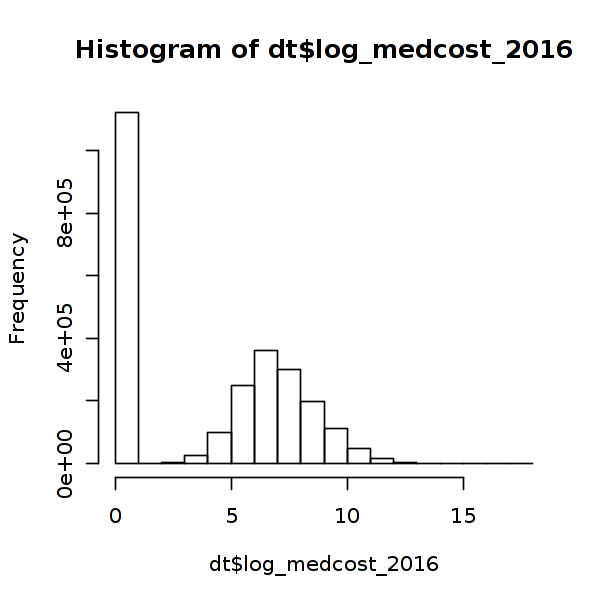

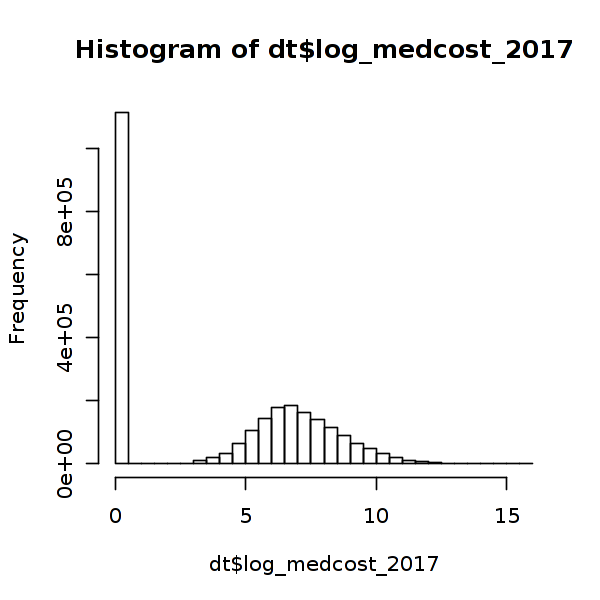

In [82]:
hist(dt$log_medcost_2016)
hist(dt$log_medcost_2017)

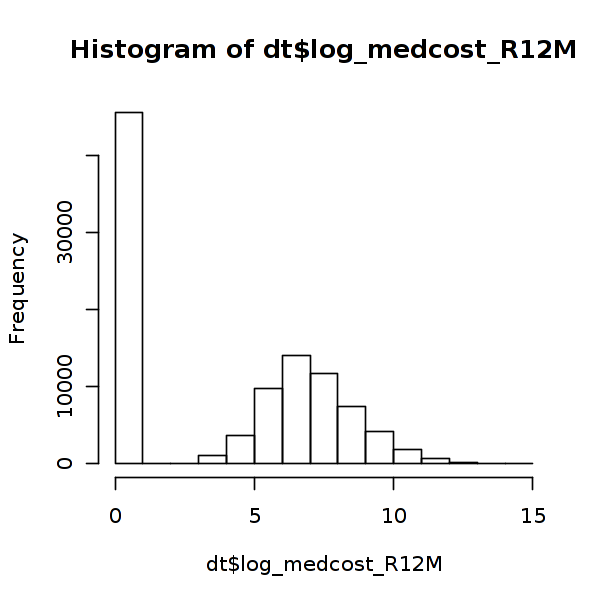

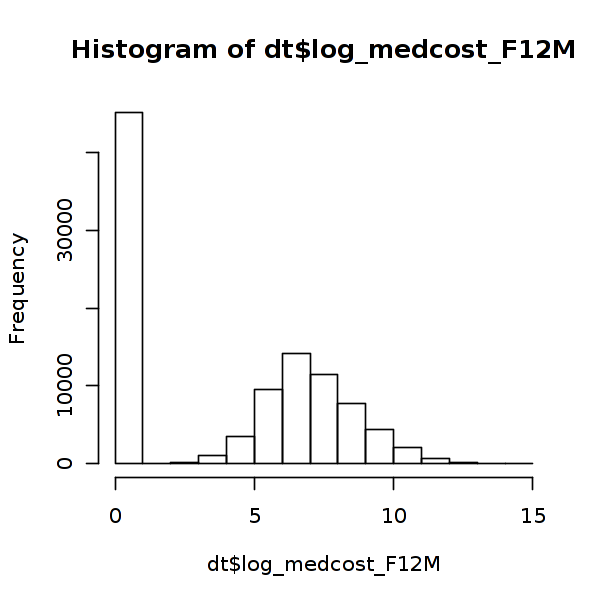

In [25]:
hist(dt$log_medcost_R12M)
hist(dt$log_medcost_F12M)

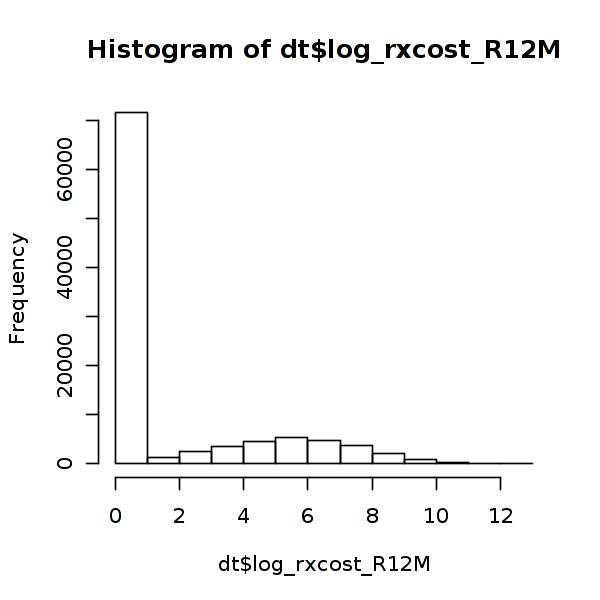

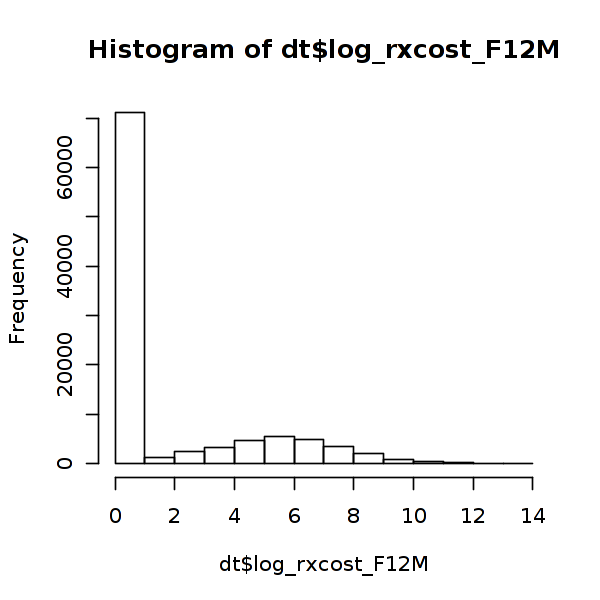

In [26]:
hist(dt$log_rxcost_R12M)
hist(dt$log_rxcost_F12M)

In [98]:
head(dt$log_medcost_2016)

[1]  9.9323  9.2498 11.7282  9.2154  9.4234  9.5857

In [97]:
head(dt$log_medcost_2017)

[1]  6.0331  7.8022 10.1095  6.3682 11.3252  0.0000

In [27]:
names(dt)

[1] "personId"                           "origId"                            
   [3] "IndexDate"                          "RxElig_R12M"                       
   [5] "MEMBR_AGE"                          "GENDER_CD_M"                       
   [7] "HOME_ADDR_STE_CD"                   "DIAG_Charlson_cerebrovas_R12M"     
   [9] "DIAG_Charlson_chf_R12M"             "DIAG_Charlson_cpd_R12M"            
  [11] "DIAG_Charlson_dementia_R12M"        "DIAG_Charlson_diabetes_R12M"       
  [13] "DIAG_Charlson_diabeteschronic_R12M" "DIAG_Charlson_hiv_R12M"            
  [15] "DIAG_Charlson_liver_R12M"           "DIAG_Charlson_malignancy_R12M"     
  [17] "DIAG_Charlson_metastatictumor_R12M" "DIAG_Charlson_mi_R12M"             
  [19] "DIAG_Charlson_mildliver_R12M"       "DIAG_Charlson_plegia_R12M"         
  [21] "DIAG_Charlson_pud_R12M"             "DIAG_Charlson_pvd_R12M"            
  [23] "DIAG_Charlson_renal_R12M"           "DIAG_Charlson_rheumatic_R12M"      
  [25] "DIAG_CCS_1_R12M"                    "DIAG_CCS_10_R12M"                  
  [27] "DIAG_CCS_100_R12M"                  "DIAG_CCS_101_R12M"                 
  [29] "DIAG_CCS_102_R12M"                  "DIAG_CCS_103_R12M"                 
  [31] "DIAG_CCS_104_R12M"                  "DIAG_CCS_105_R12M"                 
  [33] "DIAG_CCS_106_R12M"                  "DIAG_CCS_107_R12M"                 
  [35] "DIAG_CCS_108_R12M"                  "DIAG_CCS_109_R12M"                 
  [37] "DIAG_CCS_11_R12M"                   "DIAG_CCS_110_R12M"                 
  [39] "DIAG_CCS_111_R12M"                  "DIAG_CCS_112_R12M"                 
  [41] "DIAG_CCS_113_R12M"                  "DIAG_CCS_114_R12M"                 
  [43] "DIAG_CCS_115_R12M"                  "DIAG_CCS_116_R12M"                 
  [45] "DIAG_CCS_117_R12M"                  "DIAG_CCS_118_R12M"                 
  [47] "DIAG_CCS_119_R12M"                  "DIAG_CCS_12_R12M"                  
  [49] "DIAG_CCS_120_R12M"                  "DIAG_CCS_121_R12M"                 
  [51] "DIAG_CCS_122_R12M"                  "DIAG_CCS_123_R12M"                 
  [53] "DIAG_CCS_124_R12M"                  "DIAG_CCS_125_R12M"                 
  [55] "DIAG_CCS_126_R12M"                  "DIAG_CCS_127_R12M"                 
  [57] "DIAG_CCS_128_R12M"                  "DIAG_CCS_129_R12M"                 
  [59] "DIAG_CCS_13_R12M"                   "DIAG_CCS_130_R12M"                 
  [61] "DIAG_CCS_131_R12M"                  "DIAG_CCS_132_R12M"                 
  [63] "DIAG_CCS_133_R12M"                  "DIAG_CCS_134_R12M"                 
  [65] "DIAG_CCS_135_R12M"                  "DIAG_CCS_136_R12M"                 
  [67] "DIAG_CCS_137_R12M"                  "DIAG_CCS_138_R12M"                 
  [69] "DIAG_CCS_139_R12M"                  "DIAG_CCS_14_R12M"                  
  [71] "DIAG_CCS_140_R12M"                  "DIAG_CCS_141_R12M"                 
  [73] "DIAG_CCS_142_R12M"                  "DIAG_CCS_143_R12M"                 
  [75] "DIAG_CCS_144_R12M"                  "DIAG_CCS_145_R12M"                 
  [77] "DIAG_CCS_146_R12M"                  "DIAG_CCS_147_R12M"                 
  [79] "DIAG_CCS_148_R12M"                  "DIAG_CCS_149_R12M"                 
  [81] "DIAG_CCS_15_R12M"                   "DIAG_CCS_151_R12M"                 
  [83] "DIAG_CCS_152_R12M"                  "DIAG_CCS_153_R12M"                 
  [85] "DIAG_CCS_154_R12M"                  "DIAG_CCS_155_R12M"                 
  [87] "DIAG_CCS_156_R12M"                  "DIAG_CCS_157_R12M"                 
  [89] "DIAG_CCS_158_R12M"                  "DIAG_CCS_159_R12M"                 
  [91] "DIAG_CCS_16_R12M"                   "DIAG_CCS_160_R12M"                 
  [93] "DIAG_CCS_161_R12M"                  "DIAG_CCS_162_R12M"                 
  [95] "DIAG_CCS_163_R12M"                  "DIAG_CCS_164_R12M"                 
  [97] "DIAG_CCS_165_R12M"                  "DIAG_CCS_166_R12M"                 
  [99] "DIAG_CCS_167_R12M"        

In [99]:
coldroprules <- paste(c('HOME_ADDR_STE_CD','x_lob','x_product',
                        'GPI4.*','RxElig.*','^med_cost_.*','^rx_cost_.*',
                        '^log_rxcost_.*'
                       ),collapse='|')

In [55]:
#keep GPI
coldroprules <- paste(c('HOME_ADDR_STE_CD','x_lob','x_product',
                        'RxElig.*','^med_cost_.*','^rx_cost_.*',
                        '^log_rxcost_.*'
                       ),collapse='|')

In [261]:
#keep GPI and log rx costs
coldroprules <- paste(c('HOME_ADDR_STE_CD','x_lob','x_product',
                        'RxElig.*','^med_cost_.*','^rx_cost_.*',
                        '^log_rxcost_2017'
                       ),collapse='|')

In [ ]:
#for puller

In [30]:
coldroprules <- paste(c('personId','IndexDate','HOME_ADDR_STE_CD',
                        '^med_cost_.*','^rx_cost_.*',
                        'log_rxcost_F12M'
                       ),collapse='|')

In [31]:
summary(dt$RxElig_R12M)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3198  1.0000  1.0000 

In [32]:
data <- dt[,-grep(coldroprules,colnames(dt)),with=F]

In [33]:
dim(data)

[1] 99997  3066

In [34]:
names(data)

[1] "origId"                             "RxElig_R12M"                       
   [3] "MEMBR_AGE"                          "GENDER_CD_M"                       
   [5] "DIAG_Charlson_cerebrovas_R12M"      "DIAG_Charlson_chf_R12M"            
   [7] "DIAG_Charlson_cpd_R12M"             "DIAG_Charlson_dementia_R12M"       
   [9] "DIAG_Charlson_diabetes_R12M"        "DIAG_Charlson_diabeteschronic_R12M"
  [11] "DIAG_Charlson_hiv_R12M"             "DIAG_Charlson_liver_R12M"          
  [13] "DIAG_Charlson_malignancy_R12M"      "DIAG_Charlson_metastatictumor_R12M"
  [15] "DIAG_Charlson_mi_R12M"              "DIAG_Charlson_mildliver_R12M"      
  [17] "DIAG_Charlson_plegia_R12M"          "DIAG_Charlson_pud_R12M"            
  [19] "DIAG_Charlson_pvd_R12M"             "DIAG_Charlson_renal_R12M"          
  [21] "DIAG_Charlson_rheumatic_R12M"       "DIAG_CCS_1_R12M"                   
  [23] "DIAG_CCS_10_R12M"                   "DIAG_CCS_100_R12M"                 
  [25] "DIAG_CCS_101_R12M"                  "DIAG_CCS_102_R12M"                 
  [27] "DIAG_CCS_103_R12M"                  "DIAG_CCS_104_R12M"                 
  [29] "DIAG_CCS_105_R12M"                  "DIAG_CCS_106_R12M"                 
  [31] "DIAG_CCS_107_R12M"                  "DIAG_CCS_108_R12M"                 
  [33] "DIAG_CCS_109_R12M"                  "DIAG_CCS_11_R12M"                  
  [35] "DIAG_CCS_110_R12M"                  "DIAG_CCS_111_R12M"                 
  [37] "DIAG_CCS_112_R12M"                  "DIAG_CCS_113_R12M"                 
  [39] "DIAG_CCS_114_R12M"                  "DIAG_CCS_115_R12M"                 
  [41] "DIAG_CCS_116_R12M"                  "DIAG_CCS_117_R12M"                 
  [43] "DIAG_CCS_118_R12M"                  "DIAG_CCS_119_R12M"                 
  [45] "DIAG_CCS_12_R12M"                   "DIAG_CCS_120_R12M"                 
  [47] "DIAG_CCS_121_R12M"                  "DIAG_CCS_122_R12M"                 
  [49] "DIAG_CCS_123_R12M"                  "DIAG_CCS_124_R12M"                 
  [51] "DIAG_CCS_125_R12M"                  "DIAG_CCS_126_R12M"                 
  [53] "DIAG_CCS_127_R12M"                  "DIAG_CCS_128_R12M"                 
  [55] "DIAG_CCS_129_R12M"                  "DIAG_CCS_13_R12M"                  
  [57] "DIAG_CCS_130_R12M"                  "DIAG_CCS_131_R12M"                 
  [59] "DIAG_CCS_132_R12M"                  "DIAG_CCS_133_R12M"                 
  [61] "DIAG_CCS_134_R12M"                  "DIAG_CCS_135_R12M"                 
  [63] "DIAG_CCS_136_R12M"                  "DIAG_CCS_137_R12M"                 
  [65] "DIAG_CCS_138_R12M"                  "DIAG_CCS_139_R12M"                 
  [67] "DIAG_CCS_14_R12M"                   "DIAG_CCS_140_R12M"                 
  [69] "DIAG_CCS_141_R12M"                  "DIAG_CCS_142_R12M"                 
  [71] "DIAG_CCS_143_R12M"                  "DIAG_CCS_144_R12M"                 
  [73] "DIAG_CCS_145_R12M"                  "DIAG_CCS_146_R12M"                 
  [75] "DIAG_CCS_147_R12M"                  "DIAG_CCS_148_R12M"                 
  [77] "DIAG_CCS_149_R12M"                  "DIAG_CCS_15_R12M"                  
  [79] "DIAG_CCS_151_R12M"                  "DIAG_CCS_152_R12M"                 
  [81] "DIAG_CCS_153_R12M"                  "DIAG_CCS_154_R12M"                 
  [83] "DIAG_CCS_155_R12M"                  "DIAG_CCS_156_R12M"                 
  [85] "DIAG_CCS_157_R12M"                  "DIAG_CCS_158_R12M"                 
  [87] "DIAG_CCS_159_R12M"                  "DIAG_CCS_16_R12M"                  
  [89] "DIAG_CCS_160_R12M"                  "DIAG_CCS_161_R12M"                 
  [91] "DIAG_CCS_162_R12M"                  "DIAG_CCS_163_R12M"                 
  [93] "DIAG_CCS_164_R12M"                  "DIAG_CCS_165_R12M"                 
  [95] "DIAG_CCS_166_R12M"                  "DIAG_CCS_167_R12M"                 
  [97] "DIAG_CCS_168_R12M"                  "DIAG_CCS_169_R12M"                 
  [99] "DIAG_CCS_17_R12M"         

In [37]:
summary(data$log_medcost_R12M)
summary(data$log_medcost_F12M)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   4.952   3.839   7.064  14.840 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   5.017   3.889   7.110  14.690 

In [38]:
head(data)

origId   RxElig_R12M MEMBR_AGE GENDER_CD_M DIAG_Charlson_cerebrovas_R12M
1 75210390 0            8        0           0                            
2 96646475 1           56        1           0                            
3 80168649 0           42        1           0                            
4 78552476 0            5        1           0                            
5 40935544 0           16        1           0                            
6 17376370 1           36        1           0                            
  DIAG_Charlson_chf_R12M DIAG_Charlson_cpd_R12M DIAG_Charlson_dementia_R12M
1 0                      0                      0                          
2 0                      0                      0                          
3 0                      0                      0                          
4 0                      0                      0                          
5 0                      0                      0                          
6 0                      0                      0                          
  DIAG_Charlson_diabetes_R12M DIAG_Charlson_diabeteschronic_R12M ⋯
1 0                           0                                  ⋯
2 0                           0                                  ⋯
3 0                           0                                  ⋯
4 0                           0                                  ⋯
5 0                           0                                  ⋯
6 0                           0                                  ⋯
  GPI4_9985_R12M GPI4_9987_R12M GPI4_9990_R12M high_medcost_R12M
1 0              0              0              0                
2 0              0              0              0                
3 0              0              0              0                
4 0              0              0              0                
5 0              0              0              0                
6 0              0              0              0                
  high_medcost_F12M log_medcost_R12M log_medcost_R6M log_medcost_F12M
1 0                 5.9933           5.3507          0.0000          
2 1                 7.3331           6.3546          9.5900          
3 0                 0.0000           0.0000          0.0000          
4 0                 6.2934           6.1706          4.9399          
5 0                 5.5209           5.5209          6.0082          
6 0                 0.0000           0.0000          5.4510          
  log_rxcost_R12M log_rxcost_R6M
1 0.0000          0.0000        
2 7.0848          6.4118        
3 0.0000          0.0000        
4 0.0000          0.0000        
5 0.0000          0.0000        
6 0.0000          0.0000

In [39]:
datasource='gns200496v1_m31pop'
datatime='2016-12-31'
fwrite(data, file=paste0(datasource,'_',datatime,'_sample100k.csv'), quote = F, na = 'NA')

In [40]:
getwd()

[1] "/gnshealthcare/shared/nli/models/M4"

## 0 -> 1

In [310]:
dt <- fread("A_V3sample100k_2016input2017output_full.csv",
            colClasses='character',
            header=T, sep=',',na.strings="",)

In [311]:
dim(dt)

[1] 100000    579

In [312]:
names(dt)

[1] "INDIV_ENTERPRISE_ID" "MEMBR_AGE"           "GENDER_CD_M"        
  [4] "DIAG_CCS_1"          "DIAG_CCS_10"         "DIAG_CCS_100"       
  [7] "DIAG_CCS_101"        "DIAG_CCS_102"        "DIAG_CCS_103"       
 [10] "DIAG_CCS_104"        "DIAG_CCS_105"        "DIAG_CCS_106"       
 [13] "DIAG_CCS_107"        "DIAG_CCS_108"        "DIAG_CCS_109"       
 [16] "DIAG_CCS_11"         "DIAG_CCS_110"        "DIAG_CCS_111"       
 [19] "DIAG_CCS_112"        "DIAG_CCS_113"        "DIAG_CCS_114"       
 [22] "DIAG_CCS_115"        "DIAG_CCS_116"        "DIAG_CCS_117"       
 [25] "DIAG_CCS_118"        "DIAG_CCS_119"        "DIAG_CCS_12"        
 [28] "DIAG_CCS_120"        "DIAG_CCS_121"        "DIAG_CCS_122"       
 [31] "DIAG_CCS_123"        "DIAG_CCS_124"        "DIAG_CCS_125"       
 [34] "DIAG_CCS_126"        "DIAG_CCS_127"        "DIAG_CCS_128"       
 [37] "DIAG_CCS_129"        "DIAG_CCS_13"         "DIAG_CCS_130"       
 [40] "DIAG_CCS_131"        "DIAG_CCS_132"        "DIAG_CCS_133"       
 [43] "DIAG_CCS_134"        "DIAG_CCS_135"        "DIAG_CCS_136"       
 [46] "DIAG_CCS_137"        "DIAG_CCS_138"        "DIAG_CCS_139"       
 [49] "DIAG_CCS_14"         "DIAG_CCS_140"        "DIAG_CCS_141"       
 [52] "DIAG_CCS_142"        "DIAG_CCS_143"        "DIAG_CCS_144"       
 [55] "DIAG_CCS_145"        "DIAG_CCS_146"        "DIAG_CCS_147"       
 [58] "DIAG_CCS_148"        "DIAG_CCS_149"        "DIAG_CCS_15"        
 [61] "DIAG_CCS_151"        "DIAG_CCS_152"        "DIAG_CCS_153"       
 [64] "DIAG_CCS_154"        "DIAG_CCS_155"        "DIAG_CCS_156"       
 [67] "DIAG_CCS_157"        "DIAG_CCS_158"        "DIAG_CCS_159"       
 [70] "DIAG_CCS_16"         "DIAG_CCS_160"        "DIAG_CCS_161"       
 [73] "DIAG_CCS_162"        "DIAG_CCS_163"        "DIAG_CCS_164"       
 [76] "DIAG_CCS_165"        "DIAG_CCS_166"        "DIAG_CCS_167"       
 [79] "DIAG_CCS_168"        "DIAG_CCS_169"        "DIAG_CCS_17"        
 [82] "DIAG_CCS_170"        "DIAG_CCS_171"        "DIAG_CCS_172"       
 [85] "DIAG_CCS_173"        "DIAG_CCS_174"        "DIAG_CCS_175"       
 [88] "DIAG_CCS_176"        "DIAG_CCS_177"        "DIAG_CCS_178"       
 [91] "DIAG_CCS_179"        "DIAG_CCS_18"         "DIAG_CCS_180"       
 [94] "DIAG_CCS_181"        "DIAG_CCS_182"        "DIAG_CCS_183"       
 [97] "DIAG_CCS_184"        "DIAG_CCS_185"        "DIAG_CCS_186"       
[100] "DIAG_CCS_187"        "DIAG_CCS_188"        "DIAG_CCS_189"       
[103] "DIAG_CCS_19"         "DIAG_CCS_190"        "DIAG_CCS_191"       
[106] "DIAG_CCS_192"        "DIAG_CCS_193"        "DIAG_CCS_194"       
[109] "DIAG_CCS_195"        "DIAG_CCS_196"        "DIAG_CCS_197"       
[112] "DIAG_CCS_198"        "DIAG_CCS_199"        "DIAG_CCS_2"         
[115] "DIAG_CCS_20"         "DIAG_CCS_200"        "DIAG_CCS_201"       
[118] "DIAG_CCS_202"        "DIAG_CCS_203"        "DIAG_CCS_204"       
[121] "DIAG_CCS_205"        "DIAG_CCS_206"        "DIAG_CCS_207"       
[124] "DIAG_CCS_208"        "DIAG_CCS_209"        "DIAG_CCS_21"        
[127] "DIAG_CCS_210"        "DIAG_CCS_211"        "DIAG_CCS_212"       
[130] "DIAG_CCS_213"        "DIAG_CCS_214"        "DIAG_CCS_215"       
[133] "DIAG_CCS_216"        "DIAG_CCS_217"        "DIAG_CCS_218"       
[136] "DIAG_CCS_219"        "DIAG_CCS_22"         "DIAG_CCS_220"       
[139] "DIAG_CCS_221"        "DIAG_CCS_222"        "DIAG_CCS_223"       
[142] "DIAG_CCS_224"        "DIAG_CCS_225"        "DIAG_CCS_226"       
[145] "DIAG_CCS_227"        "DIAG_CCS_228"        "DIAG_CCS_229"       
[148] "DIAG_CCS_23"         "DIAG_CCS_230"        "DIAG_CCS_231"       
[151] "DIAG_CCS_232"        "DIAG_CCS_233"        "DIAG_CCS_234"       
[154] "DIAG_CCS_235"        "DIAG_CCS_236"        "DIAG_CCS_237"       
[157] "DIAG_CCS_238"        "DIAG_CCS_239"        "DIAG_CCS_24"        
[160] "DIAG_CCS_240"        "DIAG_CCS_241"        "DIAG_CCS_242"       
[163] "DIAG_CCS_243"        "DIAG_CCS_244"        "DIAG_CCS_245"       
[166] "DIAG_CCS_246"        "DIAG_CCS_247"

In [313]:
dim(dt[high_medcost2016=='0'])

[1] 94027   579

In [314]:
dt2 <- copy(dt[high_medcost2016=='0'])

In [322]:
str(dt2[,c('high_medcost2016','high_medcost2017')])

Classes ‘data.table’ and 'data.frame':	94027 obs. of  2 variables:
 $ high_medcost2016: chr  "0" "0" "0" "0" ...
 $ high_medcost2017: chr  "0" "0" "0" "0" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [324]:
count(dt2,high_medcost2016)

high_medcost2016 n    
1 0                94027

In [325]:
count(dt2,high_medcost2017)

high_medcost2017 n    
1 0                89853
2 1                 4174

In [326]:
4174/94027

[1] 0.0443915

In [327]:
fwrite(dt2, file="A_V3sample100k_2016input2017output_lowcost2016.csv", quote = F, na = 'NA')

# iPredict qsub

## M3.1

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/V3sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017',
            'exclude'='INDIV_ENTERPRISE_ID',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_medcost_2016,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100Ksample',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=128)

### if need to resume a job

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/V3sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017',
            'exclude'='INDIV_ENTERPRISE_ID',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_medcost_2016,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'restart-file'='/home/nli/models/M3/qjob.100Ksample/ipredictre.chkpt.p3664',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100Ksample_ctd2',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=128)

### 500K sample no continuous input

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/V3sample500k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017',
            'exclude'='INDIV_ENTERPRISE_ID;MEMBR_AGE;log_medcost_2016',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_medcost_2016,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'restart-file'='/home/nli/models/M3/qjob.500ksample_allcat/ipredictre.chkpt.p3667',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.500ksample_allcat_ctd1',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

## M3.2 multiple endpoints

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/A_V3sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost2017;log_medcost_2017',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_medcost_2016,continuous;log_medcost_2017,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_A',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=64)

In [ ]:
#resume the job which got terminated for unknown reason...

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/A_V3sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost2017;log_medcost_2017',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_medcost_2016,continuous;log_medcost_2017,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'restart-file'='/home/nli/models/M3/qjob.100ksample_A/ipredictre.chkpt.p3246',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_A_ctd2',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/B_V3sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost2017;log_medcost_2017',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_medcost_2016,continuous;log_medcost_2017,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_B',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=64)

In [ ]:
#resume
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/B_V3sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost2017;log_medcost_2017',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_medcost_2016,continuous;log_medcost_2017,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'restart-file'='/home/nli/models/M3/qjob.100ksample_B/ipredictre.chkpt.p3205',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_B_ctd',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

## M3.3 with GPI4

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/V3_Rx_sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost2017;log_medcost_2017',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_medcost_2016,continuous;log_medcost_2017,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_Rx',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

### exclude GPI

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/V3_Rx_sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost2017;log_medcost_2017;GPI4.*',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_medcost_2016,continuous;log_medcost_2017,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_Rx_noGPI',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

### no Dx,Pr,POS, or cost; only age, gender

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/V3_Rx_sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost.*;log_medcost.*;GPI4.*;PLACE_OF_SVC_CD.*;SVC_PROC_CCS.*;DIAG_CCS.*',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_medcost_2016,continuous;log_medcost_2017,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_Rx_demo',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

### Rx only

In [ ]:
#with med cost input
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/V3_Rx_sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost2017;log_medcost_2017;PLACE_OF_SVC_CD.*;SVC_PROC_CCS.*;DIAG_CCS.*',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_medcost_2016,continuous;log_medcost_2017,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_Rx_noMED',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

In [ ]:
#without med cost input
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/V3_Rx_sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost.*;log_medcost.*;PLACE_OF_SVC_CD.*;SVC_PROC_CCS.*;DIAG_CCS.*',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_medcost_2016,continuous;log_medcost_2017,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_Rx_noMED2',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

### with Rx cost input

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/V3_Rx_wRxCost_sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost.*;log_medcost.*;PLACE_OF_SVC_CD.*;SVC_PROC_CCS.*;DIAG_CCS.*',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_.*,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_Rx_noMED2_wRxCost',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

### with Rx cost and GPI

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/V3_Rx_wRxCost_sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost2017;log_medcost_2017',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_.*,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_Rx_wRxCost',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/V3_Rx_wRxCost_sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost2017;log_medcost.*;PLACE_OF_SVC_CD.*;SVC_PROC_CCS.*;DIAG_CCS.*',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_.*,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_Rx_noMED2_wRxCost_wHighcost2016',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

## M3.4 low cost -> high cost (using M3.2 dataframe subset)

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/A_V3sample100k_2016input2017output_lowcost2016.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost2017;log_medcost_2017',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_.*,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_A_lowcost2016',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

### high cost -> high cost (using all, not sample)

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/V3_DF2_highmedcost2016_MED_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost2017;log_medcost_2017',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_.*,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.highmedcost2016',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

## M3.5: use M3.1 FS result as input

In [ ]:
# didn't help much 

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/Scored1fs3_V3_Rx_wRxCost_sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost2017;log_medcost_2017;Predicted_medcost_2017;Predicted_log_medcost_2017',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_.*,continuous;Probability_.*,continuous;Predicted_.*,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_MED_RX_Score',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

In [ ]:
# how about adding predicted log cost?

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M3/Scored1fs3_V3_Rx_wRxCost_sample100k_2016input2017output_full.csv',
    args=list('endpoints'='high_medcost2017;log_medcost_2017',
            'exclude'='INDIV_ENTERPRISE_ID;high_medcost2017;log_medcost_2017;Predicted_medcost_2017',
            'required-variables'='',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_.*,continuous;Probability_.*,continuous;Predicted_.*,continuous;INDIV_ENTERPRISE_ID,string',
            'bernoulli'='high_medcost2017',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M3/',
job.name='qjob.100ksample_MED_RX_Score_PredictedCost',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

# puller data modeling

## M4.1 M3.1 med elig pop, with Rx elig indicator and Rx inputs

In [41]:
names(data)

[1] "origId"                             "RxElig_R12M"                       
   [3] "MEMBR_AGE"                          "GENDER_CD_M"                       
   [5] "DIAG_Charlson_cerebrovas_R12M"      "DIAG_Charlson_chf_R12M"            
   [7] "DIAG_Charlson_cpd_R12M"             "DIAG_Charlson_dementia_R12M"       
   [9] "DIAG_Charlson_diabetes_R12M"        "DIAG_Charlson_diabeteschronic_R12M"
  [11] "DIAG_Charlson_hiv_R12M"             "DIAG_Charlson_liver_R12M"          
  [13] "DIAG_Charlson_malignancy_R12M"      "DIAG_Charlson_metastatictumor_R12M"
  [15] "DIAG_Charlson_mi_R12M"              "DIAG_Charlson_mildliver_R12M"      
  [17] "DIAG_Charlson_plegia_R12M"          "DIAG_Charlson_pud_R12M"            
  [19] "DIAG_Charlson_pvd_R12M"             "DIAG_Charlson_renal_R12M"          
  [21] "DIAG_Charlson_rheumatic_R12M"       "DIAG_CCS_1_R12M"                   
  [23] "DIAG_CCS_10_R12M"                   "DIAG_CCS_100_R12M"                 
  [25] "DIAG_CCS_101_R12M"                  "DIAG_CCS_102_R12M"                 
  [27] "DIAG_CCS_103_R12M"                  "DIAG_CCS_104_R12M"                 
  [29] "DIAG_CCS_105_R12M"                  "DIAG_CCS_106_R12M"                 
  [31] "DIAG_CCS_107_R12M"                  "DIAG_CCS_108_R12M"                 
  [33] "DIAG_CCS_109_R12M"                  "DIAG_CCS_11_R12M"                  
  [35] "DIAG_CCS_110_R12M"                  "DIAG_CCS_111_R12M"                 
  [37] "DIAG_CCS_112_R12M"                  "DIAG_CCS_113_R12M"                 
  [39] "DIAG_CCS_114_R12M"                  "DIAG_CCS_115_R12M"                 
  [41] "DIAG_CCS_116_R12M"                  "DIAG_CCS_117_R12M"                 
  [43] "DIAG_CCS_118_R12M"                  "DIAG_CCS_119_R12M"                 
  [45] "DIAG_CCS_12_R12M"                   "DIAG_CCS_120_R12M"                 
  [47] "DIAG_CCS_121_R12M"                  "DIAG_CCS_122_R12M"                 
  [49] "DIAG_CCS_123_R12M"                  "DIAG_CCS_124_R12M"                 
  [51] "DIAG_CCS_125_R12M"                  "DIAG_CCS_126_R12M"                 
  [53] "DIAG_CCS_127_R12M"                  "DIAG_CCS_128_R12M"                 
  [55] "DIAG_CCS_129_R12M"                  "DIAG_CCS_13_R12M"                  
  [57] "DIAG_CCS_130_R12M"                  "DIAG_CCS_131_R12M"                 
  [59] "DIAG_CCS_132_R12M"                  "DIAG_CCS_133_R12M"                 
  [61] "DIAG_CCS_134_R12M"                  "DIAG_CCS_135_R12M"                 
  [63] "DIAG_CCS_136_R12M"                  "DIAG_CCS_137_R12M"                 
  [65] "DIAG_CCS_138_R12M"                  "DIAG_CCS_139_R12M"                 
  [67] "DIAG_CCS_14_R12M"                   "DIAG_CCS_140_R12M"                 
  [69] "DIAG_CCS_141_R12M"                  "DIAG_CCS_142_R12M"                 
  [71] "DIAG_CCS_143_R12M"                  "DIAG_CCS_144_R12M"                 
  [73] "DIAG_CCS_145_R12M"                  "DIAG_CCS_146_R12M"                 
  [75] "DIAG_CCS_147_R12M"                  "DIAG_CCS_148_R12M"                 
  [77] "DIAG_CCS_149_R12M"                  "DIAG_CCS_15_R12M"                  
  [79] "DIAG_CCS_151_R12M"                  "DIAG_CCS_152_R12M"                 
  [81] "DIAG_CCS_153_R12M"                  "DIAG_CCS_154_R12M"                 
  [83] "DIAG_CCS_155_R12M"                  "DIAG_CCS_156_R12M"                 
  [85] "DIAG_CCS_157_R12M"                  "DIAG_CCS_158_R12M"                 
  [87] "DIAG_CCS_159_R12M"                  "DIAG_CCS_16_R12M"                  
  [89] "DIAG_CCS_160_R12M"                  "DIAG_CCS_161_R12M"                 
  [91] "DIAG_CCS_162_R12M"                  "DIAG_CCS_163_R12M"                 
  [93] "DIAG_CCS_164_R12M"                  "DIAG_CCS_165_R12M"                 
  [95] "DIAG_CCS_166_R12M"                  "DIAG_CCS_167_R12M"                 
  [97] "DIAG_CCS_168_R12M"                  "DIAG_CCS_169_R12M"                 
  [99] "DIAG_CCS_17_R12M"         

In [ ]:
library(iPredictRE)
iPredictRE.instance <- iPredictREInstance(
    d.train='/home/nli/models/M4/gns200496v1_m31pop_2016-12-31_sample100k.csv',
    args=list('endpoints'='high_medcost_F12M;log_medcost_F12M',
            'exclude'='origId;high_medcost_F12M;log_medcost_F12M',
            'required-variables'='RxElig_R12M;high_medcost_R12M',
            'max-parameters'='300',
            'max-terms'='300',
            'dynamic-cap'='true',
            'max-degree'='2',
            'maxent'='true',
            'separate-maxent'='1',
            'ensemble-size'='128',
            'annealing-schedule'='100000,1,0',
            'moves'='800',
            'overlap'='0.8',
            'initial-burn-in'='10',
            'final-burn-in'='30',
            'prior'='bic',
            'mgpr'='1,1,1',
            'data-type'='.*,categorical;MEMBR_AGE,continuous;log_.*,continuous;.*Count.*,continuous;.*LOS.*,continuous;origId,string',
            'bernoulli'='high_medcost_F12M',
            'verbosity'='3'
        ),
lib.path='./',
exe.path='/gnshealthcare/software/refs/ipredict/latest/',
job.path='/home/nli/models/M4/',
job.name='qjob.m4-1',
qsub=TRUE,
showTypes=TRUE)

iPredictRE.setup(iPredictRE.instance)
iPredictRE.run(iPredictRE.instance,mem_requested=0.5,npc=129)

# annealing

extractConvergenceStats ipredictre.chkpt.p -X -O out.csv --csv

In [16]:
setwd("qjob.m4-1/")

In [17]:
out <- fread("out.csv")

In [18]:
str(out)

Classes ‘data.table’ and 'data.frame':	1234 obs. of  18 variables:
 $ Endpoint                      : chr  "high_medcost_F12M" "high_medcost_F12M" "high_medcost_F12M" "high_medcost_F12M" ...
 $ Temperature                   : num  100000 33333 11111 5146 3336 ...
 $ Mean score                    : num  -50.2 -53.2 -51.3 -54.2 -59.8 ...
 $ Standard Dev                  : num  144 136 149 166 166 ...
 $ dEdT                          : num  NA 4.42e-05 -8.58e-05 4.94e-04 3.07e-03 ...
 $ Cv                            : num  2.06e-06 1.66e-05 1.80e-04 1.03e-03 2.48e-03 ...
 $ min accepted                  : int  3775 331 317 335 299 313 153 234 278 300 ...
 $ median accepted               : int  4086 405 413 411 415 410 471 470 476 489 ...
 $ max accepted                  : int  4364 468 463 482 461 489 553 594 604 608 ...
 $ Number terms                  : num  5.42 5.47 5.42 5.46 5.45 ...
 $ Linear Terms                  : num  3.75 3.76 3.74 3.76 3.77 ...
 $ Num Parameters               

In [19]:
colnames(out) <- gsub(" ", "_", colnames(out))

In [52]:
tail(out)

Endpoint         Temperature Mean_score Standard_Dev dEdT     Cv     
1 log_medcost_F12M 1.01432     -46569.0   49.2203      -67.4342 2354.73
2 log_medcost_F12M 1.01118     -46569.2   48.8663       43.2893 2335.41
3 log_medcost_F12M 1.00807     -46569.8   49.8017      193.0540 2440.67
4 log_medcost_F12M 1.00496     -46570.2   49.5986      145.9660 2435.81
5 log_medcost_F12M 1.00162     -46570.1   49.0014      -42.9476 2393.37
6 log_medcost_F12M 1.00000     -46571.5   49.0339      855.5480 2404.32
  min_accepted median_accepted max_accepted Number_terms Linear_Terms
1   0            9              27          78.7428      32.2678     
2   0            9              29          78.7083      32.2188     
3   0            8              26          78.7190      32.2324     
4   1            7              23          78.6684      32.1767     
5   0            8              24          78.7690      32.2950     
6 140          258             466          79.6991      33.0087     
  Num_Parameters avg_number_add_moves_proposed avg_number_add_moves_accepted
1 78.7428          84.3359                      1.44531                     
2 78.7083          84.3359                      1.46094                     
3 78.7190          84.4531                      1.46875                     
4 78.6684          85.2109                      1.25000                     
5 78.7690          83.8672                      1.32812                     
6 79.6991        2528.0500                     41.90620                     
  avg_number_drop_moves_proposed avg_number_drop_moves_accepted
1   78.2422                       1.51562                      
2   77.3750                       1.64062                      
3   77.8047                       1.50781                      
4   78.5625                       1.28906                      
5   78.5156                       1.26562                      
6 2329.0200                      41.28120                      
  avg_number_swap_moves_proposed avg_number_swap_moves_accepted
1   397.422                        3.18750                     
2   398.289                        3.56250                     
3   397.742                        3.01562                     
4   396.227                        2.88281                     
5   397.617                        3.46875                     
6 11942.900                      100.88300

Warning message:
“Removed 803 rows containing missing values (geom_path).”Warning message:
“Removed 514 rows containing missing values (geom_point).”

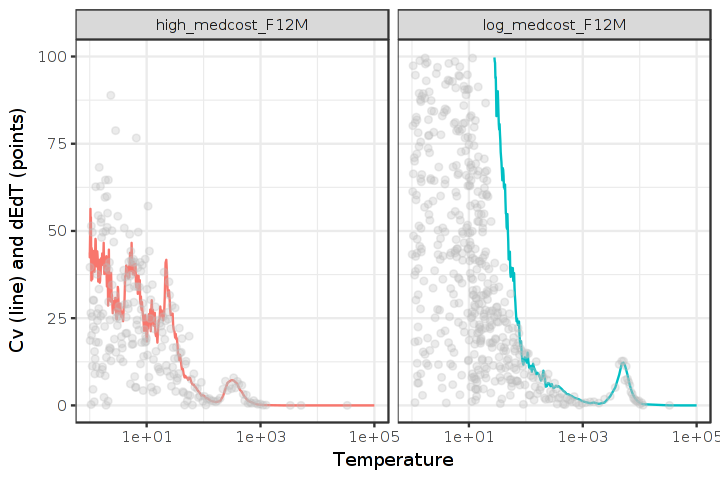

In [21]:
options(repr.plot.width=6, repr.plot.height=4)

ggplot(data=out, aes(x=Temperature)) +
geom_line(aes(y=Cv,group=Endpoint, colour=Endpoint)) +
geom_point(aes(y=dEdT,group=Endpoint),colour="gray",alpha=0.3) +
facet_wrap( ~ Endpoint, ncol=5) +
scale_x_log10() + 
scale_y_continuous(limits = c(0, 100)) + 
ylab("Cv (line) and dEdT (points)") +
theme_bw()+theme(legend.position="none")

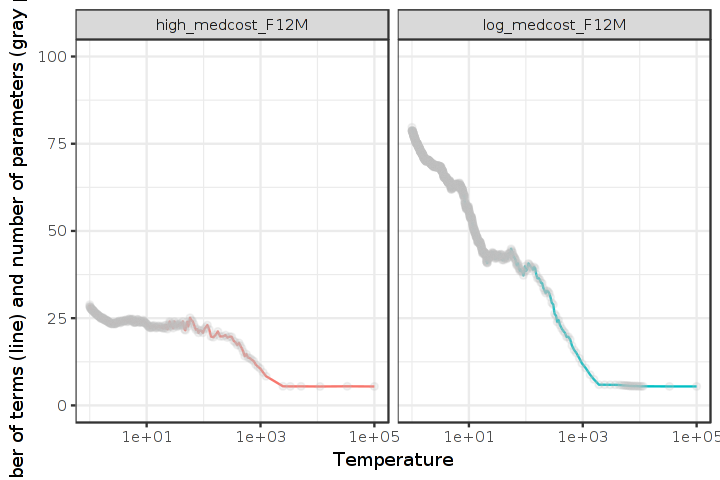

In [23]:
options(repr.plot.width=6, repr.plot.height=4)

ggplot(data=out, aes(x=Temperature)) +
geom_line(aes(y=Number_terms,group=Endpoint, colour=Endpoint)) +
geom_point(aes(y=Num_Parameters,group=Endpoint),colour="gray",alpha=0.2) +
facet_wrap( ~ Endpoint, ncol=5) +
scale_x_log10() + 
scale_y_continuous(limits = c(0, 100)) + 
ylab("Number of terms (line) and number of parameters (gray points)") +
theme_bw()+theme(legend.position="none")

# Performance

In [14]:
getwd()

[1] "/gnshealthcare/shared/nli/models/M3"

In [331]:
csv = "A_V3sample100k_2016input2017output_full.csv"

ens <- fsReadModel("./qjob.100ksample_A_ctd2/ensemble.txt.proto")

In [14]:
csv = "V3_Rx_wRxCost_sample100k_2016input2017output_full.csv"

ens <- fsReadModel('./qjob.100ksample_Rx_wRxCost/ensemble.txt.proto')

In [15]:
csv = "A_V3sample100k_2016input2017output_lowcost2016.csv"

ens <- fsReadModel('./qjob.100ksample_A_lowcost2016/ensemble.txt.proto')

In [19]:
csv = "V3_DF2_highmedcost2016_MED_2016input2017output_full.csv"

ens <- fsReadModel('./qjob.highmedcost2016/ensemble.txt.proto')

In [14]:
csv = "Scored1fs3_V3_Rx_wRxCost_sample100k_2016input2017output_full.csv"

ens <- fsReadModel('./qjob.100ksample_MED_RX_Score_PredictedCost/ensemble.txt.proto')

In [24]:
csv = "V3_DF2_NAto0_M32Acols.csv"

ens <- fsReadModel("./qjob.100ksample_A_ctd2/ensemble.txt.proto")

In [15]:
csv = "V3_DF2_NAto0_M32Acols_lowcost2016.csv"

ens <- fsReadModel('./qjob.100ksample_A_lowcost2016/ensemble.txt.proto')

In [16]:
df <- fread(csv, data.table = F)
dim(df)

[1] 2388754     149

In [17]:
edge <- fsEdgeFrequencies(ens)
head(edge)
tail(edge)

input            output           freq
1 DIAG_CCS_196     high_medcost2017 1   
2 log_medcost_2016 high_medcost2017 1   
3 MEMBR_AGE        high_medcost2017 1   
4 SVC_PROC_CCS_76  high_medcost2017 1   
5 DIAG_CCS_10      log_medcost_2017 1   
6 DIAG_CCS_126     log_medcost_2017 1

input              output           freq     
93 DIAG_CCS_217       log_medcost_2017 0.0078125
94 DIAG_CCS_253       log_medcost_2017 0.0078125
95 PLACE_OF_SVC_CD_20 log_medcost_2017 0.0078125
96 PLACE_OF_SVC_CD_90 log_medcost_2017 0.0078125
97 SVC_PROC_CCS_201   log_medcost_2017 0.0078125
98 SVC_PROC_CCS_33    log_medcost_2017 0.0078125

In [18]:
samplesize=30
chunksize=10000

#bernoulli_endpoints <- c('death','hospice','case')
bernoulli_endpoints <- c('high_medcost2017')
continuous_endpoints <- c('log_medcost_2017')

endpoints <- c(bernoulli_endpoints,continuous_endpoints)
#endpoints <- bernoulli_endpoints

In [19]:
fsresult <- fsSimulateOverwrite(ens, outputs = endpoints, sampleSize = samplesize,
                                reportMeans = T, reportStdDev = T, baselineData = csv,seed = 12345,
                                chunkDataByRows=chunksize)

str(fsresult)

List of 3
 $ experiment: chr [1:2] "Experiment" "Experiment"
 $ output    : chr [1:2] "high_medcost2017" "log_medcost_2017"
 $ result    :List of 2
  ..$ :'data.frame':	2388754 obs. of  6 variables:
  .. ..$ condition   : Factor w/ 1 level "Default Condition": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ fixedDataRow: int [1:2388754] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..$ network     : int [1:2388754] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
  .. ..$ output      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ pmf         :'data.frame':	2388754 obs. of  2 variables:
  .. .. ..$ 0: num [1:2388754] 0.806 0.824 0.815 0.789 0.741 ...
  .. .. ..$ 1: num [1:2388754] 0.02165 0.00418 0.01334 0.0387 0.08714 ...
  .. ..$ pmf_sd      :'data.frame':	2388754 obs. of  2 variables:
  .. .. ..$ 0: num [1:2388754] 0.367 0.375 0.371 0.36 0.338 ...
  .. .. ..$ 1: num [1:2388754] 0.00997 0.00194 0.00626 0.01794 0.04034 ...
  ..$ :'data.frame':	2388754 obs. of  9 variables:
  .. ..$ condition   : Factor w/ 1 level "

In [20]:
for(endpoint in bernoulli_endpoints){
    outresult12m <- data.frame(fsresult$result[fsresult$output==endpoint])
    df[[paste0('Probability_',endpoint)]] <- outresult12m$pmf[[2]]
    rm(outresult12m)
}

for(endpoint in continuous_endpoints){
    outresult12m <- data.frame(fsresult$result[fsresult$output==endpoint])
    df[[paste0('Predicted_',endpoint)]] <- outresult12m$output
    df[[paste0('Predicted_',gsub('log_','',endpoint))]] <- exp(outresult12m$output+((outresult12m$output.sd)^2)/4)
    rm(outresult12m)
}

#df$Predicted_MedicalCost_F12M[df$Predicted_MedicalCost_F12M > 2e6] <- 2e6

In [21]:
dim(df)

[1] 2388754     152

In [22]:
head(df)

INDIV_ENTERPRISE_ID DIAG_CCS_196 DIAG_CCS_205 DIAG_CCS_259 DIAG_CCS_42
1 37565124            0            0            0            0          
2 97536238            0            0            0            0          
3 49810006            0            0            0            0          
4 84487065            0            0            0            0          
5 19883720            0            0            0            0          
6  3012559            0            0            0            0          
  DIAG_CCS_50 log_medcost_2016 MEMBR_AGE PLACE_OF_SVC_CD_21 SVC_PROC_CCS_76 ⋯
1 0           5.3132           29        0                  0               ⋯
2 0           0.0000           25        0                  0               ⋯
3 0           3.2958           39        0                  0               ⋯
4 0           6.2934           33        0                  0               ⋯
5 0           7.8763           46        0                  0               ⋯
6 0           6.3474           49        0                  0               ⋯
  SVC_PROC_CCS_126 SVC_PROC_CCS_145 SVC_PROC_CCS_183 SVC_PROC_CCS_241
1 0                0                0                0               
2 0                0                0                0               
3 0                0                0                0               
4 0                0                0                0               
5 0                0                0                0               
6 0                0                0                0               
  SVC_PROC_CCS_84 high_medcost2017 log_medcost_2017
1 0               0                5.0752          
2 0               0                5.4889          
3 0               0                7.6266          
4 0               0                6.3297          
5 0               0                6.4167          
6 0               0                6.6933          
  Probability_high_medcost2017 Predicted_log_medcost_2017
1 0.02165098                   4.315169                  
2 0.00418475                   0.442759                  
3 0.01334051                   2.450023                  
4 0.03870105                   4.584844                  
5 0.08713562                   6.024212                  
6 0.04594669                   5.306536                  
  Predicted_medcost_2017
1  478.769087           
2    3.961513           
3   41.221458           
4  722.974184           
5 6524.863867           
6 2202.033426

In [23]:
fwrite(df,file=paste0("Scored_",csv),quote=F,na="NA")

In [24]:
names(df)

[1] "INDIV_ENTERPRISE_ID"          "DIAG_CCS_196"                
  [3] "DIAG_CCS_205"                 "DIAG_CCS_259"                
  [5] "DIAG_CCS_42"                  "DIAG_CCS_50"                 
  [7] "log_medcost_2016"             "MEMBR_AGE"                   
  [9] "PLACE_OF_SVC_CD_21"           "SVC_PROC_CCS_76"             
 [11] "DIAG_CCS_10"                  "DIAG_CCS_126"                
 [13] "DIAG_CCS_128"                 "DIAG_CCS_144"                
 [15] "DIAG_CCS_200"                 "DIAG_CCS_211"                
 [17] "DIAG_CCS_256"                 "DIAG_CCS_257"                
 [19] "DIAG_CCS_258"                 "DIAG_CCS_53"                 
 [21] "DIAG_CCS_651"                 "DIAG_CCS_91"                 
 [23] "DIAG_CCS_92"                  "DIAG_CCS_98"                 
 [25] "GENDER_CD_M"                  "high_medcost2016"            
 [27] "PLACE_OF_SVC_CD_11"           "PLACE_OF_SVC_CD_22"          
 [29] "PLACE_OF_SVC_CD_23"           "PLACE_OF_SVC_CD_99"          
 [31] "SVC_PROC_CCS_240"             "SVC_PROC_CCS_218"            
 [33] "DIAG_CCS_51"                  "DIAG_CCS_7"                  
 [35] "DIAG_CCS_171"                 "DIAG_CCS_217"                
 [37] "DIAG_CCS_82"                  "DIAG_CCS_652"                
 [39] "DIAG_CCS_212"                 "DIAG_CCS_203"                
 [41] "PLACE_OF_SVC_CD_01"           "DIAG_CCS_654"                
 [43] "DIAG_CCS_158"                 "SVC_PROC_CCS_206"            
 [45] "DIAG_CCS_181"                 "DIAG_CCS_657"                
 [47] "DIAG_CCS_133"                 "SVC_PROC_CCS_198"            
 [49] "SVC_PROC_CCS_160"             "DIAG_CCS_138"                
 [51] "DIAG_CCS_164"                 "DIAG_CCS_48"                 
 [53] "DIAG_CCS_39"                  "DIAG_CCS_89"                 
 [55] "DIAG_CCS_155"                 "SVC_PROC_CCS_91"             
 [57] "PLACE_OF_SVC_CD_24"           "DIAG_CCS_134"                
 [59] "DIAG_CCS_174"                 "DIAG_CCS_204"                
 [61] "DIAG_CCS_15"                  "DIAG_CCS_81"                 
 [63] "DIAG_CCS_202"                 "DIAG_CCS_108"                
 [65] "DIAG_CCS_5"                   "DIAG_CCS_650"                
 [67] "SVC_PROC_CCS_58"              "DIAG_CCS_57"                 
 [69] "DIAG_CCS_83"                  "SVC_PROC_CCS_144"            
 [71] "DIAG_CCS_97"                  "DIAG_CCS_218"                
 [73] "DIAG_CCS_161"                 "DIAG_CCS_162"                
 [75] "DIAG_CCS_208"                 "DIAG_CCS_662"                
 [77] "SVC_PROC_CCS_124"             "DIAG_CCS_14"                 
 [79] "SVC_PROC_CCS_220"             "DIAG_CCS_210"                
 [81] "DIAG_CCS_84"                  "SVC_PROC_CCS_224"            
 [83] "DIAG_CCS_166"                 "SVC_PROC_CCS_151"            
 [85] "SVC_PROC_CCS_203"             "SVC_PROC_CCS_217"            
 [87] "DIAG_CCS_127"                 "DIAG_CCS_253"                
 [89] "DIAG_CCS_2605"                "DIAG_CCS_49"                 
 [91] "PLACE_OF_SVC_CD_12"           "PLACE_OF_SVC_CD_49"          
 [93] "SVC_PROC_CCS_57"              "DIAG_CCS_38"                 
 [95] "DIAG_CCS_59"                  "SVC_PROC_CCS_222"            
 [97] "DIAG_CCS_101"                 "DIAG_CCS_88"                 
 [99] "SVC_PROC_CCS_85"              "DIAG_CCS_114"                
[101] "DIAG_CCS_118"                 "DIAG_CCS_121"                
[103] "DIAG_CCS_151"                 "DIAG_CCS_177"                
[105] "DIAG_CCS_190"                 "DIAG_CCS_24"                 
[107] "DIAG_CCS_241"                 "DIAG_CCS_43"                 
[109] "DIAG_CCS_44"                  "DIAG_CCS_58"                 
[111] "DIAG_CCS_61"                  "DIAG_CCS_655"                
[113] "DIAG_CCS_661"                 "DIAG_CCS_670"                
[115] "DIAG_CCS_80"                  "PLACE_OF_SVC_CD_57"          
[117] "SVC_PROC_CCS_127"             "SVC_PROC_CCS_142"   

## FS M3.1 to M3.3 data

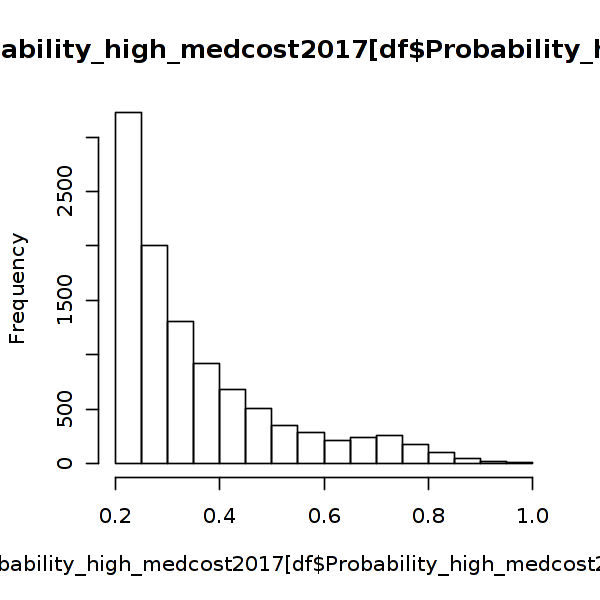

In [34]:
hist(df$Probability_high_medcost2017[df$Probability_high_medcost2017>0.2])

In [39]:
#M3.1 FS M3.3 data
summary(df$high_medcost2017)
summary(df$Probability_high_medcost2017)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.09047 0.00000 1.00000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002833 0.022720 0.048890 0.086890 0.103700 0.981000 

In [41]:
summary(df$log_medcost_2017)
summary(df$Predicted_log_medcost_2017)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   5.278   6.579   6.040   7.836  14.900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.2487  5.2200  6.2030  5.7590  7.1210 13.1300 

In [38]:
summary(df$Predicted_medcost_2017)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
      2.5     558.5    1495.0    4291.0    3753.0 1526000.0 

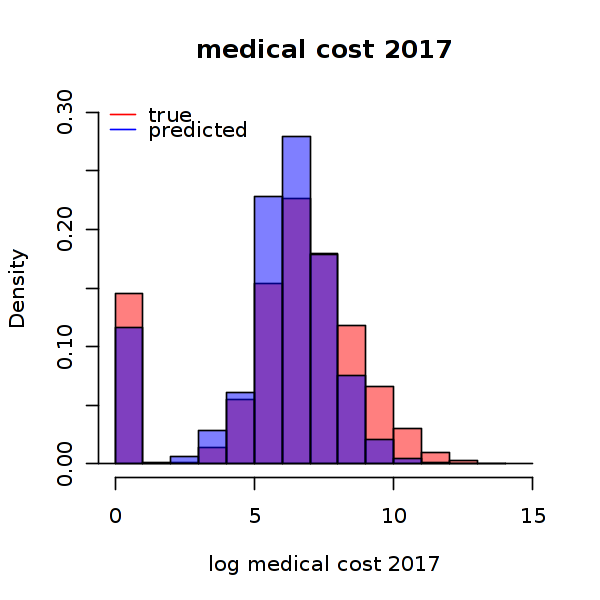

In [36]:
options(repr.plot.width=5, repr.plot.height=5)
hist(df$log_medcost_2017, col=rgb(1,0,0,0.5), 
     xlim=c(0,15), ylim=c(0,0.3),
     freq=F,
     main="medical cost 2017", xlab="log medical cost 2017")
hist(df$Predicted_log_medcost_2017, col=rgb(0,0,1,0.5), 
     freq=F,
     add=T)
legend("topleft", 
       c("true", "predicted"), 
       lty=c(1, 1), 
       col=c("red","blue"), 
       bty = "n")

## FS M3.3 (rx+med) to M3.3 data

In [ ]:
hist(df$Probability_high_medcost2017[df$Probability_high_medcost2017>0.2])

summary(df$high_medcost2017)
summary(df$Probability_high_medcost2017)

summary(df$log_medcost_2017)
summary(df$Predicted_log_medcost_2017)

summary(df$Predicted_medcost_2017)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.09047 0.00000 1.00000 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0001787 0.0264800 0.0492100 0.0905500 0.1017000 0.9892000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   5.278   6.579   6.040   7.836  14.900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.322   5.176   6.205   6.041   7.142  13.270 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     15.0     723.7    2030.0    6054.0    5196.0 2529000.0 

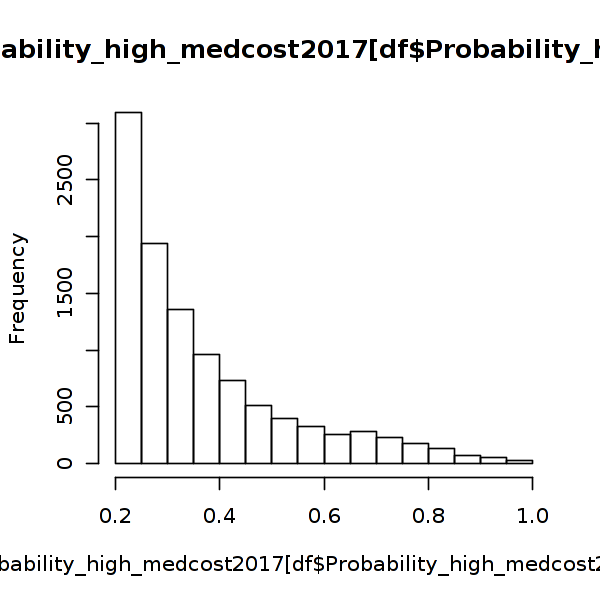

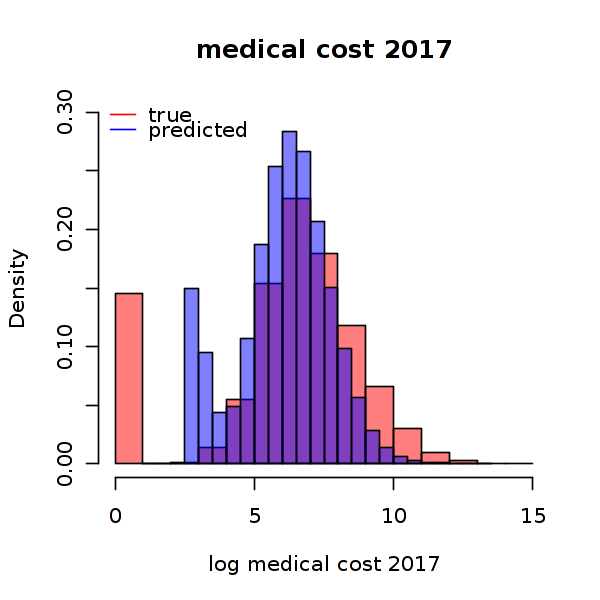

In [25]:
options(repr.plot.width=5, repr.plot.height=5)
hist(df$log_medcost_2017, col=rgb(1,0,0,0.5), 
     xlim=c(0,15), ylim=c(0,0.3),
     freq=F,
     main="medical cost 2017", xlab="log medical cost 2017")
hist(df$Predicted_log_medcost_2017, col=rgb(0,0,1,0.5), 
     freq=F,
     add=T)
legend("topleft", 
       c("true", "predicted"), 
       lty=c(1, 1), 
       col=c("red","blue"), 
       bty = "n")

## Predicted log cost distribution

### Med elig (M3.2A)

In [69]:
df <- fread("Scored_A_V3sample100k_2016input2017output_full.csv")

In [70]:
summary(df$log_medcost_2016)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   5.124   3.956   7.134  14.540 

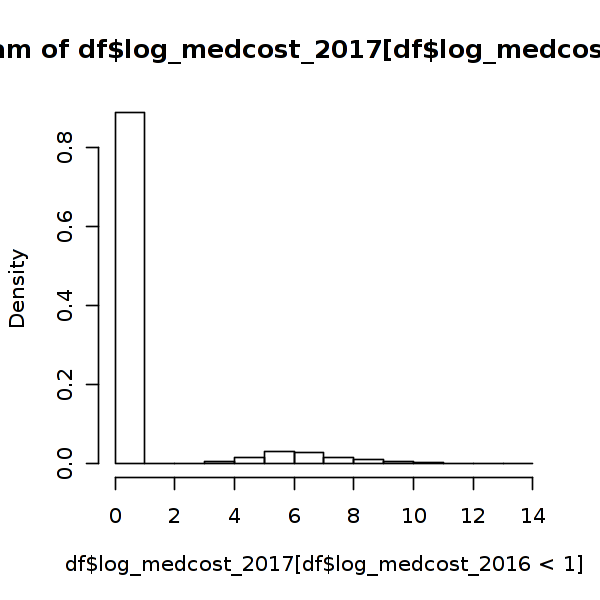

In [74]:
hist(df$log_medcost_2017[df$log_medcost_2016<1],freq = F)

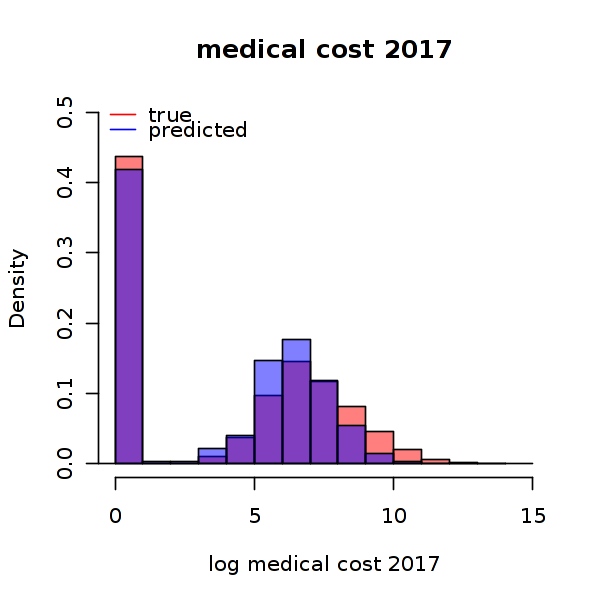

In [30]:
options(repr.plot.width=5, repr.plot.height=5)
hist(df$log_medcost_2017, col=rgb(1,0,0,0.5), 
     xlim=c(0,15), ylim=c(0,0.5),
     freq=F,
     main="medical cost 2017", xlab="log medical cost 2017")
hist(df$Predicted_log_medcost_2017, col=rgb(0,0,1,0.5), 
     freq=F,
     add=T)
legend("topleft", 
       c("true", "predicted"), 
       lty=c(1, 1), 
       col=c("red","blue"), 
       bty = "n")

### M3.2 model on M3.3 data

In [27]:
df <- fread("Scored1fs3_V3_Rx_wRxCost_sample100k_2016input2017output_full.csv")

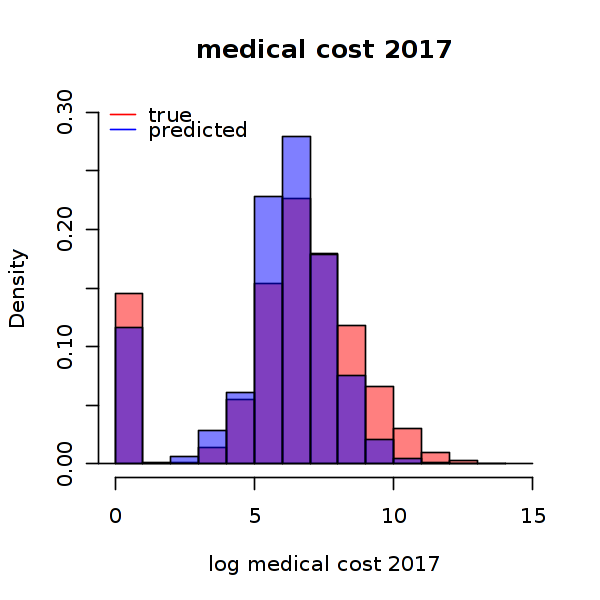

In [28]:
options(repr.plot.width=5, repr.plot.height=5)
hist(df$log_medcost_2017, col=rgb(1,0,0,0.5), 
     xlim=c(0,15), ylim=c(0,0.3),
     freq=F,
     main="medical cost 2017", xlab="log medical cost 2017")
hist(df$Predicted_log_medcost_2017, col=rgb(0,0,1,0.5), 
     freq=F,
     add=T)
legend("topleft", 
       c("true", "predicted"), 
       lty=c(1, 1), 
       col=c("red","blue"), 
       bty = "n")

In [ ]:
#scored_scored_

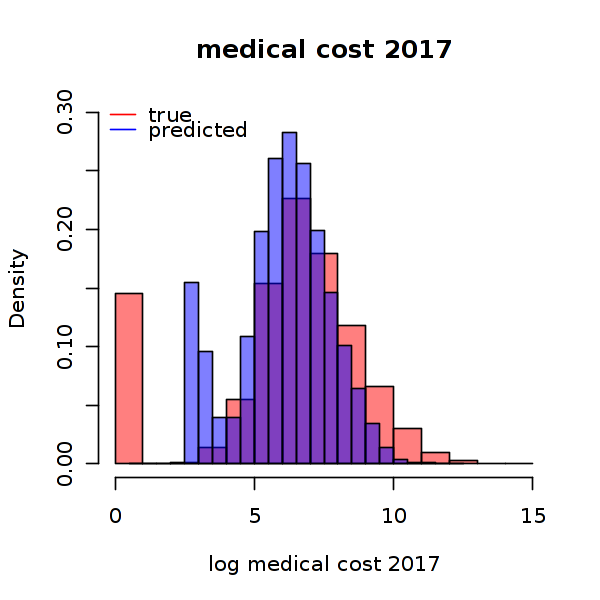

In [23]:
options(repr.plot.width=5, repr.plot.height=5)
hist(df$log_medcost_2017, col=rgb(1,0,0,0.5), 
     xlim=c(0,15), ylim=c(0,0.3),
     freq=F,
     main="medical cost 2017", xlab="log medical cost 2017")
hist(df$Predicted_log_medcost_2017, col=rgb(0,0,1,0.5), 
     freq=F,
     add=T)
legend("topleft", 
       c("true", "predicted"), 
       lty=c(1, 1), 
       col=c("red","blue"), 
       bty = "n")

### Med + Rx elig

In [75]:
df <- fread("Scored_V3_Rx_wRxCost_sample100k_2016input2017output_full.csv")

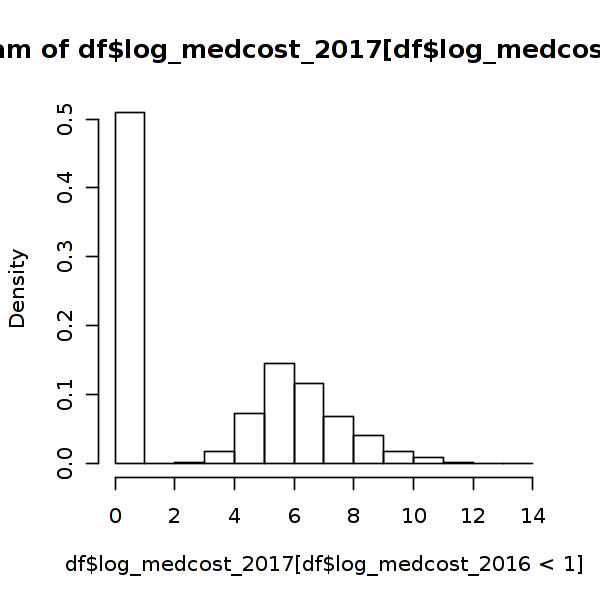

In [77]:
#hist(df$log_medcost_2016[df$log_medcost_2016<2])

hist(df$log_medcost_2017[df$log_medcost_2016<1],freq = F)

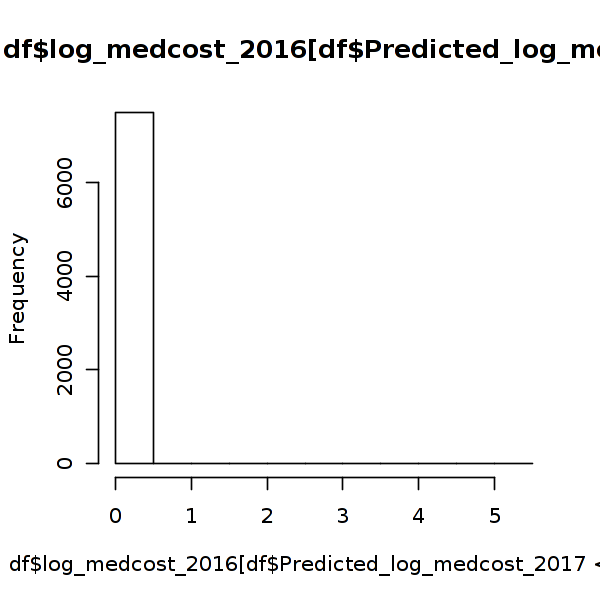

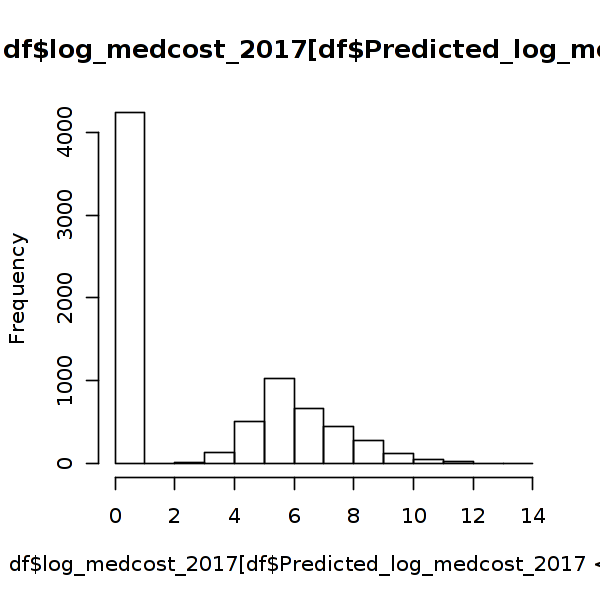

In [43]:
hist(df$log_medcost_2016[df$Predicted_log_medcost_2017<3])

hist(df$log_medcost_2017[df$Predicted_log_medcost_2017<3])

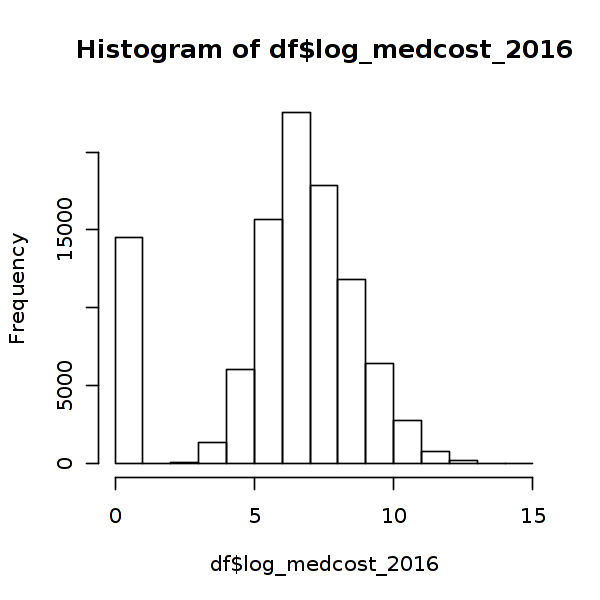

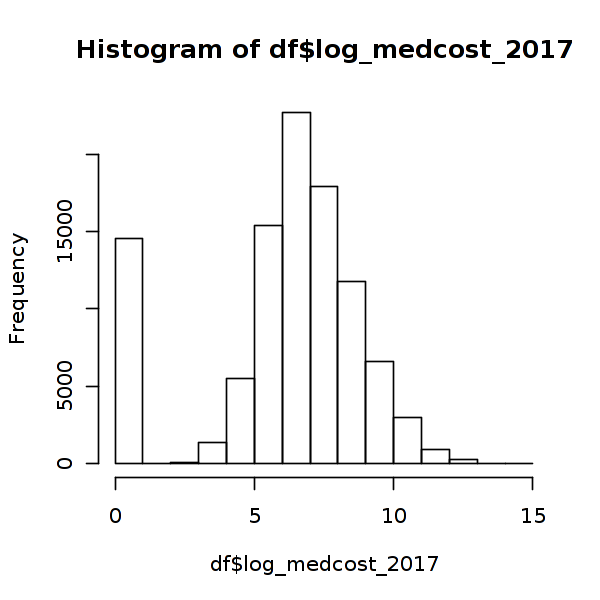

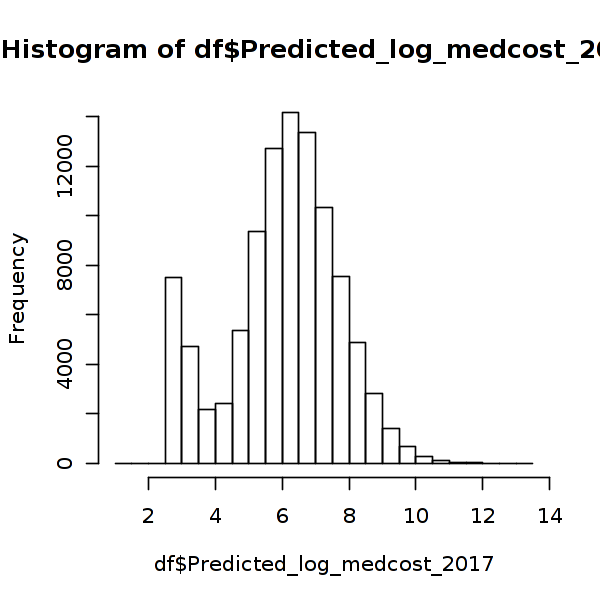

In [28]:
hist(df$log_medcost_2016)
hist(df$log_medcost_2017)
hist(df$Predicted_log_medcost_2017)

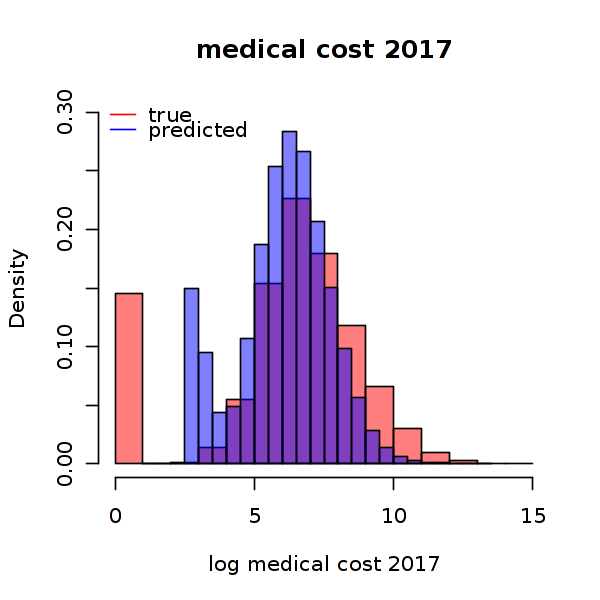

In [32]:
options(repr.plot.width=5, repr.plot.height=5)
hist(df$log_medcost_2017, col=rgb(1,0,0,0.5), 
     xlim=c(0,15), ylim=c(0,0.3),
     freq=F,
     main="medical cost 2017", xlab="log medical cost 2017")
hist(df$Predicted_log_medcost_2017, col=rgb(0,0,1,0.5), 
     freq=F,
     add=T)
legend("topleft", 
       c("true", "predicted"), 
       lty=c(1, 1), 
       col=c("red","blue"), 
       bty = "n")

### low to high (med only)

In [33]:
df <- fread("Scored_A_V3sample100k_2016input2017output_lowcost2016.csv")

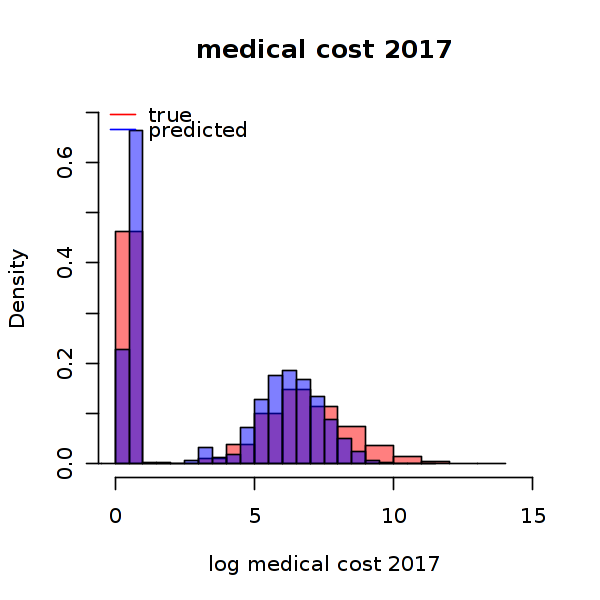

In [34]:
options(repr.plot.width=5, repr.plot.height=5)
hist(df$log_medcost_2017, col=rgb(1,0,0,0.5), 
     xlim=c(0,15), ylim=c(0,0.7),
     freq=F,
     main="medical cost 2017", xlab="log medical cost 2017")
hist(df$Predicted_log_medcost_2017, col=rgb(0,0,1,0.5), 
     freq=F,
     add=T)
legend("topleft", 
       c("true", "predicted"), 
       lty=c(1, 1), 
       col=c("red","blue"), 
       bty = "n")

### high to high (med only)

In [30]:
df <- fread("Scored_V3_DF2_highmedcost2016_MED_2016input2017output_full.csv")

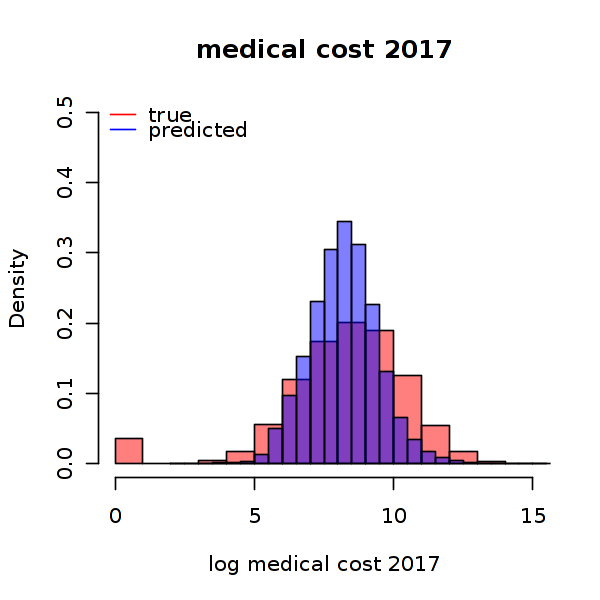

In [31]:
options(repr.plot.width=5, repr.plot.height=5)
hist(df$log_medcost_2017, col=rgb(1,0,0,0.5), 
     xlim=c(0,15), ylim=c(0,0.5),
     freq=F,
     main="medical cost 2017", xlab="log medical cost 2017")
hist(df$Predicted_log_medcost_2017, col=rgb(0,0,1,0.5), 
     freq=F,
     add=T)
legend("topleft", 
       c("true", "predicted"), 
       lty=c(1, 1), 
       col=c("red","blue"), 
       bty = "n")

## CM population counterfactual - quick version

In [40]:
#ID who had CM in 2016
cm <- fread("/gnshealthcare/shared/yyang/Notebooks/CM_eligible_pid_cid_list.csv")

In [41]:
#cm_id <- as.character(unique(cm$indiv_entpr_id))
cm_id <- unique(cm$indiv_entpr_id)

In [42]:
str(cm_id)

 int [1:117193] 10002740 10004205 10007691 10007908 10013853 10014969 10015199 10016942 10019864 10020471 ...


In [106]:
df <- fread("Scored1fs3_V3_Rx_wRxCost_sample100k_2016input2017output_full.csv")

In [43]:
dim(df[df$INDIV_ENTERPRISE_ID %in% cm_id])

[1] 7108 1168

In [48]:
head(df[df$INDIV_ENTERPRISE_ID %in% cm_id,"Predicted_log_medcost_2017"])

Predicted_log_medcost_2017
1 10.027655                 
2  7.832651                 
3  7.070275                 
4  7.041169                 
5  8.232064                 
6  7.494572

In [60]:
summary(df$log_medcost_2017[df$INDIV_ENTERPRISE_ID %in% cm_id])
summary(df$Predicted_log_medcost_2017[df$INDIV_ENTERPRISE_ID %in% cm_id])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   6.836   8.288   8.149   9.896  14.900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2389  6.4340  7.3790  7.2620  8.4050 13.1300 

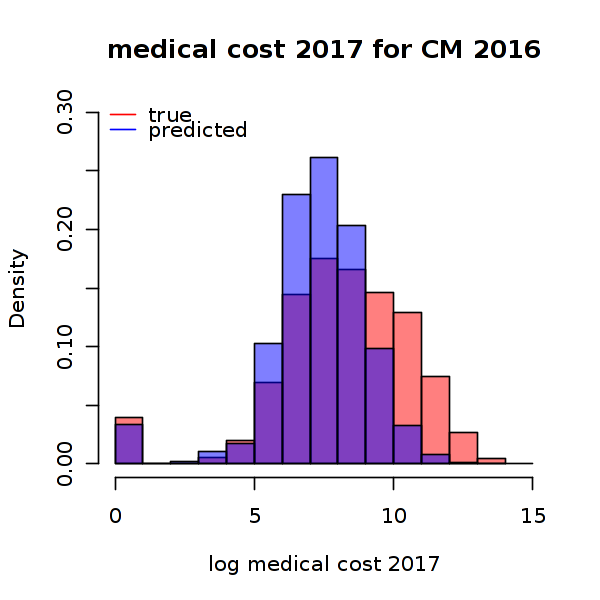

In [58]:
options(repr.plot.width=5, repr.plot.height=5)
hist(df$log_medcost_2017[df$INDIV_ENTERPRISE_ID %in% cm_id], col=rgb(1,0,0,0.5), 
     xlim=c(0,15), ylim=c(0,0.3),
     freq=F,
     main="medical cost 2017 for CM 2016", xlab="log medical cost 2017")
hist(df$Predicted_log_medcost_2017[df$INDIV_ENTERPRISE_ID %in% cm_id], col=rgb(0,0,1,0.5), 
     freq=F,
     add=T)
legend("topleft", 
       c("true", "predicted"), 
       lty=c(1, 1), 
       col=c("red","blue"), 
       bty = "n")

In [119]:
df <- fread("Scored3fs3_V3_Rx_wRxCost_sample100k_2016input2017output_full.csv",
            select=c('INDIV_ENTERPRISE_ID',paste0('Probability_',bernoulli_endpoints),bernoulli_endpoints),
            colClasses=c(INDIV_ENTERPRISE_ID="character"),
           )

summary(df[[paste0('Probability_',bernoulli_endpoints)]])
summary(df[[bernoulli_endpoints]])

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0001787 0.0264800 0.0492100 0.0905500 0.1017000 0.9892000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.09047 0.00000 1.00000 

df <- fread("Scored_B_V3sample100k_2016input2017output_full.csv",
            select=c('INDIV_ENTERPRISE_ID',paste0('Probability_',bernoulli_endpoints),bernoulli_endpoints),
            colClasses=c(INDIV_ENTERPRISE_ID="character"),
           )

summary(df[[paste0('Probability_',bernoulli_endpoints)]])
summary(df[[bernoulli_endpoints]])

In [120]:
str(df)

Classes ‘data.table’ and 'data.frame':	100000 obs. of  3 variables:
 $ INDIV_ENTERPRISE_ID         : chr  "59749030" "97693477" "69235637" "43707141" ...
 $ Probability_high_medcost2017: num  0.3198 0.0209 0.0894 0.036 0.2237 ...
 $ high_medcost2017            : int  0 0 0 0 1 0 1 0 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


## risk score from cigna

In [37]:
df <- fread("V3_DF2_charlson.csv")

In [38]:
str(df)

Classes ‘data.table’ and 'data.frame':	2538857 obs. of  30 variables:
 $ INDIV_ENTERPRISE_ID          : int  32811592 37565124 97536238 49810006 84487065 19883720 3012559 69905691 83953245 24719121 ...
 $ HOME_ADDR_STE_CD             : chr  "MN" "CO" "MN" "MN" ...
 $ MEMBR_AGE                    : int  29 29 25 39 33 46 49 38 7 29 ...
 $ GENDER_CD_M                  : int  1 0 0 1 1 0 0 0 0 0 ...
 $ PLACE_OF_SVC_CD_11           : num  1 1 NA NA 1 1 1 1 1 1 ...
 $ PLACE_OF_SVC_CD_21           : num  1 NA NA NA NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_23           : num  1 NA NA NA NA 1 NA NA NA NA ...
 $ PLACE_OF_SVC_CD_34           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ PLACE_OF_SVC_CD_65           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ med_cost_2016                : num  20583 202 NA 26 540 ...
 $ med_cost_2017                : num  416 159 241 2051 560 ...
 $ high_medcost2016             : int  1 0 0 0 0 0 0 0 0 0 ...
 $ high_medcost2017             : int  0 0 0 0 0 0 0 0 0

In [39]:
risk = fread("../maxrisk_member_year.csv")#, colClasses=c(INDIV_ENTERPRISE_ID="character"),)

In [40]:
str(risk)

Classes ‘data.table’ and 'data.frame':	6681734 obs. of  3 variables:
 $ INDIV_ENTERPRISE_ID: int  3859 4807 831 6828 252 553 263 3933 4942 2074 ...
 $ RSLT_YR            : int  2018 2018 2018 2018 2018 2017 2018 2018 2018 2018 ...
 $ maxrisk            : num  0.0164 0.0514 0.0251 0.0408 0.02 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [46]:
risk16=risk[RSLT_YR==2016]

In [41]:
risk17=risk[RSLT_YR==2017]

In [42]:
risk18=risk[RSLT_YR==2018]

In [47]:
dim(risk)
dim(risk16)
dim(risk17)
dim(risk18)

[1] 6681734       3

[1] 916894      3

[1] 1249407       3

[1] 4032366       3

In [ ]:
dim(risk17[])

In [48]:
str(intersect(df$INDIV_ENTERPRISE_ID,risk16$INDIV_ENTERPRISE_ID))

 int [1:20991] 32042099 32340705 32843105 4787504 54394175 6712149 96399857 20731608 96815294 9533249 ...


In [45]:
str(intersect(df$INDIV_ENTERPRISE_ID,risk17$INDIV_ENTERPRISE_ID))

 int [1:170483] 32811592 37565124 97536238 49810006 84487065 7476427 35397220 35394954 35395159 35399252 ...


In [60]:
str(risk17$maxrisk[risk17$INDIV_ENTERPRISE_ID %in% df$INDIV_ENTERPRISE_ID])
str(risk17$maxrisk[(risk17$INDIV_ENTERPRISE_ID %in% df$INDIV_ENTERPRISE_ID) & (risk17$maxrisk>0.2)])
summary(risk17$maxrisk[risk17$INDIV_ENTERPRISE_ID %in% df$INDIV_ENTERPRISE_ID])

 num [1:170483] 0.0128 0.1954 0.9135 0.0266 0.011 ...
 num [1:11821] 0.914 0.329 0.351 0.216 0.514 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02328 0.04114 0.07288 0.07571 0.99990 

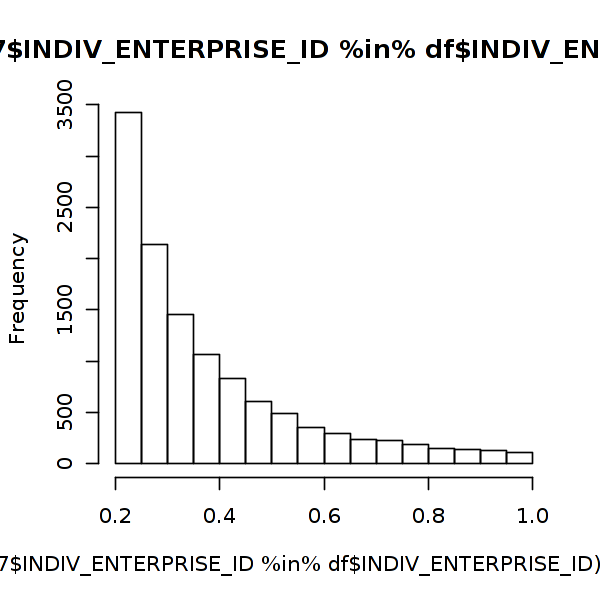

In [61]:
hist(risk17$maxrisk[(risk17$INDIV_ENTERPRISE_ID %in% df$INDIV_ENTERPRISE_ID) & (risk17$maxrisk>0.2)])

In [206]:
summary(risk17$maxrisk)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01927 0.02955 0.05213 0.04802 1.00000 

In [163]:
summary(risk18$maxrisk)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01904 0.02974 0.05088 0.04796 1.00000 

In [207]:
df = merge(df,risk17,by='INDIV_ENTERPRISE_ID',all.x=T,all.y=F)

In [208]:
str(df)

Classes ‘data.table’ and 'data.frame':	100000 obs. of  5 variables:
 $ INDIV_ENTERPRISE_ID         : chr  "1000" "10000610" "10001421" "10001656" ...
 $ Probability_high_medcost2017: num  0.1445 0.0745 0.0832 0.0564 0.0139 ...
 $ high_medcost2017            : int  1 0 0 0 0 0 0 1 0 0 ...
 $ RSLT_YR                     : int  NA NA NA NA NA NA NA 2017 NA NA ...
 $ maxrisk                     : num  NA NA NA NA NA ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr "INDIV_ENTERPRISE_ID"


## prec-rec

modnames dsids curvetypes aucs     
1 m1       1     ROC        0.7983367
2 m1       1     PRC        0.3858935

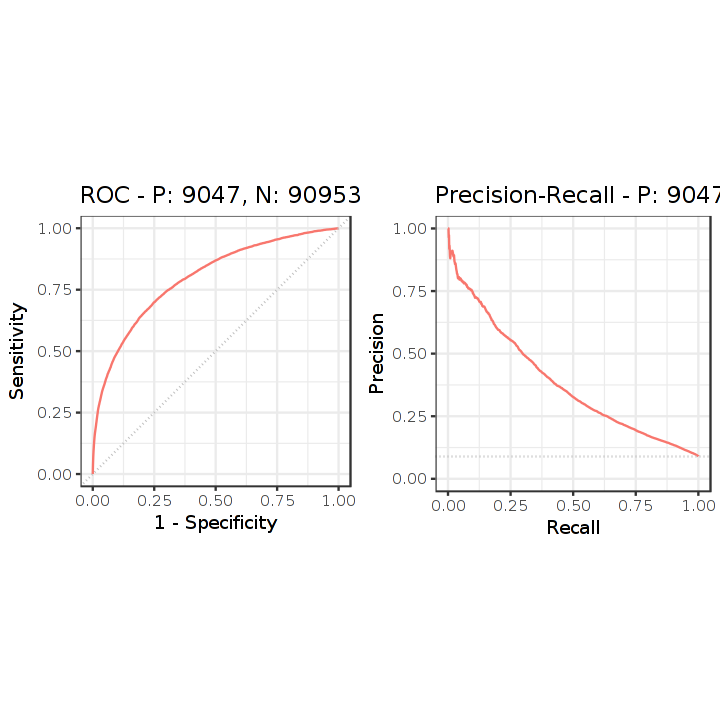

In [131]:
eval0 <- evalmod(scores = df[[paste0('Probability_',bernoulli_endpoints)]], 
                 labels = df[[bernoulli_endpoints]],
                 #mode = "basic"
                )
options(repr.plot.width=6, repr.plot.height=6)
autoplot(eval0)
auc(eval0)

In [122]:
str(eval0)

List of 2
 $ rocs:List of 1
  ..$ :List of 3
  .. ..$ x          : num [1:101000] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..$ y          : num [1:101000] 0 0.000111 0.000221 0.000332 0.000442 ...
  .. ..$ orig_points: logi [1:101000] TRUE TRUE TRUE TRUE TRUE TRUE ...
  .. ..- attr(*, "class")= chr "roc_curve"
  .. ..- attr(*, "modname")= chr "m1"
  .. ..- attr(*, "dsid")= num 1
  .. ..- attr(*, "nn")= int 90953
  .. ..- attr(*, "np")= int 9047
  .. ..- attr(*, "auc")= num 0.798
  .. ..- attr(*, "xlim")= num [1:2] 0 1
  .. ..- attr(*, "ylim")= num [1:2] 0 1
  .. ..- attr(*, "pauc")= logi NA
  .. ..- attr(*, "spauc")= logi NA
  .. ..- attr(*, "args")=List of 1
  .. .. ..$ x_bins: num 1000
  .. ..- attr(*, "cpp_errmsg1")= chr ""
  .. ..- attr(*, "cpp_errmsg2")= chr ""
  .. ..- attr(*, "src")= logi NA
  .. ..- attr(*, "validated")= logi TRUE
  ..- attr(*, "class")= chr "crvgrp"
  ..- attr(*, "data_info")='data.frame':	1 obs. of  4 variables:
  .. ..$ modnames: chr "m1"
  .. ..$ dsids   : num 1
  .. .

In [123]:
str(data.frame(eval0$rocs[[1]]$x,eval0$rocs[[1]]$y))

'data.frame':	101000 obs. of  2 variables:
 $ eval0.rocs..1...x: num  0 0 0 0 0 0 0 0 0 0 ...
 $ eval0.rocs..1...y: num  0 0.000111 0.000221 0.000332 0.000442 ...


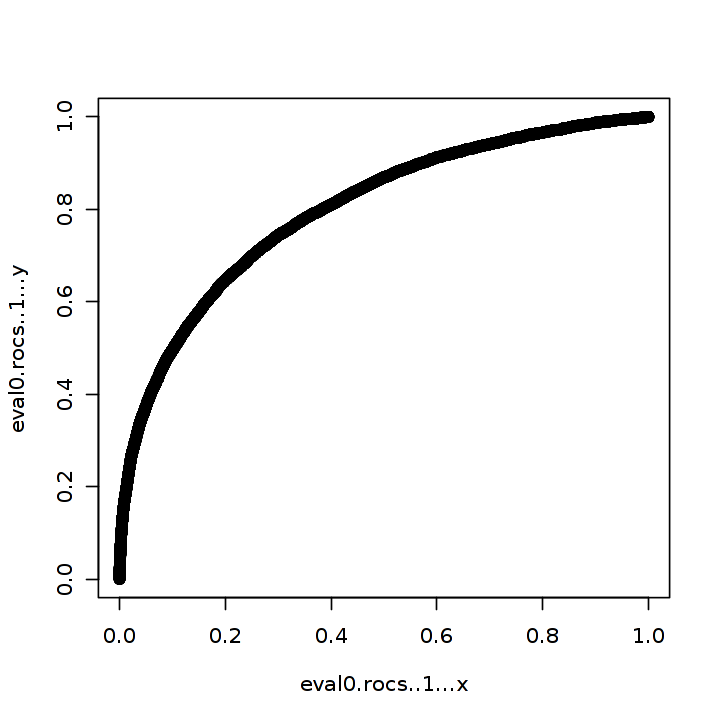

In [124]:
plot(data.frame(eval0$rocs[[1]]$x,eval0$rocs[[1]]$y))

In [125]:
str(data.frame(eval0$prcs[[1]]$x,eval0$prcs[[1]]$y))

'data.frame':	101000 obs. of  2 variables:
 $ eval0.prcs..1...x: num  0 0.000111 0.000221 0.000332 0.000442 ...
 $ eval0.prcs..1...y: num  1 1 1 1 1 1 1 1 1 1 ...


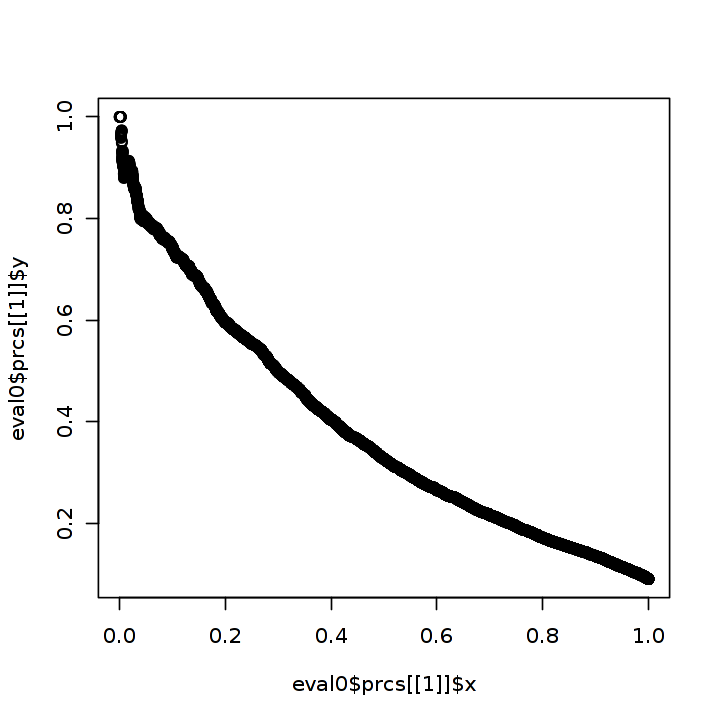

In [126]:
plot(eval0$prcs[[1]]$x,eval0$prcs[[1]]$y)

In [127]:
fwrite(data.frame(eval0$rocs[[1]]$x,eval0$rocs[[1]]$y),"M3.3_MED+RX_ROC.csv")

In [128]:
fwrite(data.frame(eval0$prcs[[1]]$x,eval0$prcs[[1]]$y),"M3.3_MED+RX_PRC.csv")

In [294]:
prc = fread("PRC.csv")

In [295]:
str(prc)

Classes ‘data.table’ and 'data.frame':	100996 obs. of  2 variables:
 $ eval0.prcs..1...x: num  0 0.000162 0.000324 0.000487 0.000649 ...
 $ eval0.prcs..1...y: num  1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [301]:
roc = fread("ROC.csv")

In [303]:
str(roc)

Classes ‘data.table’ and 'data.frame':	100997 obs. of  2 variables:
 $ eval0.rocs..1...x: num  0 0 0 0 0 0 0 0 0 0 ...
 $ eval0.rocs..1...y: num  0 0.000162 0.000324 0.000487 0.000649 ...
 - attr(*, ".internal.selfref")=<externalptr> 


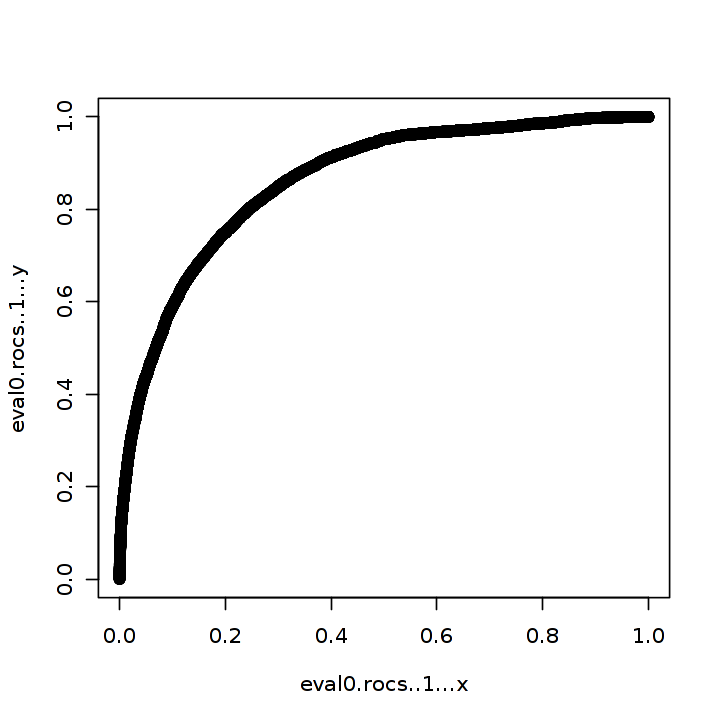

In [302]:
plot(roc)

In [296]:
getwd()

[1] "/gnshealthcare/shared/nli/models/M3"

In [210]:
summary(df$maxrisk)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.02    0.04    0.07    0.08    0.99   83050 

In [211]:
summary(df$Probability_high_medcost2017)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0003032 0.0269100 0.0492000 0.0905500 0.1013000 0.9920000 

In [212]:
head(df2)

INDIV_ENTERPRISE_ID Probability_high_medcost2017 high_medcost2017 RSLT_YR
1 1000655             0.055952577                  0                2017   
2 10014500            0.072226913                  0                2017   
3 10061947            0.230638086                  0                2017   
4 10253234            0.179895788                  0                2017   
5 10264799            0.127767744                  0                2017   
6 10273555            0.006387631                  0                2017   
  maxrisk 
1 0.055535
2 0.042639
3 0.070843
4 0.085614
5 0.078439
6 0.025775

In [213]:
df2 = na.omit(df)

In [214]:
dim(df2)
str(df2)

[1] 16950     5

Classes ‘data.table’ and 'data.frame':	16950 obs. of  5 variables:
 $ INDIV_ENTERPRISE_ID         : chr  "10008010" "10012520" "10026903" "10042371" ...
 $ Probability_high_medcost2017: num  0.1363 0.0307 0.0895 0.028 0.0123 ...
 $ high_medcost2017            : int  1 0 0 0 0 0 0 0 0 0 ...
 $ RSLT_YR                     : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ maxrisk                     : num  0.1007 0.0345 0.0795 0.0193 0.0102 ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr "INDIV_ENTERPRISE_ID"


In [215]:
sum(df$high_medcost2017)

[1] 9047

In [216]:
sum(df2$high_medcost2017)

[1] 1501

In [217]:
1501/16950

[1] 0.08855457

In [158]:
532/6617

[1] 0.08039897

In [159]:
6165/100000

[1] 0.06165

modnames dsids curvetypes aucs     
1 m1       1     ROC        0.7919719
2 m1       1     PRC        0.3736090

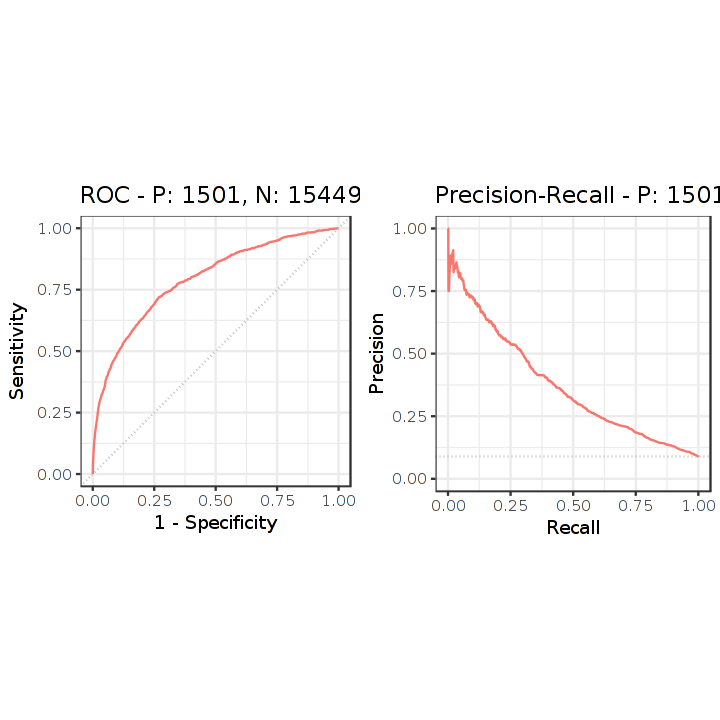

In [218]:
eval0 <- evalmod(scores = df2[[paste0('Probability_',bernoulli_endpoints)]], 
                 labels = df2[[bernoulli_endpoints]],
                 #mode = "basic"
                )
options(repr.plot.width=6, repr.plot.height=6)
autoplot(eval0)
auc(eval0)

modnames dsids curvetypes aucs     
1 m1       1     ROC        0.8409184
2 m1       1     PRC        0.4625531

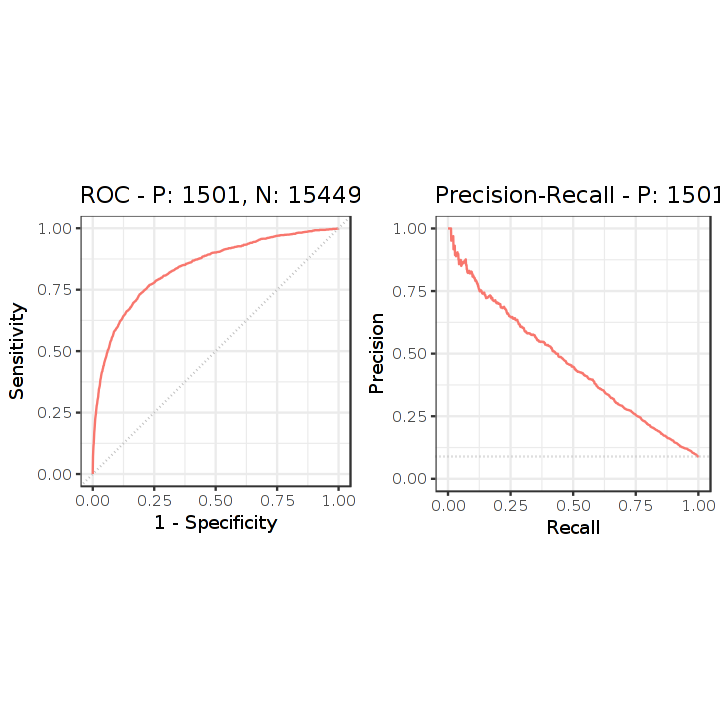

In [220]:
eval0 <- evalmod(scores = df2[['maxrisk']], 
                 labels = df2[[bernoulli_endpoints]],
                 #mode = "basic"
                )
options(repr.plot.width=6, repr.plot.height=6)
autoplot(eval0)
auc(eval0)

In [89]:
eval1 <- evalmod(scores = df[[paste0('Probability_',endpoints)]], 
                 labels = df[[endpoints]],
                 mode = "basic"
                )

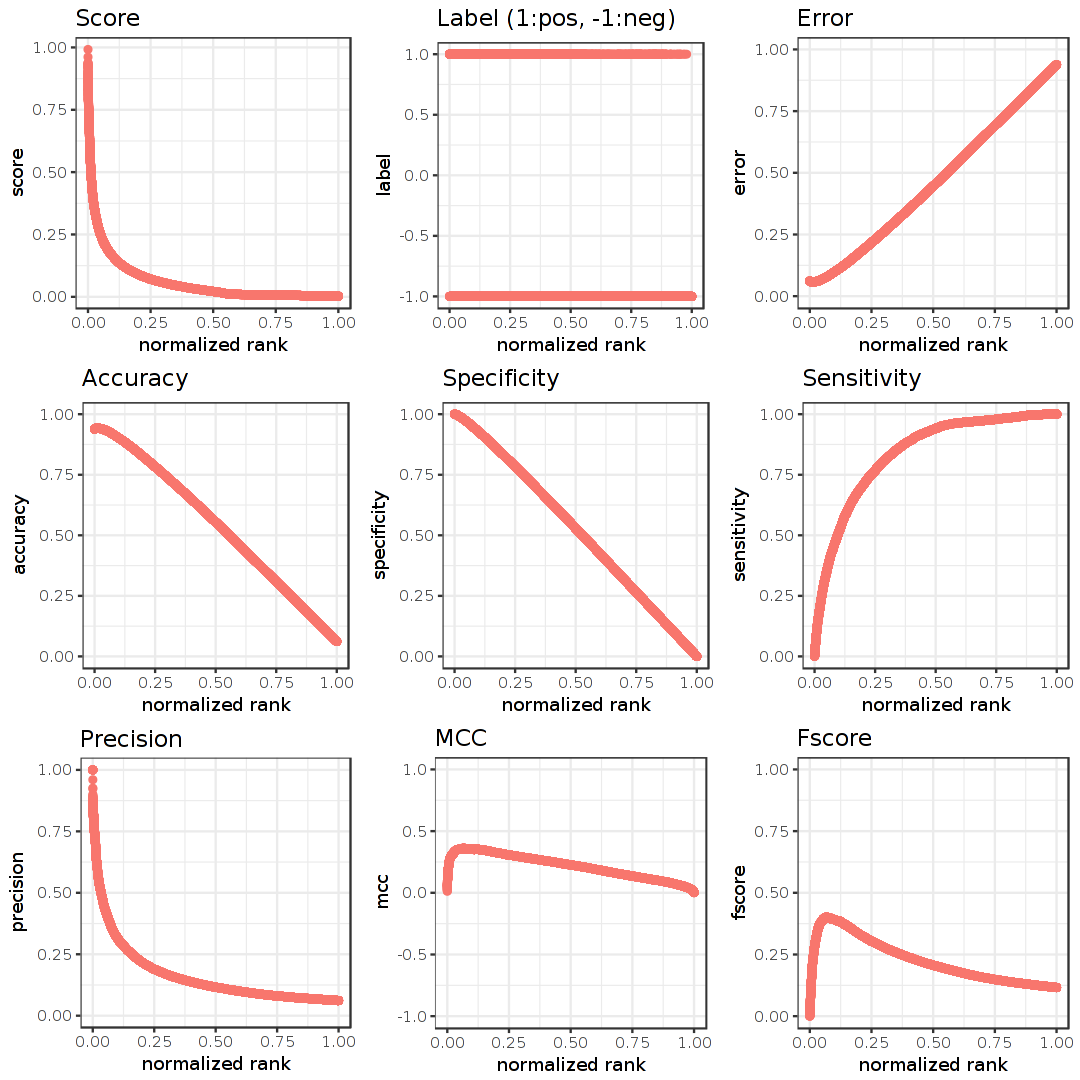

In [97]:
options(repr.plot.width=9, repr.plot.height=9)
autoplot(eval1)

In [79]:
risk276 = fread("../../dataframe/r36m/membr_risk_FCT276.csv",colClasses=c(INDIV_ENTERPRISE_ID="character"),)

In [80]:
str(risk276)

Classes ‘data.table’ and 'data.frame':	6691728 obs. of  3 variables:
 $ INDIV_ENTERPRISE_ID: chr  "3859" "4807" "831" "6828" ...
 $ RSLT_DT            : chr  "2018-06-26" "2018-06-26" "2018-06-26" "2018-06-26" ...
 $ RISK_SCORE_NUM     : num  0.0164 0.0514 0.0251 0.0408 0.02 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [81]:
substr("2018-01-01",1,4)

[1] "2018"

In [83]:
risk276$RSLT_YR = substr(risk276$RSLT_DT,1,4)

In [85]:
head(risk276,10)

INDIV_ENTERPRISE_ID RSLT_DT    RISK_SCORE_NUM RSLT_YR
1  3859                2018-06-26 0.016355       2018   
2  4807                2018-06-26 0.051446       2018   
3  831                 2018-06-26 0.025058       2018   
4  6828                2018-06-26 0.040783       2018   
5  252                 2018-06-26 0.019977       2018   
6  553                 2017-12-26 0.012772       2017   
7  263                 2018-06-26 0.032112       2018   
8  3933                2018-06-26 0.061671       2018   
9  4942                2018-06-26 0.045434       2018   
10 2074                2018-06-26 0.014366       2018

In [104]:
risk276[, meanscore:= lapply(.SD, mean), by=c('INDIV_ENTERPRISE_ID','RSLT_YR'), .SDcols = 'RISK_SCORE_NUM']

In [114]:
risk276[, countscore:= lapply(.SD, length), by=c('INDIV_ENTERPRISE_ID','RSLT_YR'), .SDcols = 'RISK_SCORE_NUM']

In [115]:
head(risk276)

INDIV_ENTERPRISE_ID RSLT_DT    RISK_SCORE_NUM RSLT_YR meanscore countscore
1 3859                2018-06-26 0.016355       2018    0.016355  1         
2 4807                2018-06-26 0.051446       2018    0.051446  1         
3 831                 2018-06-26 0.025058       2018    0.025058  1         
4 6828                2018-06-26 0.040783       2018    0.040783  1         
5 252                 2018-06-26 0.019977       2018    0.019977  1         
6 553                 2017-12-26 0.012772       2017    0.012772  1

In [119]:
risk2 = copy(risk276[countscore >1])

In [122]:
(0.010462+0.043804)/2

[1] 0.027133

In [121]:
risk2[order(INDIV_ENTERPRISE_ID)]

INDIV_ENTERPRISE_ID RSLT_DT    RISK_SCORE_NUM RSLT_YR meanscore
1     100312              2018-06-26 0.010462       2018    0.0271330
2     100312              2018-06-26 0.043804       2018    0.0271330
3     100667              2016-12-27 0.036095       2016    0.0280595
4     100667              2016-12-27 0.020024       2016    0.0280595
5     100752              2018-06-26 0.066020       2018    0.0746915
6     100752              2018-06-26 0.083363       2018    0.0746915
7     100850              2018-06-26 0.039650       2018    0.0447415
8     100850              2018-06-26 0.049833       2018    0.0447415
9     101408              2016-08-29 0.019043       2016    0.0168460
10    101408              2016-06-27 0.014649       2016    0.0168460
11    102363              2017-05-30 0.041202       2017    0.0379545
12    102363              2017-07-18 0.034707       2017    0.0379545
13    102983              2018-06-26 0.277905       2018    0.1453750
14    102983              2018-06-26 0.012845       2018    0.1453750
15    103025              2018-06-26 0.020024       2018    0.0183185
16    103025              2018-06-26 0.016613       2018    0.0183185
17    1034                2018-06-26 0.167783       2018    0.1785975
18    1034                2018-06-26 0.189412       2018    0.1785975
19    103765              2018-06-26 0.049544       2018    0.0362665
20    103765              2018-06-26 0.022989       2018    0.0362665
21    104291              2018-06-26 0.011942       2018    0.0167355
22    104291              2018-06-26 0.021529       2018    0.0167355
23    107124              2018-06-26 0.028440       2018    0.0650845
24    107124              2018-06-26 0.101729       2018    0.0650845
25    107160              2018-06-26 0.012314       2018    0.0436905
26    107160              2018-06-26 0.075067       2018    0.0436905
27    109604              2018-06-26 0.037681       2018    0.0388555
28    109604              2018-06-26 0.040030       2018    0.0388555
29    11647               2018-06-26 0.030408       2018    0.0904460
30    11647               2018-06-26 0.150484       2018    0.0904460
⋮     ⋮                   ⋮          ⋮              ⋮       ⋮        
19935 9977903             2018-06-26 0.107848       2018    0.0720040
19936 9977903             2018-06-26 0.036160       2018    0.0720040
19937 9982607             2018-06-26 0.053277       2018    0.0513975
19938 9982607             2018-06-26 0.049518       2018    0.0513975
19939 998383              2018-06-26 0.014103       2018    0.0271095
19940 998383              2018-06-26 0.040116       2018    0.0271095
19941 998449              2018-06-26 0.046150       2018    0.0375550
19942 998449              2018-06-26 0.028960       2018    0.0375550
19943 9987959             2018-06-26 0.379712       2018    0.2736845
19944 9987959             2018-06-26 0.167657       2018    0.2736845
19945 9988463             2018-06-26 0.049128       2018    0.0744715
19946 9988463             2018-06-26 0.099815       2018    0.0744715
19947 99913               2018-06-26 0.007262       2018    0.0136430
19948 99913               2018-06-26 0.020024       2018    0.0136430
19949 999281              2018-06-26 0.015145       2018    0.0198880
19950 999281              2018-06-26 0.024631       2018    0.0198880
19951 99933               2018-06-26 0.123055       2018    0.1845075
19952 99933               2018-06-26 0.245960       2018    0.1845075
19953 9994032             2018-06-26 0.012286       2018    0.0141600
19954 9994032             2018-05-15 0.016034       2018    0.0141600
19955 999449              2018-02-05 0.022307       2018    0.0341260
19956 999449              2018-06-26 0.045945       2018    0.0341260
19957 9995591             2015-12-28 0.021529       2015    0.0371145
19958 9995591             2015-12-28 0.052700       2015    0.0371145
19959 9996592             2018-06-26 0.012808       2018    0.0586500
19960 9996592   

In [123]:
risk276[, maxrisk:= lapply(.SD, max), by=c('INDIV_ENTERPRISE_ID','RSLT_YR'), .SDcols = 'RISK_SCORE_NUM']

In [124]:
head(risk276)

INDIV_ENTERPRISE_ID RSLT_DT    RISK_SCORE_NUM RSLT_YR meanscore countscore
1 3859                2018-06-26 0.016355       2018    0.016355  1         
2 4807                2018-06-26 0.051446       2018    0.051446  1         
3 831                 2018-06-26 0.025058       2018    0.025058  1         
4 6828                2018-06-26 0.040783       2018    0.040783  1         
5 252                 2018-06-26 0.019977       2018    0.019977  1         
6 553                 2017-12-26 0.012772       2017    0.012772  1         
  maxrisk 
1 0.016355
2 0.051446
3 0.025058
4 0.040783
5 0.019977
6 0.012772

In [125]:
risk276[INDIV_ENTERPRISE_ID=='100312']

INDIV_ENTERPRISE_ID RSLT_DT    RISK_SCORE_NUM RSLT_YR meanscore countscore
1 100312              2018-06-26 0.010462       2018    0.027133  2         
2 100312              2018-06-26 0.043804       2018    0.027133  2         
  maxrisk 
1 0.043804
2 0.043804

In [131]:
risk3 = unique(risk276[,c('INDIV_ENTERPRISE_ID','RSLT_YR','maxrisk')], by = c('INDIV_ENTERPRISE_ID','RSLT_YR'))

In [133]:
dim(risk276)
dim(risk3)

[1] 6691728       7

[1] 6681734       3

In [137]:
length(unique(risk3$INDIV_ENTERPRISE_ID))

[1] 6668614

In [134]:
head(risk3)

INDIV_ENTERPRISE_ID RSLT_YR maxrisk 
1 3859                2018    0.016355
2 4807                2018    0.051446
3 831                 2018    0.025058
4 6828                2018    0.040783
5 252                 2018    0.019977
6 553                 2017    0.012772

In [135]:
getwd()

[1] "/gnshealthcare/shared/nli/models/M3"

In [136]:
fwrite(risk3,"../maxrisk_member_year.csv")

# DanC AUC distribution

In [2]:
#options(java.parameters="-DSIMULATION_THREAD_COUNT = 512")
options(java.mem = 64 * 1024)
library(REFSfs)
library(pROC)

Loading required package: foreach
Loading required package: iterators
Loading required package: codetools
Loading required package: reshape2
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:reshape2’:

    dcast, melt

Loading required package: ggplot2
Warning message:
“replacing previous import ‘reshape2::melt’ by ‘data.table::melt’ when loading ‘REFSfs’”Warning message:
“replacing previous import ‘reshape2::dcast’ by ‘data.table::dcast’ when loading ‘REFSfs’”Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [3]:
setwd("/gnshealthcare/shared/nli/models/M3")

In [4]:
csv = "B_V3sample100k_2016input2017output_full.csv"

df <- fread(csv, data.table = F)
dim(df)

ens <- fsReadModel('./qjob.100Ksample_ctd2/ensemble.txt.proto')

sampleSize=10
chunksize=1000

#bernoulli_endpoints <- c('death','hospice','case')
bernoulli_endpoints <- c('high_medcost2017')

#endpoints <- c(bernoulli_endpoints,continuous_endpoints)
endpoints <- bernoulli_endpoints

simulation <- fsSimulateOverwrite(ens, outputs = endpoints, sampleSize = sampleSize,
                                reportMeans = F, baselineData = csv,seed = 12345,
                                chunkDataByRows=chunksize)

str(simulation)

[1] 100000    579

List of 3
 $ experiment: chr "Experiment"
 $ output    : chr "high_medcost2017"
 $ result    :List of 1
  ..$ :'data.frame':	128000000 obs. of  5 variables:
  .. ..$ condition   : Factor w/ 1 level "Default Condition": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ fixedDataRow: int [1:128000000] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ network     : int [1:128000000] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ output      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ pmf         :'data.frame':	128000000 obs. of  2 variables:
  .. .. ..$ 0: num [1:128000000] 0.992 0.991 0.991 0.991 0.992 ...
  .. .. ..$ 1: num [1:128000000] 0.00803 0.00881 0.00929 0.00857 0.00813 ...


In [5]:
simulation = simulation$result[[1]]

str(simulation)

'data.frame':	128000000 obs. of  5 variables:
 $ condition   : Factor w/ 1 level "Default Condition": 1 1 1 1 1 1 1 1 1 1 ...
 $ fixedDataRow: int  1 1 1 1 1 1 1 1 1 1 ...
 $ network     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ output      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ pmf         :'data.frame':	128000000 obs. of  2 variables:
  ..$ 0: num  0.992 0.991 0.991 0.991 0.992 ...
  ..$ 1: num  0.00803 0.00881 0.00929 0.00857 0.00813 ...


In [6]:
nnw = 128
nid = dim(df)[1]

####################################################
sampleSize_ind           = data.frame(matrix(ncol = 1, nrow = sampleSize))
sampleSize_ind$sample    =  c(1:sampleSize)
sampleSize_ind           = rbindlist(rep(list(sampleSize_ind),nnw*nid)) #16 networks, 500 patients
sampleSize_ind[,1]       = NULL
simulation               = cbind(simulation, sampleSize_ind)
pmf1               = simulation$pmf$"1"
pmf0               = simulation$pmf$"0"
simulation$pmf     = NULL
simulation$pmf1    = pmf1
simulation$pmf0    = pmf0


In [7]:
str(simulation)

'data.frame':	128000000 obs. of  7 variables:
 $ condition   : Factor w/ 1 level "Default Condition": 1 1 1 1 1 1 1 1 1 1 ...
 $ fixedDataRow: int  1 1 1 1 1 1 1 1 1 1 ...
 $ network     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ output      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ sample      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ pmf1        : num  0.00803 0.00881 0.00929 0.00857 0.00813 ...
 $ pmf0        : num  0.992 0.991 0.991 0.991 0.992 ...


In [ ]:
#slow, need parallel

In [11]:
auc_posterior = c()
for(i in 1:min(nnw,10)){
    for(j in 1:min(sampleSize,2)){
        auc_posterior = c(auc_posterior, 
                          auc(df[[endpoints]],simulation[simulation$network==i & simulation$sample==j,]$pmf1)
                         )
    }
}

In [12]:
str(auc_posterior)

 num [1:20] 0.859 0.859 0.859 0.859 0.86 ...


In [19]:
fwrite(data.frame(auc_posterior), file="auc_onB_posterior.csv", quote = F, na = 'NA')

In [22]:
print(paste0("nnw = ", nnw))

[1] "nnw = 128"


In [123]:
auc_posterior <- fread("auc_posterior_outofsample.csv")

In [126]:
str(auc_posterior)

Classes ‘data.table’ and 'data.frame':	1280 obs. of  1 variable:
 $ auc_posterior: num  0.859 0.859 0.859 0.859 0.859 ...
 - attr(*, ".internal.selfref")=<externalptr> 


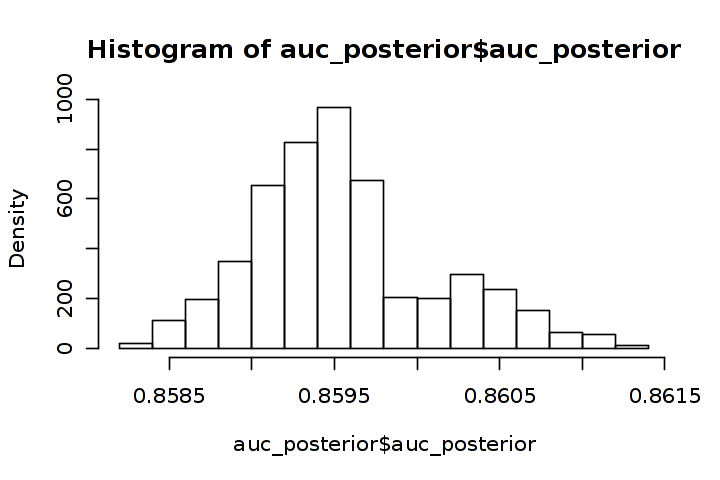

In [129]:
hist(auc_posterior$auc_posterior,freq = F)

## parallel @ Yang

In [16]:
library(data.table)
library(dplyr)
#library(parallel)
#library(doSNOW)
library(doMC)
#library(doParallel)

In [11]:
nnw = 128
sampleSize = 30

set.seed(123)
X <- 10 * runif(10000)
Y <- 10 * runif(10000)

df <- data.table(id = 1:10000)
df$endpoints <-  rnorm(10000) + rnorm(1) * X + rnorm(1) * Y
df[, endpoints_P :=  exp(endpoints) / ( 1 + exp(endpoints))]
df[, endpoints_binary_flag := endpoints_P >= 0.2 ]
#> df$endpoints_binary_flag %>% table
#.
#FALSE  TRUE
# 9662   338

In [12]:
df$endpoints_binary_flag %>% table

.
FALSE  TRUE 
 9276   724 

In [13]:
detectCores()

[1] 32

In [14]:
cl <- makeCluster(detectCores() - 2)
registerDoParallel(cl)

In [24]:
registerDoMC(detectCores() - 2)

In [25]:
simulation_pmf = runif(n = 10000, min = 0, max = 1)

#registerDoMC(detectCores() - 3)
#: or use Rmpi backend
#cl <- makeCluster(detectCores() - 3, type="MPI")
#registerDoSNOW(cl)



result_Combine <- foreach (i = 1: nnw, .combine = c) %:%
foreach (j = 1: sampleSize, .combine = c) %dopar% {
 auc_posterior = pROC::auc( df[["endpoints_binary_flag"]] , simulation_pmf ,  algorithm = 2 )[1]
 #: algorithm =2 will achieve O(n) computation time, faster than default value 1.
 # ref: https://stats.stackexchange.com/questions/269552/difference-between-proc-and-rocr-in-compute-time-and-accuracy
}

stopifnot(length(result_Combine) == nnw * sampleSize)

#: if use Rmpi backend, need to close
#stopCluster(cl)

In [28]:
summary(result_Combine)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5125  0.5125  0.5125  0.5125  0.5125  0.5125 

In [29]:
stopCluster(cl)

# edges

In [24]:
getwd()

[1] "/gnshealthcare/shared/nli/models/M4/qjob.m4-1"

In [19]:
ens <- fsReadModel('./qjob.100Ksample_ctd2/ensemble.txt.proto')

In [167]:
ens <- fsReadModel('./qjob.highmedcost2016/ensemble.txt.proto')

In [25]:
ens <- fsReadModel('ensemble.txt.proto')

In [168]:
#fwrite(fsEdgeFrequencies(ens),"./qjob.highmedcost2016/M3.4hi2hi_edge_freq.csv")

In [26]:
edges <- fsEdgeFrequencies(ens)

In [27]:
terms <- fsTermFrequencies(ens, freqThreshold = 0)

In [28]:
str(edges)

'data.frame':	188 obs. of  3 variables:
 $ input : Factor w/ 152 levels "DIAG_CCS_10_R12M",..: 55 62 63 87 130 136 149 39 43 51 ...
 $ output: Factor w/ 2 levels "high_medcost_F12M",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ freq  : num  1 1 1 1 1 1 1 1 1 1 ...


In [29]:
str(terms)

'data.frame':	582 obs. of  3 variables:
 $ input : Factor w/ 512 levels "DIAG_CCS_10_R12M",..: 151 167 199 204 331 428 438 484 509 99 ...
 $ output: Factor w/ 2 levels "high_medcost_F12M",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ freq  : num  1 1 1 1 1 1 1 1 1 1 ...


In [46]:
length(unique(edges$input[edges$output=='high_medcost_F12M']))

[1] 84

In [47]:
length(unique(edges$input[edges$output=='log_medcost_F12M']))

[1] 104

In [49]:
length(unique(terms$input[terms$output=='high_medcost_F12M']))

[1] 163

In [50]:
length(unique(terms$input[terms$output=='log_medcost_F12M']))

[1] 419

In [48]:
head(edges,60)

input                         output            freq     
1  high_medcost_R12M             high_medcost_F12M 1.0000000
2  log_medcost_R12M              high_medcost_F12M 1.0000000
3  log_medcost_R6M               high_medcost_F12M 1.0000000
4  MEMBR_AGE                     high_medcost_F12M 1.0000000
5  OPCount_R12M                  high_medcost_F12M 1.0000000
6  RxElig_R12M                   high_medcost_F12M 1.0000000
7  SVC_PROC_CCS_232_R12M         high_medcost_F12M 1.0000000
8  GENDER_CD_M                   log_medcost_F12M  1.0000000
9  GPI4_2810_R12M                log_medcost_F12M  1.0000000
10 GPI4_5816_R12M                log_medcost_F12M  1.0000000
11 high_medcost_R12M             log_medcost_F12M  1.0000000
12 log_medcost_R12M              log_medcost_F12M  1.0000000
13 log_medcost_R6M               log_medcost_F12M  1.0000000
14 log_rxcost_R12M               log_medcost_F12M  1.0000000
15 OPCount_R12M                  log_medcost_F12M  1.0000000
16 PLACE_OF_SVC_CD_11_R12M       log_medcost_F12M  1.0000000
17 PLACE_OF_SVC_CD_21_R12M       log_medcost_F12M  1.0000000
18 PLACE_OF_SVC_CD_23_R12M       log_medcost_F12M  1.0000000
19 RxElig_R12M                   log_medcost_F12M  1.0000000
20 SVC_PROC_CCS_232_R12M         log_medcost_F12M  1.0000000
21 GPI4_7260_R12M                high_medcost_F12M 0.9921875
22 PLACE_OF_SVC_CD_99_R12M       log_medcost_F12M  0.9921875
23 OP_PS_OG_R12M                 log_medcost_F12M  0.9296875
24 DIAG_CCS_126_R12M             log_medcost_F12M  0.9218750
25 DIAG_Charlson_cpd_R12M        log_medcost_F12M  0.8750000
26 SVC_PROC_CCS_227_R12M         log_medcost_F12M  0.8750000
27 PLACE_OF_SVC_CD_21_R12M       high_medcost_F12M 0.8671875
28 SVC_PROC_CCS_224_R12M         high_medcost_F12M 0.8671875
29 DIAG_CCS_651_R12M             high_medcost_F12M 0.8437500
30 log_rxcost_R12M               high_medcost_F12M 0.7968750
31 SVC_PROC_CCS_212_R12M         log_medcost_F12M  0.7578125
32 DIAG_CCS_171_R12M             high_medcost_F12M 0.7500000
33 DIAG_CCS_203_R12M             log_medcost_F12M  0.7421875
34 DIAG_Charlson_malignancy_R12M log_medcost_F12M  0.6796875
35 OP_PS_PD_R12M                 log_medcost_F12M  0.6796875
36 MEMBR_AGE                     log_medcost_F12M  0.6718750
37 DIAG_CCS_138_R12M             log_medcost_F12M  0.6640625
38 OP_CCS_98_R12M                log_medcost_F12M  0.6484375
39 OP_PS_OP_R12M                 log_medcost_F12M  0.6015625
40 OP_CCS_203_R12M               high_medcost_F12M 0.5937500
41 DIAG_CCS_196_R12M             log_medcost_F12M  0.5937500
42 GPI4_0120_R12M                log_medcost_F12M  0.5937500
43 OP_CCS_10_R12M                log_medcost_F12M  0.5234375
44 DIAG_CCS_196_R12M             high_medcost_F12M 0.5156250
45 DIAG_Charlson_cpd_R12M        high_medcost_F12M 0.5000000
46 OP_CCS_196_R12M               high_medcost_F12M 0.4843750
47 log_rxcost_R6M                log_medcost_F12M  0.4687500
48 OP_CCS_53_R12M                log_medcost_F12M  0.4609375
49 GPI4_6020_R12M                log_medcost_F12M  0.4453125
50 DIAG_CCS_53_R12M              log_medcost_F12M  0.4218750
51 DIAG_CCS_203_R12M             high_medcost_F12M 0.4062500
52 OP_PS_PD_R12M                 high_medcost_F12M 0.4062500
53 OP_CCS_196_R12M               log_medcost_F12M  0.4062500
54 DIAG_CCS_10_R12M              log_medcost_F12M  0.3593750
55 DIAG_CCS_98_R12M              log_medcost_F12M  0.3515625
56 OP_CCS_164_R12M               log_medcost_F12M  0.3515625
57 LOINC2_LP31399_6_R12M         log_medcost_F12M  0.3437500
58 DIAG_CCS_183_R12M             log_medcost_F12M  0.3125000
59 SVC_PROC_CCS_220_R12M         log_medcost_F12M  0.3046875
60 GPI4_4927_R12M                high_medcost_F12M 0.2890625

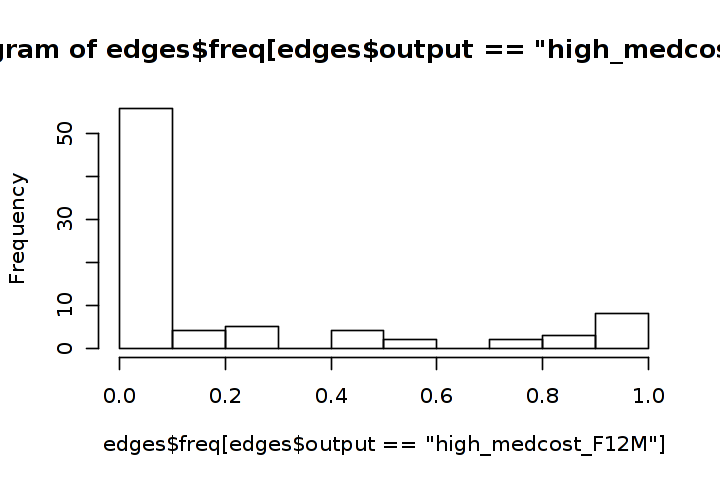

In [36]:
hist(edges$freq[edges$output=='high_medcost_F12M'])

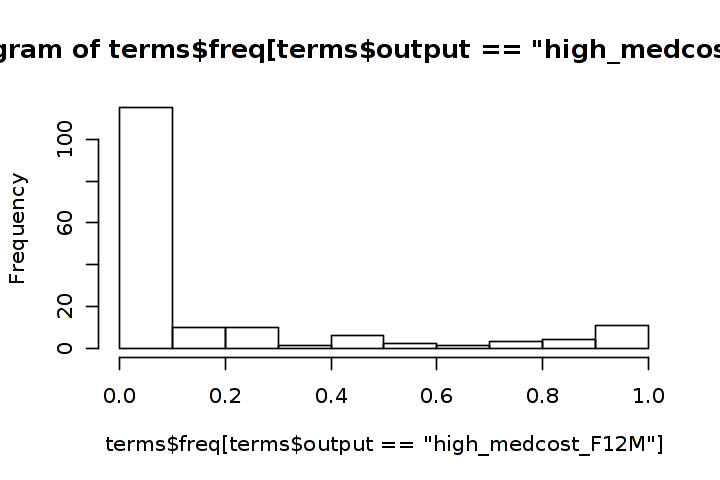

In [35]:
hist(terms$freq[terms$output=='high_medcost_F12M'])

In [200]:
edges$input[grepl("DIAG",edges$input) & edges$output=='high_medcost2017' & edges$freq > 0.9]

[1] DIAG_CCS_105 DIAG_CCS_108 DIAG_CCS_126 DIAG_CCS_127 DIAG_CCS_128
 [6] DIAG_CCS_133 DIAG_CCS_138 DIAG_CCS_144 DIAG_CCS_15  DIAG_CCS_155
[11] DIAG_CCS_158 DIAG_CCS_171 DIAG_CCS_174 DIAG_CCS_181 DIAG_CCS_196
[16] DIAG_CCS_199 DIAG_CCS_202 DIAG_CCS_203 DIAG_CCS_205 DIAG_CCS_210
[21] DIAG_CCS_211 DIAG_CCS_217 DIAG_CCS_218 DIAG_CCS_24  DIAG_CCS_257
[26] DIAG_CCS_40  DIAG_CCS_42  DIAG_CCS_50  DIAG_CCS_51  DIAG_CCS_57 
[31] DIAG_CCS_59  DIAG_CCS_60  DIAG_CCS_651 DIAG_CCS_654 DIAG_CCS_657
[36] DIAG_CCS_661 DIAG_CCS_80  DIAG_CCS_81  DIAG_CCS_82  DIAG_CCS_83 
[41] DIAG_CCS_84  DIAG_CCS_87  DIAG_CCS_91  DIAG_CCS_142 DIAG_CCS_56 
[46] DIAG_CCS_200 DIAG_CCS_21  DIAG_CCS_45  DIAG_CCS_250 DIAG_CCS_61 
[51] DIAG_CCS_159 DIAG_CCS_251 DIAG_CCS_39 
201 Levels: DIAG_CCS_10 DIAG_CCS_101 DIAG_CCS_103 DIAG_CCS_104 ... SVC_PROC_CCS_91

In [175]:
display_html(paste(capture.output(print(xtable(fsEdgeFrequencies(ens),digits=4), type = 'html')), collapse="", sep=""))

<!-- html table generated in R 3.3.2 by xtable 1.8-2 package --><!-- --> input output freq 1 DIAG_CCS_196 high_medcost2017 1.0000 2 DIAG_CCS_205 high_medcost2017 1.0000 3 DIAG_CCS_42 high_medcost2017 1.0000 4 DIAG_CCS_50 high_medcost2017 1.0000 5 log_medcost_2016 high_medcost2017 1.0000 6 MEMBR_AGE high_medcost2017 1.0000 7 PLACE_OF_SVC_CD_21 high_medcost2017 1.0000 8 SVC_PROC_CCS_218 high_medcost2017 1.0000 9 SVC_PROC_CCS_76 high_medcost2017 1.0000 10 DIAG_CCS_126 high_medcost2017 0.9844 11 DIAG_CCS_259 high_medcost2017 0.9844 12 DIAG_CCS_171 high_medcost2017 0.9766 13 DIAG_CCS_217 high_medcost2017 0.9766 14 DIAG_CCS_203 high_medcost2017 0.9688 15 DIAG_CCS_82 high_medcost2017 0.9688 16 SVC_PROC_CCS_198 high_medcost2017 0.9375 17 DIAG_CCS_144 high_medcost2017 0.8359 18 SVC_PROC_CCS_206 high_medcost2017 0.8359 19 DIAG_CCS_256 high_medcost2017 0.7578 20 DIAG_CCS_211 high_medcost2017 0.7109 21 DIAG_CCS_181 high_medcost2017 0.6953 22 DIAG_CCS_158 high_medcost2017 0.5781 23 SVC_PROC_CCS_91 high_medcost2017 0.5625 24 DIAG_CCS_128 high_medcost2017 0.5547 25 DIAG_CCS_98 high_medcost2017 0.4844 26 DIAG_CCS_155 high_medcost2017 0.4609 27 DIAG_CCS_654 high_medcost2017 0.4531 28 DIAG_CCS_651 high_medcost2017 0.4453 29 DIAG_CCS_133 high_medcost2017 0.4219 30 DIAG_CCS_51 high_medcost2017 0.3672 31 DIAG_CCS_174 high_medcost2017 0.2891 32 DIAG_CCS_204 high_medcost2017 0.2500 33 PLACE_OF_SVC_CD_11 high_medcost2017 0.2109 34 DIAG_CCS_218 high_medcost2017 0.1875 35 SVC_PROC_CCS_224 high_medcost2017 0.1641 36 DIAG_CCS_108 high_medcost2017 0.1484 37 DIAG_CCS_138 high_medcost2017 0.1328 38 DIAG_CCS_202 high_medcost2017 0.1250 39 DIAG_CCS_83 high_medcost2017 0.1250 40 DIAG_CCS_657 high_medcost2017 0.1172 41 SVC_PROC_CCS_160 high_medcost2017 0.1094 42 DIAG_CCS_662 high_medcost2017 0.0938 43 DIAG_CCS_81 high_medcost2017 0.0938 44 DIAG_CCS_57 high_medcost2017 0.0859 45 DIAG_CCS_15 high_medcost2017 0.0703 46 DIAG_CCS_84 high_medcost2017 0.0391 47 SVC_PROC_CCS_217 high_medcost2017 0.0391 48 DIAG_CCS_114 high_medcost2017 0.0312 49 DIAG_CCS_161 high_medcost2017 0.0312 50 SVC_PROC_CCS_124 high_medcost2017 0.0312 51 DIAG_CCS_257 high_medcost2017 0.0234 52 PLACE_OF_SVC_CD_99 high_medcost2017 0.0234 53 SVC_PROC_CCS_161 high_medcost2017 0.0234 54 SVC_PROC_CCS_207 high_medcost2017 0.0234 55 DIAG_CCS_151 high_medcost2017 0.0156 56 DIAG_CCS_210 high_medcost2017 0.0156 57 DIAG_CCS_38 high_medcost2017 0.0156 58 DIAG_CCS_60 high_medcost2017 0.0156 59 DIAG_CCS_655 high_medcost2017 0.0156 60 DIAG_CCS_97 high_medcost2017 0.0156 61 PLACE_OF_SVC_CD_12 high_medcost2017 0.0156 62 SVC_PROC_CCS_149 high_medcost2017 0.0156 63 SVC_PROC_CCS_155 high_medcost2017 0.0156 64 SVC_PROC_CCS_219 high_medcost2017 0.0156 65 SVC_PROC_CCS_233 high_medcost2017 0.0156 66 DIAG_CCS_100 high_medcost2017 0.0078 67 DIAG_CCS_105 high_medcost2017 0.0078 68 DIAG_CCS_109 high_medcost2017 0.0078 69 DIAG_CCS_140 high_medcost2017 0.0078 70 DIAG_CCS_185 high_medcost2017 0.0078 71 DIAG_CCS_199 high_medcost2017 0.0078 72 DIAG_CCS_21 high_medcost2017 0.0078 73 DIAG_CCS_215 high_medcost2017 0.0078 74 DIAG_CCS_249 high_medcost2017 0.0078 75 DIAG_CCS_251 high_medcost2017 0.0078 76 DIAG_CCS_44 high_medcost2017 0.0078 77 DIAG_CCS_58 high_medcost2017 0.0078 78 DIAG_CCS_650 high_medcost2017 0.0078 79 DIAG_CCS_656 high_medcost2017 0.0078 80 DIAG_CCS_670 high_medcost2017 0.0078 81 DIAG_CCS_88 high_medcost2017 0.0078 82 DIAG_CCS_89 high_medcost2017 0.0078 83 DIAG_CCS_99 high_medcost2017 0.0078 84 PLACE_OF_SVC_CD_24 high_medcost2017 0.0078 85 SVC_PROC_CCS_108 high_medcost2017 0.0078 86 SVC_PROC_CCS_142 high_medcost2017 0.0078 87 SVC_PROC_CCS_162 high_medcost2017 0.0078 88 SVC_PROC_CCS_196 high_medcost2017 0.0078 89 SVC_PROC_CCS_203 high_medcost2017 0.0078 90 SVC_PROC_CCS_208 high_medcost2017 0.0078 91 SVC_PROC_CCS_68 high_medcost2017 0.0078 92 SVC_PROC_CCS_96 high_medcost2017 0.0078

In [191]:
display_html(paste(capture.output(print(xtable(terms[terms$output=='high_medcost2017',],digits=4), type = 'html')), collapse="", sep=""))

<!-- html table generated in R 3.3.2 by xtable 1.8-2 package --><!-- --> input output freq 1 DIAG_CCS_105 high_medcost2017 1.0000 2 DIAG_CCS_108 high_medcost2017 1.0000 3 DIAG_CCS_126 high_medcost2017 1.0000 4 DIAG_CCS_127 high_medcost2017 1.0000 5 DIAG_CCS_128 high_medcost2017 1.0000 6 DIAG_CCS_133 high_medcost2017 1.0000 7 DIAG_CCS_138 high_medcost2017 1.0000 8 DIAG_CCS_144 high_medcost2017 1.0000 9 DIAG_CCS_15 high_medcost2017 1.0000 10 DIAG_CCS_155 high_medcost2017 1.0000 11 DIAG_CCS_158 high_medcost2017 1.0000 12 DIAG_CCS_171 high_medcost2017 1.0000 13 DIAG_CCS_174 high_medcost2017 1.0000 14 DIAG_CCS_181 high_medcost2017 1.0000 15 DIAG_CCS_181:PLACE_OF_SVC_CD_21 high_medcost2017 1.0000 16 DIAG_CCS_196 high_medcost2017 1.0000 17 DIAG_CCS_196:PLACE_OF_SVC_CD_21 high_medcost2017 1.0000 18 DIAG_CCS_199 high_medcost2017 1.0000 19 DIAG_CCS_202 high_medcost2017 1.0000 20 DIAG_CCS_203 high_medcost2017 1.0000 21 DIAG_CCS_205 high_medcost2017 1.0000 22 DIAG_CCS_210 high_medcost2017 1.0000 23 DIAG_CCS_211 high_medcost2017 1.0000 24 DIAG_CCS_217 high_medcost2017 1.0000 25 DIAG_CCS_218 high_medcost2017 1.0000 26 DIAG_CCS_24 high_medcost2017 1.0000 27 DIAG_CCS_257 high_medcost2017 1.0000 28 DIAG_CCS_40 high_medcost2017 1.0000 29 DIAG_CCS_42 high_medcost2017 1.0000 30 DIAG_CCS_50 high_medcost2017 1.0000 31 DIAG_CCS_51 high_medcost2017 1.0000 32 DIAG_CCS_57 high_medcost2017 1.0000 33 DIAG_CCS_59 high_medcost2017 1.0000 34 DIAG_CCS_60 high_medcost2017 1.0000 35 DIAG_CCS_651 high_medcost2017 1.0000 36 DIAG_CCS_654 high_medcost2017 1.0000 37 DIAG_CCS_657 high_medcost2017 1.0000 38 DIAG_CCS_661 high_medcost2017 1.0000 39 DIAG_CCS_80 high_medcost2017 1.0000 40 DIAG_CCS_81 high_medcost2017 1.0000 41 DIAG_CCS_82 high_medcost2017 1.0000 42 DIAG_CCS_83 high_medcost2017 1.0000 43 DIAG_CCS_84 high_medcost2017 1.0000 44 DIAG_CCS_87 high_medcost2017 1.0000 45 DIAG_CCS_91 high_medcost2017 1.0000 46 GENDER_CD_M high_medcost2017 1.0000 47 log_medcost_2016 high_medcost2017 1.0000 48 log_medcost_2016:DIAG_CCS_144 high_medcost2017 1.0000 49 log_medcost_2016:PLACE_OF_SVC_CD_21 high_medcost2017 1.0000 50 log_medcost_2016:PLACE_OF_SVC_CD_99 high_medcost2017 1.0000 51 MEMBR_AGE high_medcost2017 1.0000 52 MEMBR_AGE:DIAG_CCS_144 high_medcost2017 1.0000 53 MEMBR_AGE:DIAG_CCS_50 high_medcost2017 1.0000 54 MEMBR_AGE:DIAG_CCS_82 high_medcost2017 1.0000 55 MEMBR_AGE:log_medcost_2016 high_medcost2017 1.0000 56 PLACE_OF_SVC_CD_21 high_medcost2017 1.0000 57 PLACE_OF_SVC_CD_21:PLACE_OF_SVC_CD_22 high_medcost2017 1.0000 58 PLACE_OF_SVC_CD_21:PLACE_OF_SVC_CD_99 high_medcost2017 1.0000 59 PLACE_OF_SVC_CD_21:SVC_PROC_CCS_240 high_medcost2017 1.0000 60 PLACE_OF_SVC_CD_22 high_medcost2017 1.0000 61 PLACE_OF_SVC_CD_22:PLACE_OF_SVC_CD_99 high_medcost2017 1.0000 62 PLACE_OF_SVC_CD_99 high_medcost2017 1.0000 63 SVC_PROC_CCS_124 high_medcost2017 1.0000 64 SVC_PROC_CCS_149 high_medcost2017 1.0000 65 SVC_PROC_CCS_160 high_medcost2017 1.0000 66 SVC_PROC_CCS_162 high_medcost2017 1.0000 67 SVC_PROC_CCS_198 high_medcost2017 1.0000 68 SVC_PROC_CCS_211 high_medcost2017 1.0000 69 SVC_PROC_CCS_218 high_medcost2017 1.0000 70 SVC_PROC_CCS_218:SVC_PROC_CCS_240 high_medcost2017 1.0000 71 SVC_PROC_CCS_224 high_medcost2017 1.0000 72 SVC_PROC_CCS_240 high_medcost2017 1.0000 73 SVC_PROC_CCS_3 high_medcost2017 1.0000 74 SVC_PROC_CCS_48 high_medcost2017 1.0000 75 SVC_PROC_CCS_5 high_medcost2017 1.0000 76 SVC_PROC_CCS_58 high_medcost2017 1.0000 77 SVC_PROC_CCS_76 high_medcost2017 1.0000 78 SVC_PROC_CCS_84 high_medcost2017 1.0000 79 SVC_PROC_CCS_86 high_medcost2017 1.0000 80 SVC_PROC_CCS_91 high_medcost2017 1.0000 162 DIAG_CCS_142 high_medcost2017 0.9922 163 DIAG_CCS_56 high_medcost2017 0.9922 164 SVC_PROC_CCS_119 high_medcost2017 0.9922 165 SVC_PROC_CCS_30 high_medcost2017 0.9922 176 DIAG_CCS_200 high_medcost2017 0.9844 177 DIAG_CCS_21 high_medcost2017 0.9844 185 DIAG_CCS_45 high_medcost2017 0.9766 186 DIAG_CCS_45:SVC_PROC_CCS_224 high_medcost2017 0.9766 189 DIAG_CCS_158:DIAG_CCS_657 high_medcost2017 0

In [23]:
ens1 <- fsReadModel('qjob.100ksample_A_ctd2/ensemble.txt.proto')
edge1<- fsEdgeFrequencies(ens1)#,freqThreshold = 0.1)

ens2 <- fsReadModel('qjob.100Ksample_ctd2/ensemble.txt.proto')
edge2<- fsEdgeFrequencies(ens2)#,freqThreshold = 0.1)

In [24]:
#fwrite(edge1, file="qjob.100ksample_A_ctd2/edge_freq.csv", quote = F)

In [25]:
#fwrite(edge2, file="qjob.100ksample_B_ctd/edge_freq.csv", quote = F)

In [26]:
y1="high_medcost2017"
y2="high_medcost2017"

e1=edge1[edge1$output == y1,]
e2=edge2[edge2$output == y2,]
str(e1)
str(e2)

'data.frame':	92 obs. of  3 variables:
 $ input : Factor w/ 146 levels "DIAG_CCS_10",..: 33 39 56 63 69 101 102 106 143 130 ...
 $ output: Factor w/ 2 levels "high_medcost2017",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ freq  : num  1 1 1 1 1 ...
'data.frame':	92 obs. of  3 variables:
 $ input : Factor w/ 92 levels "DIAG_CCS_100",..: 21 26 39 41 63 64 67 85 90 6 ...
 $ output: Factor w/ 1 level "high_medcost2017": 1 1 1 1 1 1 1 1 1 1 ...
 $ freq  : num  1 1 1 1 1 ...


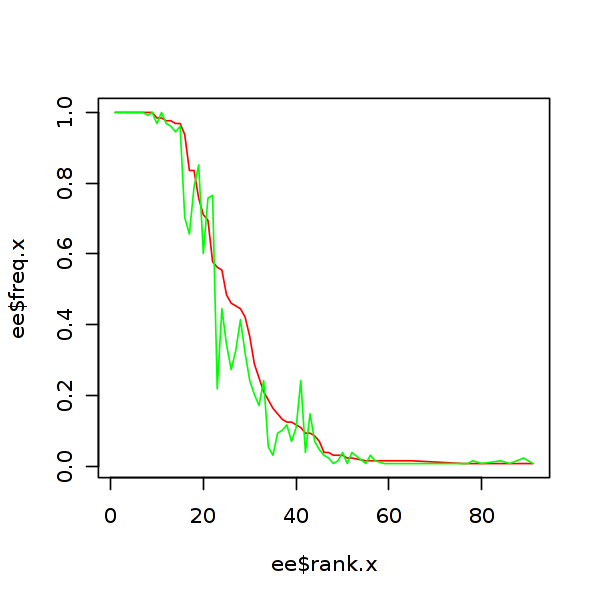

In [27]:
e1$rank=seq(1,dim(e1)[1],by=1)
e2$rank=seq(1,dim(e2)[1],by=1)

ee=merge(e2,e1,by=c("input"),sort=F)

plot(ee$rank.x,ee$freq.x,type="l",col="red")
lines(ee$rank.x,ee$freq.y,col="green")
#lines(edges$rank.x,edges$freq,col="blue")

In [97]:
length(intersect(e1$input,e2$input))

[1] 25

'data.frame':	54 obs. of  3 variables:
 $ input : Factor w/ 146 levels "DIAG_CCS_10",..: 1 9 11 16 33 35 39 42 53 54 ...
 $ output: Factor w/ 2 levels "high_medcost2017",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ freq  : num  1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	57 obs. of  3 variables:
 $ input : Factor w/ 123 levels "DIAG_CCS_10",..: 1 8 10 16 30 33 34 36 37 49 ...
 $ output: Factor w/ 2 levels "high_medcost2017",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ freq  : num  1 1 1 1 1 1 1 1 1 1 ...


[1] 46

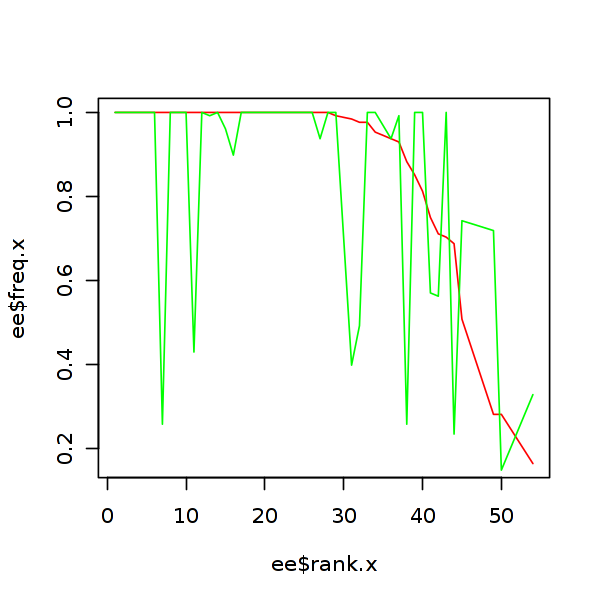

In [100]:
y1="log_medcost_2017"
y2="log_medcost_2017"

e1=edge1[edge1$output == y1,]
e2=edge2[edge2$output == y2,]
str(e1)
str(e2)

e1$rank=seq(1,dim(e1)[1],by=1)
e2$rank=seq(1,dim(e2)[1],by=1)

ee=merge(e2,e1,by=c("input"),sort=F)

plot(ee$rank.x,ee$freq.x,type="l",col="red")
lines(ee$rank.x,ee$freq.y,col="green")
#lines(edges$rank.x,edges$freq,col="blue")

length(intersect(e1$input,e2$input))

In [98]:
head(ee)

input        output.x         freq.x rank.x output.y         freq.y    rank.y
1 DIAG_CCS_126 high_medcost2017 1      1      high_medcost2017 0.9687500 11    
2 DIAG_CCS_144 high_medcost2017 1      2      high_medcost2017 0.6562500 21    
3 DIAG_CCS_181 high_medcost2017 1      3      high_medcost2017 0.7578125 19    
4 DIAG_CCS_196 high_medcost2017 1      4      high_medcost2017 1.0000000  1    
5 DIAG_CCS_203 high_medcost2017 1      5      high_medcost2017 0.9453125 15    
6 DIAG_CCS_205 high_medcost2017 1      6      high_medcost2017 1.0000000  2

# g-computation: univariate

In [131]:
#datafile = "OR_testdata.csv"
datafile = "V3_Rx_wRxCost_sample100k_2016input2017output_full_2k_A.csv"
protofile = "./qjob.100ksample_Rx_wRxCost/ensemble.txt.proto"
threshold = 0.0
endpoint = "high_medcost2017"
varpattern = "GENDER|DIAG|PROC|PLACE|GPI|high_medcost2016"
#varpattern = "DIAG|high_medcost2016"
outputfile = paste0('M3.3_OR_catinput_',endpoint,'.csv')
nsamples = 10
nnets = 128

In [132]:
#####################
df <- fread(datafile,data.table = F)
ens <- fsReadModel(protofile)
edges <- fsEdgeFrequencies(ens)

edge <- edges[(edges$output==endpoint) & (edges$freq > threshold),]

#varnames <- as.character(edge$input[!grepl("AGE|log|cost|Probability|Predicted",edge$input)])
varnames <- as.character(edge$input[grepl(varpattern,edge$input)])
df <- df[,c(as.character(unique(edges$input)),endpoint)]

print('data shape:')
print(dim(df))

[1] "data shape:"
[1] 2000  183


In [133]:
length(varnames)

[1] 116

In [134]:
varnames[100]

[1] "GPI4_4140"

In [135]:
results <- fsCausalEffectInference(df, ensemble=ens,
                                                treatment=varnames[100],
                                                treatmentValues = c(0,1),
                                                outcome=endpoint,
                                                nNets=nnets,
                                                nSamples=nsamples, seed=123
                                                )

Network1
Network2
Network3
Network4
Network5
Network6
Network7
Network8
Network9
Network10
Network11
Network12
Network13
Network14
Network15
Network16
Network17
Network18
Network19
Network20
Network21
Network22
Network23
Network24
Network25
Network26
Network27
Network28
Network29
Network30
Network31
Network32
Network33
Network34
Network35
Network36
Network37
Network38
Network39
Network40
Network41
Network42
Network43
Network44
Network45
Network46
Network47
Network48
Network49
Network50
Network51
Network52
Network53
Network54
Network55
Network56
Network57
Network58
Network59
Network60
Network61
Network62
Network63
Network64
Network65
Network66
Network67
Network68
Network69
Network70
Network71
Network72
Network73
Network74
Network75
Network76
Network77
Network78
Network79
Network80
Network81
Network82
Network83
Network84
Network85
Network86
Network87
Network88
Network89
Network90
Network91
Network92
Network93
Network94
Network95
Network96
Network97
Network98
Network99
Network100
Network1

In [136]:
str(results$getCausalEffect())

'data.frame':	1280 obs. of  4 variables:
 $ network              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sampleNum            : num  1 2 3 4 5 6 7 8 9 10 ...
 $ causalEffect         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ treatmentEffectMetric: chr  "Odds Ratio" "Odds Ratio" "Odds Ratio" "Odds Ratio" ...


In [140]:
quantile(results$getCausalEffect()$causalEffect, c(0.025, 0.5, 0.975))

2.5%   50% 97.5% 
    1     1     1

In [138]:
quantile(results$getCausalEffect()$causalEffect[results$getCausalEffect()$causalEffect!=1], c(0.025, 0.5, 0.975))

2.5%      50%    97.5% 
1.092985 1.200665 1.305487

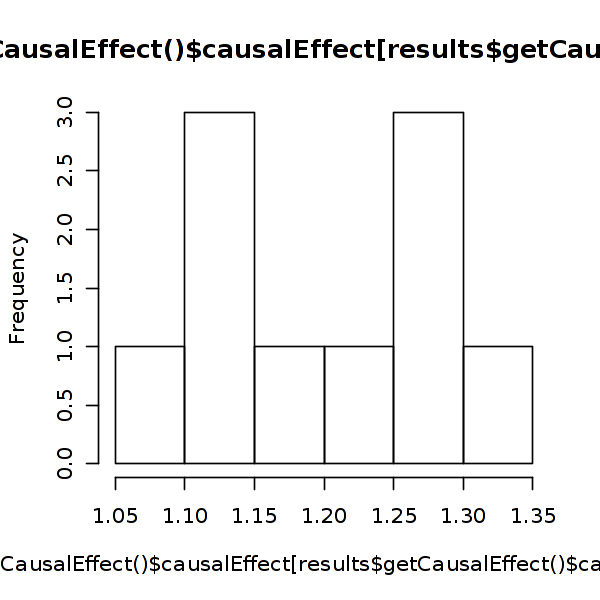

In [139]:
hist(results$getCausalEffect()$causalEffect[results$getCausalEffect()$causalEffect!=1])

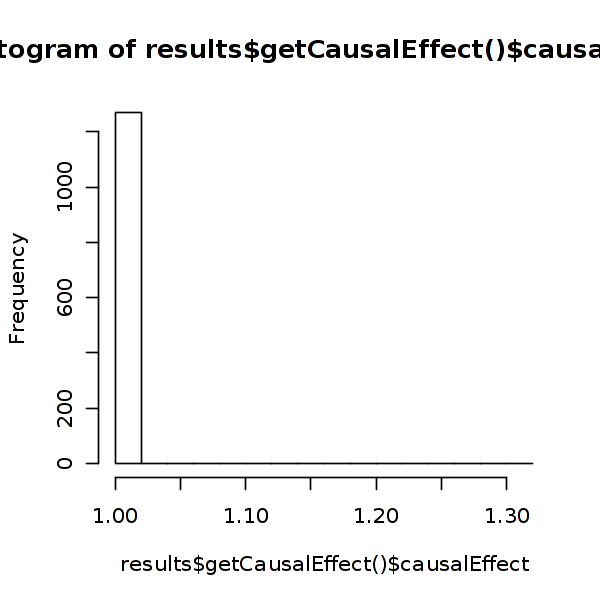

In [141]:
hist(results$getCausalEffect()$causalEffect)

In [143]:
length(results$getCausalEffect()$causalEffect)

[1] 1280

In [142]:
length(results$getCausalEffect()$causalEffect[results$getCausalEffect()$causalEffect!=1])

[1] 10

In [109]:
getEffect <- function(varname,treatmentValues){
                results <- fsCausalEffectInference(df, ensemble=ens,
                                                treatment=varname,
                                                treatmentValues = treatmentValues,
                                                outcome=endpoint,
                                                nNets=10,
                                                nSamples=nsamples, seed=123
                                                )
                OR <- quantile(results$getCausalEffect()$causalEffect, c(0.025, 0.5, 0.975))
                print('#####')
                print(varname)
                print(OR)
                return(OR)
                }

In [110]:
varnames[1]

[1] "DIAG_CCS_155"

In [112]:
getEffect(varname=varnames[1],
          #treatmentValues = quantile(df[[varname]],c(0.025,0.975)),
          treatmentValues = c(0,1)
         )

Network1
Network2
Network3
Network4
Network5
Network6
Network7
Network8
Network9
Network10
exiting loop


[1] "#####"
[1] "DIAG_CCS_155"
    2.5%      50%    97.5% 
1.129643 1.193478 1.262815 


2.5%      50%    97.5% 
1.129643 1.193478 1.262815

In [46]:
head(edges)

input        output           freq
1 DIAG_CCS_155 high_medcost2017 1   
2 DIAG_CCS_171 high_medcost2017 1   
3 DIAG_CCS_181 high_medcost2017 1   
4 DIAG_CCS_196 high_medcost2017 1   
5 DIAG_CCS_203 high_medcost2017 1   
6 DIAG_CCS_205 high_medcost2017 1

In [35]:
as.character(edges$input[2])

[1] "DIAG_CCS_171"

In [47]:
results <- fsCausalEffectInference(df, ensemble=ens,
                                    treatment='high_medcost2016',
                                    treatmentValues = c(0,1),
                                    outcome='high_medcost2017',
                                   nNets=128,nSamples=10, seed=123
                                  )

Network1


ERROR: Error in `[.data.frame`(data, , c(condition_vars)): undefined columns selected


In [24]:
OR <- quantile(results$getCausalEffect()$causalEffect, c(0.025, 0.5, 0.975))

In [37]:
names(OR)

[1] "2.5%"  "50%"   "97.5%"

In [40]:
print(OR)

 2.5%   50% 97.5% 
    1     1     1 


In [39]:
print(unname(OR))

[1] 1 1 1


In [41]:
dt = data.table(rbind(OR,OR))

In [42]:
str(dt)

Classes ‘data.table’ and 'data.frame':	2 obs. of  3 variables:
 $ 2.5% : num  1 1
 $ 50%  : num  1 1
 $ 97.5%: num  1 1
 - attr(*, ".internal.selfref")=<externalptr> 


In [1]:
quantile(c(0.1,0.2,0.3,0.4), c(0.025, 0.5, 0.975))

2.5%    50%  97.5% 
0.1075 0.2500 0.3925

In [9]:
quantile(c(0,1,0,0,0), c(0.975))

97.5% 
  0.9

# g-computation: interaction term

In [14]:
getwd()

[1] "/gnshealthcare/shared/nli/models/M3"

In [97]:
df = fread("V3_Rx_wRxCost_sample100k_2016input2017output_full_2k_A.csv",data.table = F)

In [16]:
ens <- fsReadModel("./qjob.100ksample_Rx_wRxCost/ensemble.txt.proto")

In [54]:
treatment = 'PLACE_OF_SVC_CD_21'
#driver='DIAG_CCS_196'
driver='MEMBR_AGE'
endpoint='high_medcost2017'
nnets=16
threshold=0.1
nsamples=20

In [ ]:
results <- fsEfficacyInference(data=df, 
                               ensemble=ens, 
                               treatment=treatment, 
                               treatmentValues=c(0,1),
                               driver=driver,
                               outcome=endpoint,
                               override_driverIsDiscrete=T,
                               numPartitionIntervals=2,
                               nNets=nnets,
                               nSamples=nsamples, 
                               seed=123
                              )

In [34]:
results <- fsEfficacyInference(data=df, 
                               ensemble=ens, 
                               treatment=treatment, 
                               treatmentValues=c(0,1),
                               driver=driver,
                               outcome=endpoint,
                               override_driverIsDiscrete=F,
                               numPartitionIntervals=2,
                               nNets=nnets,
                               nSamples=20, 
                               seed=123
                              )

In [35]:
str(results$getTreatmentEffect())

'data.frame':	640 obs. of  4 variables:
 $ efficacy    : num  8.568 1.253 3.582 0.964 5.047 ...
 $ driver_level: num  0 6.57 0 6.57 0 ...
 $ network     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sample      : int  1 1 2 2 3 3 4 4 5 5 ...


In [36]:
resultdf <- results$getTreatmentEffect()

In [144]:
str(resultdf)

'data.frame':	640 obs. of  4 variables:
 $ efficacy    : num  8.568 1.253 3.582 0.964 5.047 ...
 $ driver_level: num  0 6.57 0 6.57 0 ...
 $ network     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sample      : int  1 1 2 2 3 3 4 4 5 5 ...


In [39]:
unique(resultdf$driver_level)

[1] 0.0000 6.5702

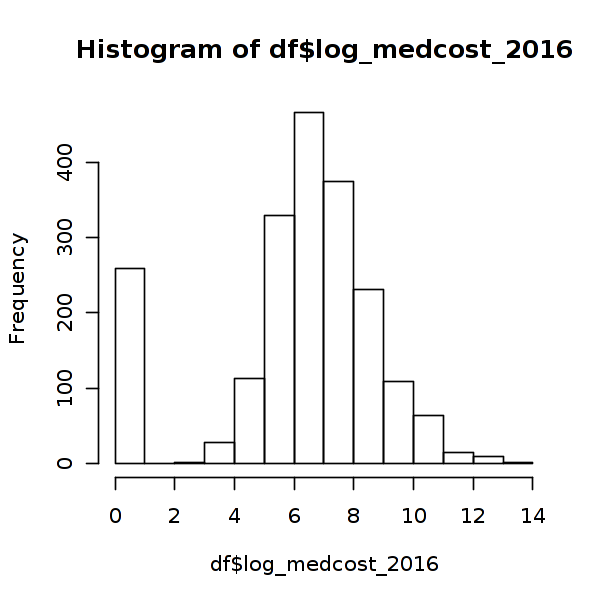

In [41]:
hist(df$log_medcost_2016)

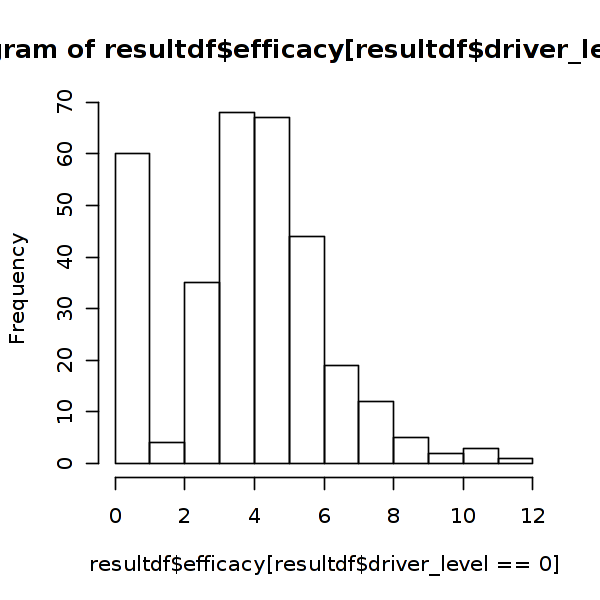

In [44]:
hist(resultdf$efficacy[resultdf$driver_level==0])

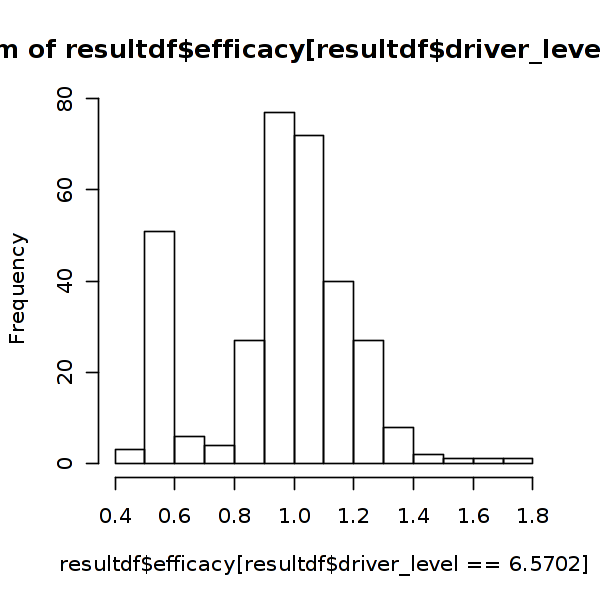

In [45]:
 
hist(resultdf$efficacy[resultdf$driver_level==6.5702])

In [145]:
str(results$getTreatmentEffect()$efficacy[results$getTreatmentEffect()$driver_level==0])

ERROR: Error in str(results$getTreatmentEffect()$efficacy[results$getTreatmentEffect()$driver_level == : attempt to apply non-function


In [70]:
quantile(results$getTreatmentEffect()$efficacy[results$getTreatmentEffect()$driver_level==0], c(0.025, 0.5, 0.975))
      

2.5%       50%     97.5% 
0.5157862 3.8752559 8.3953758

In [150]:
length(resultdf$efficacy[resultdf$driver_level==0])
length(resultdf$efficacy[resultdf$driver_level==0 & resultdf$efficacy<1])

[1] 320

[1] 60

In [147]:
#resultdf <- results$getTreatmentEffect()

quantile(resultdf$efficacy[resultdf$driver_level==0 & resultdf$efficacy!=1], c(0.025, 0.5, 0.975))
 
quantile(resultdf$efficacy[resultdf$driver_level==6.5702], c(0.025, 0.5, 0.975))

2.5%       50%     97.5% 
0.5157862 3.8752559 8.3953758

2.5%       50%     97.5% 
0.5140504 0.9924667 1.3603308

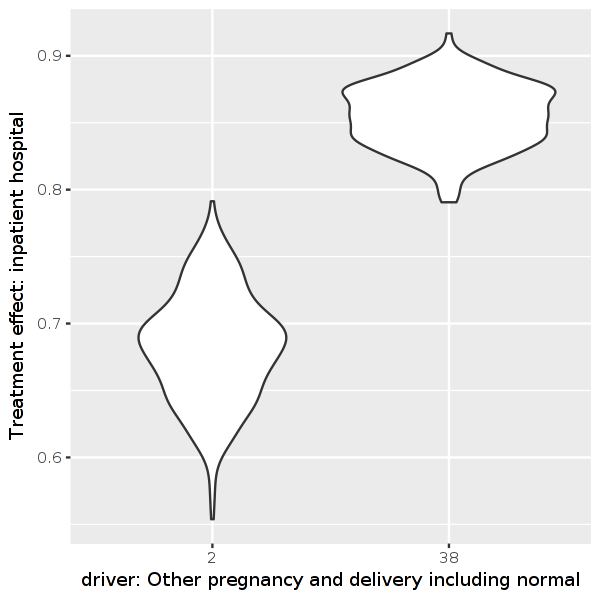

In [32]:
ggplot(resultdf, aes(factor(driver_level), efficacy))+ 
geom_violin()+
ylab("Treatment effect: inpatient hospital") + xlab("driver: Other pregnancy and delivery including normal") 

In [65]:
terms <- fsTermFrequencies(ens)

In [67]:
str(terms)
head(terms)

'data.frame':	387 obs. of  3 variables:
 $ input : Factor w/ 324 levels "DIAG_CCS_10",..: 21 29 36 45 50 56 60 120 156 199 ...
 $ output: Factor w/ 2 levels "high_medcost2017",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ freq  : num  1 1 1 1 1 1 1 1 1 1 ...


input                           output           freq
1 DIAG_CCS_155                    high_medcost2017 1   
2 DIAG_CCS_171                    high_medcost2017 1   
3 DIAG_CCS_181                    high_medcost2017 1   
4 DIAG_CCS_196                    high_medcost2017 1   
5 DIAG_CCS_196:PLACE_OF_SVC_CD_21 high_medcost2017 1   
6 DIAG_CCS_203                    high_medcost2017 1

In [71]:
term <- data.table(terms[(terms$output==endpoint) & (terms$freq > threshold),])

In [72]:
head(term)

input                           output           freq
1 DIAG_CCS_155                    high_medcost2017 1   
2 DIAG_CCS_171                    high_medcost2017 1   
3 DIAG_CCS_181                    high_medcost2017 1   
4 DIAG_CCS_196                    high_medcost2017 1   
5 DIAG_CCS_196:PLACE_OF_SVC_CD_21 high_medcost2017 1   
6 DIAG_CCS_203                    high_medcost2017 1

In [77]:
interactions <- as.character(term$input[term$input %like% ':'])

In [78]:
head(interactions)

[1] "DIAG_CCS_196:PLACE_OF_SVC_CD_21"     "log_medcost_2016:DIAG_CCS_654"      
[3] "MEMBR_AGE:GENDER_CD_M"               "MEMBR_AGE:log_medcost_2016"         
[5] "MEMBR_AGE:DIAG_CCS_196"              "log_medcost_2016:PLACE_OF_SVC_CD_21"

In [50]:
varpatt_cat = "GENDER|DIAG|PROC|PLACE|GPI|high_medcost2016"

In [51]:
varpatt_cont = "AGE|log"

In [79]:
interaction=interactions[1]

In [80]:
interaction

[1] "DIAG_CCS_196:PLACE_OF_SVC_CD_21"

In [83]:
treatment = sub("\\:.*", "", interaction)
driver = sub(".*\\:", "", interaction)

In [55]:
treatment
driver

[1] "PLACE_OF_SVC_CD_21"

[1] "MEMBR_AGE"

In [56]:
treatment %like% varpatt_cat
driver %like% varpatt_cat

[1] TRUE

[1] FALSE

In [57]:
treatment %like% varpatt_cont
driver %like% varpatt_cont

[1] FALSE

[1] TRUE

In [59]:
(treatment %like% varpatt_cat) & (driver %like% varpatt_cont)

[1] TRUE

In [65]:
str(df$log_medcost_2016)

 num [1:2000] 8.94 9.05 6.03 10.46 0 ...


In [96]:
dim(df)

[1] 2000 1165

In [98]:
quantile(df$MEMBR_AGE,c(0.025,0.25,0.75,0.975))

2.5%    25%    75%  97.5% 
 4.000 20.000 53.000 67.025

In [99]:
quantile(df$log_medcost_2016,c(0.025,0.25,0.75,0.975))

2.5%       25%       75%     97.5% 
 0.000000  5.414975  7.738250 10.479590

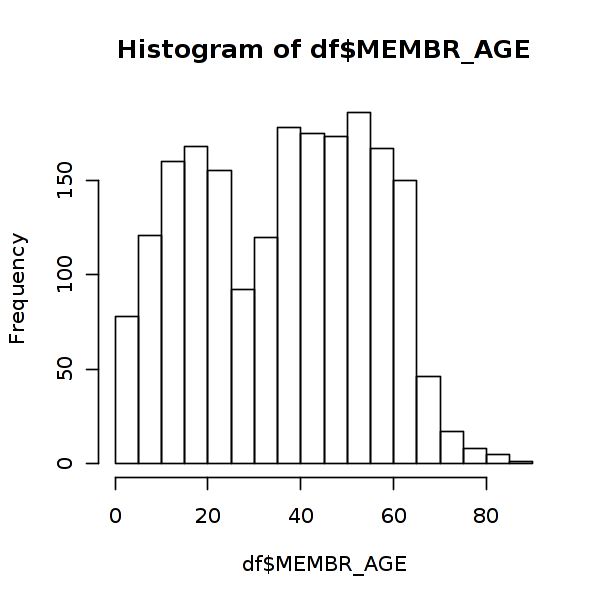

In [80]:
hist(df$MEMBR_AGE)

In [89]:
quantile(df$log_medcost_2016,c(0.1))
quantile(df$log_medcost_2016,c(0.9))

10% 
  0

90% 
8.97009

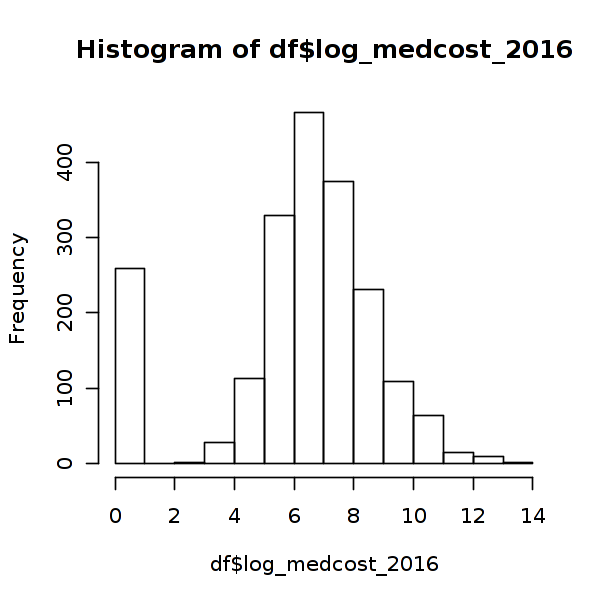

In [82]:
hist(df$log_medcost_2016)

In [ ]:
terms <- fsTermFrequencies(ens)
term <- data.table(terms[(terms$output==endpoint) & (terms$freq > threshold),])
interactions <- as.character(term$input[term$input %like% ':'])

endpoint='high_medcost2017'
nnets=16
threshold=0.1
nsamples=20

varpatt_cat = "GENDER|DIAG|PROC|PLACE|GPI|high_medcost2016"
varpatt_cont = "AGE|log"

edges <- fsEdgeFrequencies(ens)
df <- df[,c(as.character(unique(edges$input)),endpoint)]
print('### data shape ###')
print(dim(df))

for (interaction in interactions){
    #arbitrarily assign x1 in interaction x1:x2 to be treatment, x2 driver
    treatment = sub("\\:.*", "", interaction)
    driver = sub(".*\\:", "", interaction)
    
    #swap
    #driver = sub("\\:.*", "", interaction)
    #treatment = sub(".*\\:", "", interaction)
    
    if ((treatment %like% varpatt_cat) & (driver %like% varpatt_cat)) {
        results <- fsEfficacyInference(data=df, 
                                       ensemble=ens, 
                                       treatment=treatment, 
                                       treatmentValues=c(0,1),
                                       driver=driver,
                                       outcome=endpoint,
                                       override_driverIsDiscrete=T,
                                       numPartitionIntervals=2,
                                       nNets=nnets,
                                       nSamples=nsamples, 
                                       seed=123
                                      )
        OR_doff <- quantile(results$getTreatmentEffect()$efficacy[results$getTreatmentEffect()$driver_level==0], c(0.025, 0.5, 0.975))
        OR_don <- quantile(results$getTreatmentEffect()$efficacy[results$getTreatmentEffect()$driver_level==1], c(0.025, 0.5, 0.975))
        
    } else if ((treatment %like% varpatt_cont) & (driver %like% varpatt_cat)) {
        results <- fsEfficacyInference(data=df, 
                                       ensemble=ens, 
                                       treatment=treatment, 
                                       treatmentValues=quantile(df[[treatment]],c(0.025,0.975)),
                                       driver=driver,
                                       outcome=endpoint,
                                       override_driverIsDiscrete=T,
                                       numPartitionIntervals=2,
                                       nNets=nnets,
                                       nSamples=nsamples, 
                                       seed=123
                                      )
        OR_doff <- quantile(results$getTreatmentEffect()$efficacy[results$getTreatmentEffect()$driver_level==0], c(0.025, 0.5, 0.975))
        OR_don <- quantile(results$getTreatmentEffect()$efficacy[results$getTreatmentEffect()$driver_level==1], c(0.025, 0.5, 0.975))
      
    } else if ((treatment %like% varpatt_cat) & (driver %like% varpatt_cont)) {
        df_doff <- copy(df)
        df_doff[[driver]] <- quantile(df[[driver]],c(0.025))
        df_don <- copy(df)
        df_don[[driver]] <- quantile(df[[driver]],c(0.975))
        
        results <- fsCausalEffectInference(data=df_doff,
                                        ensemble=ens,
                                        treatment=treatment,
                                        treatmentValues = c(0,1),
                                        outcome=endpoint,
                                        nNets=nnets,
                                        nSamples=nsamples,
                                        seed=123
                                        )
        OR_doff <- quantile(results$getCausalEffect()$causalEffect, c(0.025, 0.5, 0.975))
        rm(results)
        
        results <- fsCausalEffectInference(data=df_don,
                                        ensemble=ens,
                                        treatment=treatment,
                                        treatmentValues = c(0,1),
                                        outcome=endpoint,
                                        nNets=nnets,
                                        nSamples=nsamples,
                                        seed=123
                                        )
        OR_don <- quantile(results$getCausalEffect()$causalEffect, c(0.025, 0.5, 0.975))
        rm(results)
        
        
    } else if ((treatment %like% varpatt_cont) & (driver %like% varpatt_cont)) {
        df_doff <- copy(df)
        df_doff[[driver]] <- quantile(df[[driver]],c(0.025))
        df_don <- copy(df)
        df_don[[driver]] <- quantile(df[[driver]],c(0.975))
        
        results <- fsCausalEffectInference(data=df_doff,
                                        ensemble=ens,
                                        treatment=treatment,
                                        treatmentValues=quantile(df[[treatment]],c(0.025,0.975)),
                                        outcome=endpoint,
                                        nNets=nnets,
                                        nSamples=nsamples,
                                        seed=123
                                        )
        OR_doff <- quantile(results$getCausalEffect()$causalEffect, c(0.025, 0.5, 0.975))
        rm(results)
        
        results <- fsCausalEffectInference(data=df_don,
                                        ensemble=ens,
                                        treatment=treatment,
                                        treatmentValues = c(0,1),
                                        outcome=endpoint,
                                        nNets=nnets,
                                        nSamples=nsamples,
                                        seed=123
                                        )
        OR_don <- quantile(results$getCausalEffect()$causalEffect, c(0.025, 0.5, 0.975))
        rm(results)
        
    } else {
        print("Inputs do not fit pattern.")
    }
    
    print(str(c(treatment,driver,unname(OR_doff),unname(OR_don))))
    fwrite(data.table(t(c(treatment,driver,unname(OR_doff),unname(OR_don)))),file = outputfile,append=T)
    print(paste0('result of ',treatment,':',driver,' written to ',outputfile))
    
    rm(results,df_doff,df_don,OR_doff,OR_don)
    }

In [ ]:
ggEfficacy <- function(datafile,protofile,treatValues=c(0,1),threshold=0.1){
    df <- fread(datafile,data.table = F)
    
    ens <- fsReadModel(protofile)
    terms <- fsTermFrequencies(ens)
    #endpoints <- unique(terms$output)
    endpoints <- unique(terms$output)[3]#for test
    
    list_endpoints <- list()
    for (endpoint in endpoints){
        term <- data.table(terms[(terms$output==endpoint) & (terms$freq > threshold),])
        interactions <- term$input[term$input %like% 'M:']
        #interactions <- term$input[term$input %like% 'M:'][1:2]#for test
        
        list_interactions <- list()
        for (interaction in interactions){
            #arbitrarily assign x1 in interaction x1:x2 to be treatment, x2 driver
            treatment = sub("\\:.*", "", interaction)
            driver = sub(".*\\:", "", interaction)
            
            #driver = sub("\\:.*", "", interaction)
            #treatment = sub(".*\\:", "", interaction)
            results <- fsEfficacyInference(training_data = df, 
                                          ens = ens, 
                                          treatmentVariable = treatment, 
                                          treatmentValues = treatValues,
                                          subgroup_driver = driver, 
                                          subgroup_outcome = endpoint,
                                          override_driverIsDiscrete=T,
                                          sampleSize=100,                
                                          numPartitionIntervals=2,
                                          cumulativeEfficacy=F
                                          )
            
            g <- ggplot(results, aes(x=efficacy, fill=subgroup_driver_level)) + 
                    geom_histogram(aes(y=..density..), color="white", alpha=.5, position="identity") + 
                    geom_density(adjust = .4, color="black", alpha=.4) +
                    theme(legend.position="top") + 
                    ylab("Density") + xlab(paste0("Efficacy of ",treatment)) + 
                    ggtitle(paste0('outcome: ',endpoint)) + 
                    scale_fill_manual(name=driver,
                                      breaks = treatValues,
                                      values = c('0.0'="#00BFC4",'1.0'="#F8766D"),
                                      labels = c('Off', 'On'))
            ggsave(filename = paste0("./scratch4_vlad2/EfficacyDensity_",endpoint,"_",treatment,"_",driver,".pdf"),
                   plot = g,
                   device = pdf,width = 8, height = 6, units = "in", 
                   limitsize = T)
            print(paste0("./scratch4_vlad2/EfficacyDensity_",endpoint,"_",treatment,"_",driver,".pdf saved."))
            list_interactions[[interaction]] <- g
        }
        list_endpoints[[endpoint]] <- list_interactions
    }
    return(list_endpoints)
}

In [ ]:
ggEfficacy_swap <- function(datafile,protofile,treatValues=c('0.0','1.0'),threshold=0.1){
    df <- fread(datafile,colClasses="character",data.table = F)
    
    ens <- fsReadModel(protofile)
    terms <- fsTermFrequencies(ens)
    #endpoints <- unique(terms$output)
    endpoints <- unique(terms$output)[3]#for test
    
    list_endpoints <- list()
    for (endpoint in endpoints){
        term <- data.table(terms[(terms$output==endpoint) & (terms$freq > threshold),])
        interactions <- term$input[term$input %like% 'M:']
        #interactions <- term$input[term$input %like% 'M:'][1:2]#for test
        
        list_interactions <- list()
        for (interaction in interactions){
            #swapped: x2 in interaction x1:x2 to be treatment, x1 driver
            #treatment = sub("\\:.*", "", interaction)
            #driver = sub(".*\\:", "", interaction)
            
            driver = sub("\\:.*", "", interaction)
            treatment = sub(".*\\:", "", interaction)
            results <- fsEfficacyInference_charDriver(training_data = df, 
                                          ens = ens, 
                                          treatmentVariable = treatment, 
                                          treatmentValues = treatValues,
                                          subgroup_driver = driver, 
                                          subgroup_outcome = endpoint,
                                          override_driverIsDiscrete=T,
                                          sampleSize=100,                
                                          numPartitionIntervals=2,
                                          cumulativeEfficacy=F
                                          )
            
            g <- ggplot(results, aes(x=efficacy, fill=subgroup_driver_level)) + 
                    geom_histogram(aes(y=..density..), color="white", alpha=.5, position="identity") + 
                    geom_density(adjust = .4, color="black", alpha=.4) +
                    theme(legend.position="top") + 
                    ylab("Density") + xlab(paste0("Efficacy of ",treatment)) + 
                    ggtitle(paste0('outcome: ',endpoint)) + 
                    scale_fill_manual(name=driver,
                                      breaks = treatValues,
                                      values = c("#00BFC4","#F8766D"),
                                      labels = c('Off', 'On'))
            
            ggsave(filename = paste0("./scratch4_vlad2/EfficacyDensitySwap_",endpoint,"_",treatment,"_",driver,".pdf"),
                   plot = g,
                   device = pdf,width = 8, height = 6, units = "in", 
                   limitsize = T)
            print(paste0("./scratch4_vlad2/EfficacyDensitySwap_",endpoint,"_",treatment,"_",driver,".pdf saved."))
            
            list_interactions[[interaction]] <- g
        }
        list_endpoints[[endpoint]] <- list_interactions
    }
    return(list_endpoints)
}

In [ ]:
efficacy_list <- ggEfficacy("/gnshealthcare/scratch4/vlad/humana_ipredict_df0_sample1k.csv",
                             "/gnshealthcare/shared/nli/scratch4_vlad2/ensemble.protobf",
                             treatValues=c('0.0','1.0'),threshold=0.5)

In [ ]:
efficacy_swap_list <- ggEfficacy_swap("/gnshealthcare/scratch4/vlad/humana_ipredict_df0_sample1k.csv",
                             "/gnshealthcare/shared/nli/scratch4_vlad2/ensemble.protobf",
                             treatValues=c('0.0','1.0'),threshold=0.5)

# descriptives

## data.table recap

In [56]:
dt = data.table(grp = sample(letters[1:3],5, replace = TRUE),
                v1 = sample(1:10, 5, replace=TRUE), 
                v2 = sample(1:10, 5, replace=TRUE), 
                v3 = sample(1:10, 5, replace=TRUE)
               )
sd.cols = c("v2", "v3")
dt.out = dt[, list(v1 = sum(v1),  lapply(.SD,mean)), by = grp, .SDcols = sd.cols]

In [57]:
head(dt)

grp v1 v2 v3
1 a   5   1 3 
2 c   4  10 3 
3 b   4  10 9 
4 a   3   8 5 
5 c   6   8 5

In [58]:
head(dt.out)#WTF?

grp v1 V2 
1 a    8 4.5
2 a    8 4  
3 c   10 9  
4 c   10 4  
5 b    4 10 
6 b    4 9

In [60]:
sd.cols = c("v2", "v3")
dt[, c(list(v1=sum(v1)), lapply(.SD, mean)), by=grp, .SDcols = sd.cols]#now better

grp v1 v2   v3
1 a    8  4.5 4 
2 c   10  9.0 4 
3 b    4 10.0 9

## read data

In [11]:
dt <- fread('V3_DF2_sample100k.csv',
            colClasses=c(INDIV_ENTERPRISE_ID="character"),
            header=T, sep=',',na.strings="",
            #drop=c('personId'),
            #select=c('INDIV_ENTERPRISE_ID'),
            nrow=1000,
            )
dim(dt)

[1] 1000 1171

In [12]:
dt[is.na(dt)] <- 0

In [13]:
head(dt)

INDIV_ENTERPRISE_ID HOME_ADDR_STE_CD MEMBR_AGE GENDER_CD_M x_lob x_product
1 35575360            TX               56        1           COM   OAP      
2 4014296             FL               21        1           COM   HMO      
3 2512667             FL               42        0           COM   OAP      
4 64406839            FL               19        1           COM   OAPIN    
5 64972864            TX               16        0           COM   OAP      
6 77069731            FL               25        0           COM   OAPIN    
  DIAG_CCS_1 DIAG_CCS_10 DIAG_CCS_100 DIAG_CCS_101 ⋯ GPI4_9975 GPI4_9985
1 0          0           0            1            ⋯ 0         0        
2 0          0           0            0            ⋯ 0         0        
3 0          0           0            0            ⋯ 0         0        
4 0          0           0            0            ⋯ 0         0        
5 0          1           0            0            ⋯ 0         0        
6 0          1           0            0            ⋯ 0         0        
  GPI4_9987 GPI4_9990 med_cost_2016 rx_cost_2016 med_cost_2017 rx_cost_2017
1 0         0         25776         8040         334851        5534        
2 0         0             0            0            384           0        
3 0         0         13169         3913           1638         657        
4 0         0             0            0              0           0        
5 0         0           407            0            127           0        
6 0         0         98525            0           5820           0        
  high_medcost2016 high_medcost2017
1 1                1               
2 0                0               
3 1                0               
4 0                0               
5 0                0               
6 1                0

## group by diag CCS to see mean cost for each dx

In [14]:
dt.m1 = melt(dt, measure = patterns("^DIAG"), value.name = c("dx"))

In [15]:
str(dt.m1)

Classes ‘data.table’ and 'data.frame':	282000 obs. of  891 variables:
 $ INDIV_ENTERPRISE_ID: chr  "35575360" "4014296" "2512667" "64406839" ...
 $ HOME_ADDR_STE_CD   : chr  "TX" "FL" "FL" "FL" ...
 $ MEMBR_AGE          : int  56 21 42 19 16 25 43 36 41 55 ...
 $ GENDER_CD_M        : int  1 1 0 1 0 0 1 0 0 0 ...
 $ x_lob              : chr  "COM" "COM" "COM" "COM" ...
 $ x_product          : chr  "OAP" "HMO" "OAP" "OAPIN" ...
 $ SVC_PROC_CCS_1     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SVC_PROC_CCS_10    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SVC_PROC_CCS_100   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SVC_PROC_CCS_101   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SVC_PROC_CCS_102   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SVC_PROC_CCS_103   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SVC_PROC_CCS_104   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SVC_PROC_CCS_106   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SVC_PROC_CCS_107   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SVC_PROC_CCS_108   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SVC_PROC_CCS_109   : num  0 0 0 0 0 0

In [16]:
head(dt)

INDIV_ENTERPRISE_ID HOME_ADDR_STE_CD MEMBR_AGE GENDER_CD_M x_lob x_product
1 35575360            TX               56        1           COM   OAP      
2 4014296             FL               21        1           COM   HMO      
3 2512667             FL               42        0           COM   OAP      
4 64406839            FL               19        1           COM   OAPIN    
5 64972864            TX               16        0           COM   OAP      
6 77069731            FL               25        0           COM   OAPIN    
  DIAG_CCS_1 DIAG_CCS_10 DIAG_CCS_100 DIAG_CCS_101 ⋯ GPI4_9975 GPI4_9985
1 0          0           0            1            ⋯ 0         0        
2 0          0           0            0            ⋯ 0         0        
3 0          0           0            0            ⋯ 0         0        
4 0          0           0            0            ⋯ 0         0        
5 0          1           0            0            ⋯ 0         0        
6 0          1           0            0            ⋯ 0         0        
  GPI4_9987 GPI4_9990 med_cost_2016 rx_cost_2016 med_cost_2017 rx_cost_2017
1 0         0         25776         8040         334851        5534        
2 0         0             0            0            384           0        
3 0         0         13169         3913           1638         657        
4 0         0             0            0              0           0        
5 0         0           407            0            127           0        
6 0         0         98525            0           5820           0        
  high_medcost2016 high_medcost2017
1 1                1               
2 0                0               
3 1                0               
4 0                0               
5 0                0               
6 1                0

In [17]:
head(dt.m1)

INDIV_ENTERPRISE_ID HOME_ADDR_STE_CD MEMBR_AGE GENDER_CD_M x_lob x_product
1 35575360            TX               56        1           COM   OAP      
2 4014296             FL               21        1           COM   HMO      
3 2512667             FL               42        0           COM   OAP      
4 64406839            FL               19        1           COM   OAPIN    
5 64972864            TX               16        0           COM   OAP      
6 77069731            FL               25        0           COM   OAPIN    
  SVC_PROC_CCS_1 SVC_PROC_CCS_10 SVC_PROC_CCS_100 SVC_PROC_CCS_101 ⋯ GPI4_9987
1 0              0               0                0                ⋯ 0        
2 0              0               0                0                ⋯ 0        
3 0              0               0                0                ⋯ 0        
4 0              0               0                0                ⋯ 0        
5 0              0               0                0                ⋯ 0        
6 0              0               0                0                ⋯ 0        
  GPI4_9990 med_cost_2016 rx_cost_2016 med_cost_2017 rx_cost_2017
1 0         25776         8040         334851        5534        
2 0             0            0            384           0        
3 0         13169         3913           1638         657        
4 0             0            0              0           0        
5 0           407            0            127           0        
6 0         98525            0           5820           0        
  high_medcost2016 high_medcost2017 variable   dx
1 1                1                DIAG_CCS_1 0 
2 0                0                DIAG_CCS_1 0 
3 1                0                DIAG_CCS_1 0 
4 0                0                DIAG_CCS_1 0 
5 0                0                DIAG_CCS_1 0 
6 1                0                DIAG_CCS_1 0

In [18]:
dim(dt.m1)

[1] 282000    891

In [19]:
dt.m2 = dt.m1[dt.m1$dx == 1]

In [20]:
dim(dt.m2)

[1] 4824  891

In [21]:
head(dt.m1[INDIV_ENTERPRISE_ID == '35575360'])

INDIV_ENTERPRISE_ID HOME_ADDR_STE_CD MEMBR_AGE GENDER_CD_M x_lob x_product
1 35575360            TX               56        1           COM   OAP      
2 35575360            TX               56        1           COM   OAP      
3 35575360            TX               56        1           COM   OAP      
4 35575360            TX               56        1           COM   OAP      
5 35575360            TX               56        1           COM   OAP      
6 35575360            TX               56        1           COM   OAP      
  SVC_PROC_CCS_1 SVC_PROC_CCS_10 SVC_PROC_CCS_100 SVC_PROC_CCS_101 ⋯ GPI4_9987
1 0              0               0                0                ⋯ 0        
2 0              0               0                0                ⋯ 0        
3 0              0               0                0                ⋯ 0        
4 0              0               0                0                ⋯ 0        
5 0              0               0                0                ⋯ 0        
6 0              0               0                0                ⋯ 0        
  GPI4_9990 med_cost_2016 rx_cost_2016 med_cost_2017 rx_cost_2017
1 0         25776         8040         334851        5534        
2 0         25776         8040         334851        5534        
3 0         25776         8040         334851        5534        
4 0         25776         8040         334851        5534        
5 0         25776         8040         334851        5534        
6 0         25776         8040         334851        5534        
  high_medcost2016 high_medcost2017 variable     dx
1 1                1                DIAG_CCS_1   0 
2 1                1                DIAG_CCS_10  0 
3 1                1                DIAG_CCS_100 0 
4 1                1                DIAG_CCS_101 1 
5 1                1                DIAG_CCS_102 1 
6 1                1                DIAG_CCS_103 0

In [22]:
describe(dt[DIAG_CCS_10 == 1,c("med_cost_2016")])

vars n   mean     sd       median trimmed  mad      min max    range 
X1 1    203 7304.345 20178.98 1473   2639.755 1713.886 0   143652 143652
   skew     kurtosis se      
X1 4.871753 25.25463 1416.287

In [23]:
describe(dt[DIAG_CCS_10 == 1,c("med_cost_2017")])

vars n   mean    sd       median trimmed  mad      min max    range 
X1 1    203 6743.32 18259.81 1099   1976.644 1383.266 0   116746 116746
   skew     kurtosis se      
X1 4.021118 16.44424 1281.587

In [24]:
costbydx = dt.m2[, lapply(.SD, mean), by = variable, .SDcols = c("med_cost_2016","med_cost_2017")]

In [25]:
str(costbydx)

Classes ‘data.table’ and 'data.frame':	221 obs. of  3 variables:
 $ variable     : Factor w/ 282 levels "DIAG_CCS_1","DIAG_CCS_10",..: 2 4 5 6 7 8 9 11 12 14 ...
 $ med_cost_2016: num  7304 31787 21166 44201 19290 ...
 $ med_cost_2017: num  6743 29349 24591 22692 4869 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [26]:
costbydx2 = dt.m2[, c(list(size = sum(dx)), lapply(.SD, mean)), by = variable, .SDcols = c("med_cost_2016","med_cost_2017")]

In [79]:
costbydx2 = fread("avg_medcost_by_dx.csv")

In [73]:
costbydx2$ratio = costbydx2$med_cost_2017/costbydx2$med_cost_2016

In [74]:
costbydx2$size = costbydx2$size/1e5

In [80]:
summary(costbydx2$size)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1      92     392    1637    1580   33780 

In [75]:
head(costbydx2[ratio > 1 & med_cost_2016 > 1e4,])

variable     size    med_cost_2016 med_cost_2017 ratio   
1 DIAG_CCS_135 0.00674 11785.42      11976.42      1.016207
2 DIAG_CCS_158 0.00781 26701.71      30640.59      1.147514
3 DIAG_CCS_174 0.00174 11423.83      13445.11      1.176936
4 DIAG_CCS_177 0.00103 10153.86      12442.41      1.225386
5 DIAG_CCS_179 0.00002 17508.00      19022.50      1.086503
6 DIAG_CCS_212 0.03814 10972.57      11257.51      1.025968

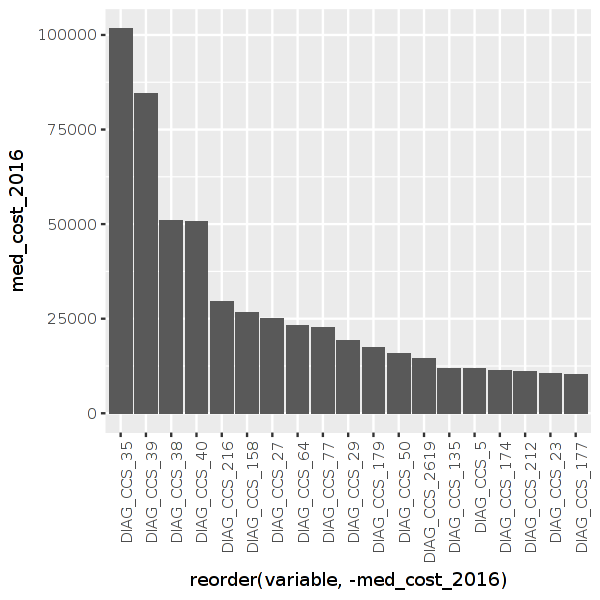

In [76]:
ggplot(costbydx2[ratio > 1 & med_cost_2016 > 1e4,],aes(x= reorder(variable,-med_cost_2016),med_cost_2016))+
geom_bar(stat ="identity")+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

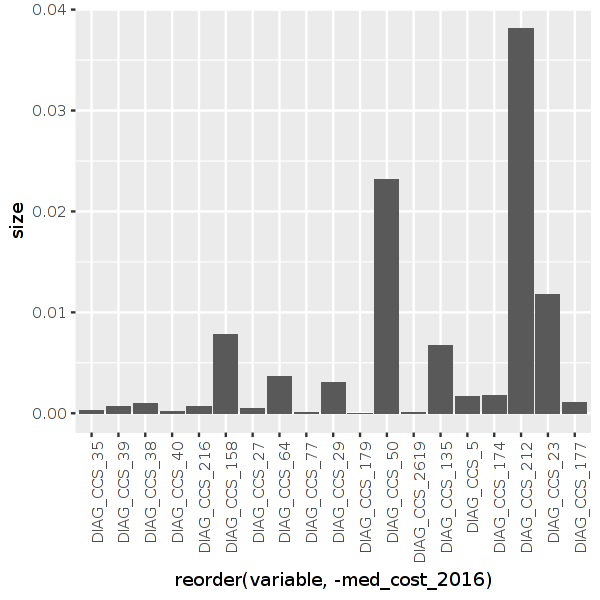

In [77]:
ggplot(costbydx2[ratio > 1 & med_cost_2016 > 1e4,],aes(x= reorder(variable,-med_cost_2016),size))+
geom_bar(stat ="identity")+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [104]:
df <- fread("A_V3sample100k_2016input2017output_full.csv")

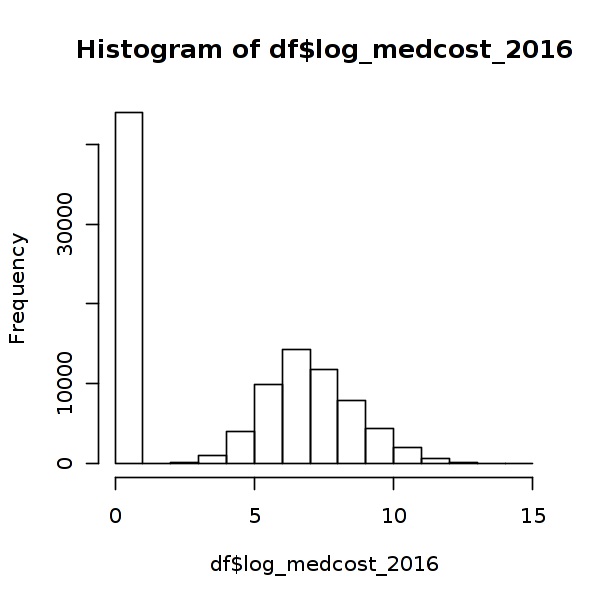

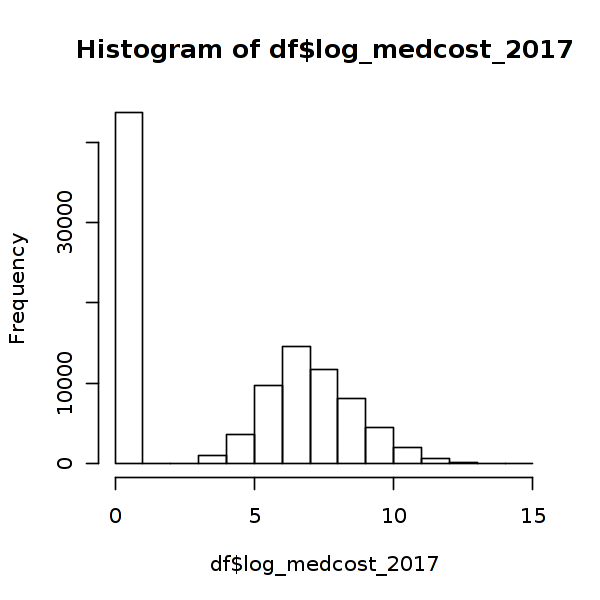

In [105]:
hist(df$log_medcost_2016)
hist(df$log_medcost_2017)

# Venn diagram

will run FS on > 2 million, so only keep necessary columns in df

In [90]:
setwd("/gnshealthcare/shared/nli/models/M3")

In [14]:
dt <- fread('V3_DF2.csv',
            #colClasses=c(INDIV_ENTERPRISE_ID="character"),
            header=T, sep=',',na.strings="",
            #drop=c('personId'),
            #select=c('INDIV_ENTERPRISE_ID')
            data.table=F
            )
dim(dt)

na2zero = function(DT) {
  # either of the following for loops

  # by name :
  #for (j in names(DT))
  #  set(DT,which(is.na(DT[[j]])),j,0)

  # or by number (slightly faster than by name) :
  for (j in seq_len(ncol(DT)))
    set(DT,which(is.na(DT[[j]])),j,0)
}

system.time(na2zero(dt))

dt$log_medcost_2016 <- round(log(dt$med_cost_2016+1),4)

dt$log_medcost_2017 <- round(log(dt$med_cost_2017+1),4)

dt$log_rxcost_2016 <- round(log(dt$rx_cost_2016+1),4)

dt$log_rxcost_2017 <- round(log(dt$rx_cost_2017+1),4)

dim(dt)

[1] 2538857    1171

Warning message in set(DT, which(is.na(DT[[j]])), j, 0):
“Coerced 'double' RHS to 'character' to match the column's type; may have truncated precision. Either change the target column ['HOME_ADDR_STE_CD'] to 'double' first (by creating a new 'double' vector length 2538857 (nrows of entire table) and assign that; i.e. 'replace' column), or coerce RHS to 'character' (e.g. 1L, NA_[real|integer]_, as.*, etc) to make your intent clear and for speed. Or, set the column type correctly up front when you create the table and stick to it, please.”Warning message in set(DT, which(is.na(DT[[j]])), j, 0):
“Coerced 'double' RHS to 'character' to match the column's type; may have truncated precision. Either change the target column ['x_lob'] to 'double' first (by creating a new 'double' vector length 2538857 (nrows of entire table) and assign that; i.e. 'replace' column), or coerce RHS to 'character' (e.g. 1L, NA_[real|integer]_, as.*, etc) to make your intent clear and for speed. Or, set the column 

   user  system elapsed 
 42.348   2.128  44.438 

[1] 2538857    1175

In [15]:
head(dt)

INDIV_ENTERPRISE_ID HOME_ADDR_STE_CD MEMBR_AGE GENDER_CD_M x_lob x_product
1 32811592            MN               29        1           COM   OAP      
2 37565124            CO               29        0           COM   OAP      
3 97536238            MN               25        0           COM   OAP      
4 49810006            MN               39        1           COM   OAP      
5 84487065            MN               33        1           COM   OAP      
6 19883720            CO               46        0           COM   OAP      
  DIAG_CCS_1 DIAG_CCS_10 DIAG_CCS_100 DIAG_CCS_101 ⋯ med_cost_2016 rx_cost_2016
1 0          0           0            0            ⋯ 20583           42        
2 0          0           0            0            ⋯   202          433        
3 0          0           0            0            ⋯     0            0        
4 0          1           0            0            ⋯    26            0        
5 0          0           0            0            ⋯   540            0        
6 0          1           0            0            ⋯  2633         2015        
  med_cost_2017 rx_cost_2017 high_medcost2016 high_medcost2017 log_medcost_2016
1  416           34          1                0                9.9323          
2  159          319          0                0                5.3132          
3  241          737          0                0                0.0000          
4 2051            0          0                0                3.2958          
5  560           81          0                0                6.2934          
6  611           20          0                0                7.8763          
  log_medcost_2017 log_rxcost_2016 log_rxcost_2017
1 6.0331           3.7612          3.5553         
2 5.0752           6.0730          5.7683         
3 5.4889           0.0000          6.6039         
4 7.6266           0.0000          0.0000         
5 6.3297           0.0000          4.4067         
6 6.4167           7.6089          3.0445

In [17]:
#datafile = "A_V3sample100k_2016input2017output_full.csv"
protofile = "./qjob.100ksample_A_ctd2/ensemble.txt.proto"



#####################
#df <- fread(datafile,data.table = F)
ens <- fsReadModel(protofile)
edges <- fsEdgeFrequencies(ens)

df <- copy(dt)
df <- df[,c("INDIV_ENTERPRISE_ID",as.character(unique(edges$input)),as.character(unique(edges$output)))]

print('### data shape ###')
print(dim(df))


print('### columns ###')
print(names(df))

[1] "### data shape ###"
[1] 2538857     149
[1] "### columns ###"
  [1] "INDIV_ENTERPRISE_ID" "DIAG_CCS_196"        "DIAG_CCS_205"       
  [4] "DIAG_CCS_259"        "DIAG_CCS_42"         "DIAG_CCS_50"        
  [7] "log_medcost_2016"    "MEMBR_AGE"           "PLACE_OF_SVC_CD_21" 
 [10] "SVC_PROC_CCS_76"     "DIAG_CCS_10"         "DIAG_CCS_126"       
 [13] "DIAG_CCS_128"        "DIAG_CCS_144"        "DIAG_CCS_200"       
 [16] "DIAG_CCS_211"        "DIAG_CCS_256"        "DIAG_CCS_257"       
 [19] "DIAG_CCS_258"        "DIAG_CCS_53"         "DIAG_CCS_651"       
 [22] "DIAG_CCS_91"         "DIAG_CCS_92"         "DIAG_CCS_98"        
 [25] "GENDER_CD_M"         "high_medcost2016"    "PLACE_OF_SVC_CD_11" 
 [28] "PLACE_OF_SVC_CD_22"  "PLACE_OF_SVC_CD_23"  "PLACE_OF_SVC_CD_99" 
 [31] "SVC_PROC_CCS_240"    "SVC_PROC_CCS_218"    "DIAG_CCS_51"        
 [34] "DIAG_CCS_7"          "DIAG_CCS_171"        "DIAG_CCS_217"       
 [37] "DIAG_CCS_82"         "DIAG_CCS_652"        "DIAG_CCS_212"     

In [18]:
fwrite(df, file="V3_DF2_NAto0_M32Acols.csv", quote = F, na = 'NA')

In [20]:
str(df)

'data.frame':	2538857 obs. of  149 variables:
 $ INDIV_ENTERPRISE_ID: int  32811592 37565124 97536238 49810006 84487065 19883720 3012559 69905691 83953245 24719121 ...
 $ DIAG_CCS_196       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DIAG_CCS_205       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DIAG_CCS_259       : int  1 0 0 0 0 0 0 1 0 0 ...
 $ DIAG_CCS_42        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DIAG_CCS_50        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ log_medcost_2016   : num  9.93 5.31 0 3.3 6.29 ...
 $ MEMBR_AGE          : int  29 29 25 39 33 46 49 38 7 29 ...
 $ PLACE_OF_SVC_CD_21 : int  1 0 0 0 0 0 0 0 0 0 ...
 $ SVC_PROC_CCS_76    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DIAG_CCS_10        : int  0 0 0 1 0 1 1 1 0 1 ...
 $ DIAG_CCS_126       : int  0 0 0 0 1 0 0 1 0 0 ...
 $ DIAG_CCS_128       : int  0 0 0 0 0 0 0 0 0 1 ...
 $ DIAG_CCS_144       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DIAG_CCS_200       : int  0 0 0 0 0 1 0 0 0 0 ...
 $ DIAG_CCS_211       : int  0 0 0 0 0 1 0 0 0 0 ...
 $ DIAG_CCS_256       : int

## previse data

In [19]:
previse <- fread("/gnshealthcare/shared/nli/data/cigna36/fsa0001o.57293.gns_previse_score_20181002183442.csv")

In [21]:
str(previse)

Classes ‘data.table’ and 'data.frame':	3515873 obs. of  2 variables:
 $ INDIV_ENTERPRISE_ID: int  6338511 6338161 6338019 6348742 6348692 6348202 6348652 6348535 6348261 6348849 ...
 $ RISK_SCORE_NUM     : num  0.0277 0.0321 0.0231 0.0608 0.0115 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [22]:
str(intersect(df$INDIV_ENTERPRISE_ID,previse$INDIV_ENTERPRISE_ID))

 int [1:1937231] 32811592 37565124 97536238 49810006 84487065 19883720 3012559 69905691 83953245 24719121 ...


# Edges to columns

In [53]:
getwd()

[1] "/gnshealthcare/shared/nli/models/M4/qjob.m4-1"

In [54]:
ens <- fsReadModel('ensemble.txt.proto')
edge<- fsEdgeFrequencies(ens)

str(edge)

'data.frame':	188 obs. of  3 variables:
 $ input : Factor w/ 152 levels "DIAG_CCS_10_R12M",..: 55 62 63 87 130 136 149 39 43 51 ...
 $ output: Factor w/ 2 levels "high_medcost_F12M",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ freq  : num  1 1 1 1 1 1 1 1 1 1 ...


In [55]:
fwrite(edge,"m4-1_edges.txt", sep='|',quote=F,na="",row.names = F)

In [56]:
edge <- fread("m4-1_edges.txt")

In [57]:
str(edge)

Classes ‘data.table’ and 'data.frame':	188 obs. of  3 variables:
 $ input : chr  "high_medcost_R12M" "log_medcost_R12M" "log_medcost_R6M" "MEMBR_AGE" ...
 $ output: chr  "high_medcost_F12M" "high_medcost_F12M" "high_medcost_F12M" "high_medcost_F12M" ...
 $ freq  : num  1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [58]:
length(unique(edge$input))

[1] 152

In [62]:
unique(edge$output)

[1] "high_medcost_F12M" "log_medcost_F12M"

In [59]:
input <- c(unique(edge$input))

In [60]:
str(input)

 chr [1:152] "high_medcost_R12M" "log_medcost_R12M" "log_medcost_R6M" ...


In [61]:
print(input)

  [1] "high_medcost_R12M"                  "log_medcost_R12M"                  
  [3] "log_medcost_R6M"                    "MEMBR_AGE"                         
  [5] "OPCount_R12M"                       "RxElig_R12M"                       
  [7] "SVC_PROC_CCS_232_R12M"              "GENDER_CD_M"                       
  [9] "GPI4_2810_R12M"                     "GPI4_5816_R12M"                    
 [11] "log_rxcost_R12M"                    "PLACE_OF_SVC_CD_11_R12M"           
 [13] "PLACE_OF_SVC_CD_21_R12M"            "PLACE_OF_SVC_CD_23_R12M"           
 [15] "GPI4_7260_R12M"                     "PLACE_OF_SVC_CD_99_R12M"           
 [17] "OP_PS_OG_R12M"                      "DIAG_CCS_126_R12M"                 
 [19] "DIAG_Charlson_cpd_R12M"             "SVC_PROC_CCS_227_R12M"             
 [21] "SVC_PROC_CCS_224_R12M"              "DIAG_CCS_651_R12M"                 
 [23] "SVC_PROC_CCS_212_R12M"              "DIAG_CCS_171_R12M"                 
 [25] "DIAG_CCS_203_R12M"               

common <- input[grep("Age|Gender|DepIdx|cci_no_age|UniqueDrugCount_R12M|UniqueProviderCount_R12M|log10MedicalCost_R12M|log10RxCost_R12M|ERCount.*|AllIPCount.*|AcuteIPCount_.*|IPLOS_.*",input)]

length(common)

input_ccs2 <- input[grep("DxIndCCS2",input)]
length(input_ccs2)

input_noccs2 <- input[grep("DxIndCCS1_|AcuteIPCountCCS1_|DxIndHCC1_|POSIndPOS1_|ProcIndBETOS2_|ProcIndCCS1_|ProcIndCPT1_|ProcIndHCPCS1_|RxIndGPI2_|RxIndGPI4_",input)]
length(input_noccs2)


cols_common <- gsub('Age','Age=IdxAge',common)
cols_common <- gsub('DepIdx','DepIdx=deprivation_index',cols_common)
cols_common <- gsub('cci_no_age','cci_no_age=timeAgg(int(bool(CDMDiagnosisCount:CHARLSON_QUAN:mi))+int(bool(CDMDiagnosisCount:CHARLSON_QUAN:chf))+int(bool(CDMDiagnosisCount:CHARLSON_QUAN:pvd))+int(bool(CDMDiagnosisCount:CHARLSON_QUAN:cerebrovas))+int(bool(CDMDiagnosisCount:CHARLSON_QUAN:dementia))+int(bool(CDMDiagnosisCount:CHARLSON_QUAN:cpd))+int(bool(CDMDiagnosisCount:CHARLSON_QUAN:rheumatic))+int(bool(CDMDiagnosisCount:CHARLSON_QUAN:pud))+int(bool(CDMDiagnosisCount:CHARLSON_QUAN:diabetes))+2*int(bool(CDMDiagnosisCount:CHARLSON_QUAN:diabeteschronic))+2*int(bool(CDMDiagnosisCount:CHARLSON_QUAN:renal))+2*int(bool(CDMDiagnosisCount:CHARLSON_QUAN:plegia))+2*int(bool(CDMDiagnosisCount:CHARLSON_QUAN:malignancy))+6*int(bool(CDMDiagnosisCount:CHARLSON_QUAN:metastatictumor))+int(bool(CDMDiagnosisCount:CHARLSON_QUAN:mildliver))+3*int(bool(CDMDiagnosisCount:CHARLSON_QUAN:liver))+6*int(bool(CDMDiagnosisCount:CHARLSON_QUAN:hiv)), 0 month, 12 month)',cols_common)
cols_common <- gsub('ERCount_R12M','group(ERCount=X_CDMERVisitCountInpOut, "", aggBackward(1 month, Monthly))',cols_common)
cols_common <- gsub('AllIPCount_R12M','group(AllIPCount=CDMInpatientVisitCount, "", aggBackward(1 month, Monthly))',cols_common)
cols_common <- gsub('UniqueDrugCount_R12M','group(UniqueDrugCount=CDMDistinctDrugCount, "", aggBackward(1 month, Monthly))',cols_common)
cols_common <- gsub('UniqueProviderCount_R12M','group(UniqueProviderCount=X_CDMDistinctProviderCount, "", aggBackward(1 month, Monthly))',cols_common)
cols_common <- gsub('log10MedicalCost_R12M','group(log10MedicalCost=log10(CDMMedicalCost+1), "", aggBackward(1 month, Monthly))',cols_common)
cols_common <- gsub('log10RxCost_R12M','group(log10RxCost=log10(CDMRxCost+1), "", aggBackward(1 month, Monthly))',cols_common)

cols <- gsub('DxIndCCS1_','group(DxIndCCS1=bool(CDMDiagnosisCount),CCS:',input_noccs2)
cols <- gsub('AcuteIPCountCCS1_','group(AcuteIPCountCCS1=X_CDMCambiaAcuteInpatientVisit,CCS:',cols)
cols <- gsub('DxIndHCC1_','group(DxIndHCC1=bool(CDMDiagnosisCount),CMSHCC:',cols)
cols <- gsub('POSIndPOS1_','group(POSIndPOS1=bool(CDMPOSVisitCount),POS:',cols)
cols <- gsub('ProcIndBETOS2_','group(ProcIndBETOS2=bool(CDMProcedureCount),BETOS:',cols)
cols <- gsub('ProcIndCCS1_','group(ProcIndCCS1=bool(CDMProcedureCount),CCS_PROCEDURES:',cols)
cols <- gsub('ProcIndCPT1_','group(ProcIndCPT1=bool(CDMProcedureCount),CPT:',cols)
cols <- gsub('ProcIndHCPCS1_','group(ProcIndHCPCS1=bool(CDMProcedureCount),HCPCS:',cols)
cols <- gsub('RxIndGPI2_','group(RxIndGPI2=bool(CDMRxCount),MEDISPAN:',cols)
cols <- gsub('RxIndGPI4_','group(RxIndGPI4=bool(CDMRxCount),MEDISPAN:',cols)

cols <- gsub('_R12M',', aggBackward(1 month, Monthly))',cols)


cols_ccs2 <- gsub('DxIndCCS2_','group(DxIndCCS2=bool(CDMDiagnosisCount),CCS:"',input_ccs2)
cols_ccs2 <- gsub('_R12M','", aggBackward(1 month, Monthly))',cols_ccs2)
cols_ccs2 <- gsub('_','.',cols_ccs2)

allcols <-c(cols_common,cols,cols_ccs2)

length(allcols)

#fwrite(data.frame(allcols),"iPredictM4edges_medicare.cols",col.names = F,quote=F,row.names = F,na = "")

**I'd rather pull everything out and then subset for modeling.**